# CS432 Introduction to Data Mining

## Deliverable 1: EDA: Exploratory Data Analysis

### Exploratory data analysis includes:  

> 1. Analyzing data
2. Coming up with new ideas
3. Testing hypotheses 
4. Verifying assumptions
5. Discovering hidden patterns in the data

##### The main goal of this deliverable is to get your hands dirty with the dataset and to get an idea of what is going on in the dataset. Pre-processing of the data is also included in this deliverable.


---



## Team Members:

> #### 1. [23100201] Esha Fatima (**Team leader**)
> #### 2. [23100239] Abdullah Naveed
> #### 3. [23100186] Ahmer Jamil
> #### 4. [23110043] Karan Kumar

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
###################################################################> Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

---
## The user profile attributes/features, along with the brief description

1. **user_id**: The integer representation of the unique identifier for this user. 
2. **tweet_id**: Tweet ids of tweets sharing the news. 3. text: the tweet shared by the user. 
4. **followers**: The number of followers this account currently has. 
5. **following**: The number of users this account follows (AKA their "followings").  
6. **location**: The user-defined location for this account's profile. 
7. **verified**: When true, it indicates the user has a verified account.  
8. **statuses_count**: The number of tweets (including retweets) issued by the user. 
9. **profile_background_tile**: Profile background image is tile or not? 
10. **profile_use_backgorund_image**: Is the user has a profile background image or not? 
11. **favourite_count**: The number of tweets this user has liked in the account's lifetime. 
12. **label**: either 1 (Real News) or 0 (Fake News). 

---

# **=======> Loading Dataframes**

---

In [3]:
###################################################################> Drive Paths
path_Esha_Fake = '/content/drive/MyDrive/Datamining - Project/Fake_News.csv'
path_Esha_Real = '/content/drive/MyDrive/Datamining - Project/Real_News.csv'

path_Abdullah_Fake = '/content/drive/My Drive/Mining Project/Deliverable_01/Fake_News.csv'
path_Abdullah_Real = '/content/drive/My Drive/Mining Project/Deliverable_01/Real_News.csv'

path_Ahmer_Fake = '/content/drive/My Drive/Mining/Fake_News.csv'
path_Ahmer_Real = '/content/drive/My Drive/Mining/Real_News.csv'

path_Karan_Fake = '/content/drive/My Drive//Fake_News.csv'
path_Karan_Real = '/content/drive/My Drive//Real_News.csv'

###################################################################> Loading CSVs (change path variable) and Also dropping rows with only nan values
df_fake = (pd.read_csv(path_Abdullah_Fake)[lambda x: x.isna().sum(axis=1) < 12])
df_real = (pd.read_csv(path_Abdullah_Real)[lambda x: x.isna().sum(axis=1) < 12])
###################################################################> Displaying Dataframes
df_fake.head(5)

<ipython-input-3-6d12b7d91e7e>:15: DtypeWarning: Columns (2,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fake = (pd.read_csv(path_Abdullah_Fake)[lambda x: x.isna().sum(axis=1) < 12])
<ipython-input-3-6d12b7d91e7e>:16: DtypeWarning: Columns (2,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real = (pd.read_csv(path_Abdullah_Real)[lambda x: x.isna().sum(axis=1) < 12])


,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,1.668614e+07,1.000000e+18,My place of work is cool: X-Net® helps protect...,85.0,190.0,NaN,False,490.0,False,False,0.0,0.0
1,9.150000e+17,1.000000e+18,Harvey Weinstein ‘More Concerned’ About His Fa...,19.0,12.0,"Jaipur, India",False,618.0,False,True,0.0,0.0
2,9.900000e+17,1.000000e+18,".@Lesdoggg \nFirst off, there are many many fu...",184.0,245.0,NaN,False,6457.0,False,True,0.0,0.0
3,8.850000e+17,1.000000e+18,First stop the Athenaeum 📚 @NFS_Bolts https://...,20.0,24.0,"New Hampshire, USA",False,74.0,False,False,3.0,0.0
4,9.750000e+17,1.000000e+18,Gwen Stefani Pregnant With Blake Shelton’s Bab...,15.0,0.0,"New York, USA",False,4574.0,False,True,2.0,0.0


In [ ]:
df_real.head(5)

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,9.400000e+17,1.000000e+18,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,NaN,False,62467.0,False,False,0.0,1.0
1,7.860000e+17,1.000000e+18,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,False,2155.0,False,False,0.0,1.0
2,2.530389e+09,1.000000e+18,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,False,308597.0,False,True,0.0,1.0
3,2.530389e+09,1.000000e+18,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,False,307765.0,False,True,0.0,1.0
4,2.530389e+09,1.000000e+18,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,False,308597.0,False,True,0.0,1.0


---

# **=======> Overview of Dataframes**

---

### **Real / Fake Tweets DataFrame Overview**
#### **1. Number of Rows, columns**
#### **2. Number of Null/NaN**

In [ ]:
print("=============================================> Fake Tweets DataFrame Overview")
print("===> Number of Rows: ", df_fake.shape[0])
print("===> Number of Columns: ", df_fake.shape[1],'\n')

print("===> Number of Null/NaN in each Columns")
nan_counts_fake = df_fake.isna().sum()
print(nan_counts_fake,"\n")

print("=============================================> Real Tweets DataFrame Overview")
print("===> Number of Rows: ", df_real.shape[0])
print("===> Number of Columns: ", df_real.shape[1],'\n')

print("===> Number of Null/NaN in each Columns")
nan_counts_real = df_real.isna().sum()
print(nan_counts_real)

=============================================> Fake Tweets DataFrame Overview
===> Number of Rows:  100200
===> Number of Columns:  12 

===> Number of Null/NaN in each Columns
user_id                             0
tweet_id                            0
text                                0
followers                           0
following                           0
location                        28905
verified                            0
statuses_count                      0
profile_background_tile             0
profile_use_background_image        0
favorite_count                      0
label                               0
dtype: int64 

=============================================> Real Tweets DataFrame Overview
===> Number of Rows:  101320
===> Number of Columns:  12 

===> Number of Null/NaN in each Columns
user_id                             0
tweet_id                            0
text                                0
followers                           0
following              

#### **Unique entries in each column of Real and Fake dataframe**

In [ ]:
print("=============================================> Number of unique entries in each column of dataframe Fake Tweets\n")
column_names = df_fake.columns.tolist()
for name in column_names:
    print("===> Number of unique entries in", f"{name : <35}{len(df_fake[name].unique())}")

print("\n=============================================> Number of unique entries in each column of dataframe Real Tweets\n")
column_names = df_real.columns.tolist()
for name in column_names:
    print("===> Number of unique entries in", f"{name : <35}{len(df_real[name].unique())}")

=============================================> Number of unique entries in each column of dataframe Fake Tweets

===> Number of unique entries in user_id                            46844
===> Number of unique entries in tweet_id                           60
===> Number of unique entries in text                               98620
===> Number of unique entries in followers                          13301
===> Number of unique entries in following                          7756
===> Number of unique entries in location                           22346
===> Number of unique entries in verified                           2
===> Number of unique entries in statuses_count                     40419
===> Number of unique entries in profile_background_tile            2
===> Number of unique entries in profile_use_background_image       2
===> Number of unique entries in favorite_count                     577
===> Number of unique entries in label                              1

====================

---

# **=======> Data Transformation**

---

#### **Converting true/false columns of Real and Fake dataframe to 1/0**

In [4]:
#=================================================> False -> 0, True -> 1
df_fake['verified'] = df_fake['verified'].astype(int)
df_fake['profile_background_tile'] = df_fake['profile_background_tile'].astype(int)
df_fake['profile_use_background_image'] = df_fake['profile_use_background_image'].astype(int)
#=================================================>
df_real['verified'] = df_real['verified'].astype(int)
df_real['profile_background_tile'] = df_real['profile_background_tile'].astype(int)
df_real['profile_use_background_image'] = df_real['profile_use_background_image'].astype(int)

#### **Merging Real and Fake dataframe**

In [5]:
merged_df = pd.concat([df_real, df_fake])
merged_df

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,9.400000e+17,1.000000e+18,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,NaN,0,62467.0,0,0,0.0,1.0
1,7.860000e+17,1.000000e+18,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0,2155.0,0,0,0.0,1.0
2,2.530389e+09,1.000000e+18,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
3,2.530389e+09,1.000000e+18,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0,307765.0,0,1,0.0,1.0
4,2.530389e+09,1.000000e+18,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100195,2.591573e+07,1.040000e+18,@itchybones imagine getting dragged so thoroug...,54.0,312.0,NaN,0,875.0,1,1,0.0,0.0
100196,9.280000e+17,1.040000e+18,@Nomawrites @RawStory @megynkelly @GretchenCar...,3049.0,2484.0,"New Jersey, USA",0,23371.0,0,1,0.0,0.0
100197,1.237819e+09,1.040000e+18,"@RedHourBen With love and good intentions, we ...",102.0,300.0,"Syracuse, NY",0,672.0,0,1,0.0,0.0
100198,3.094544e+09,1.040000e+18,@issanye 😭😭😭😭😭 Don’t Mind Me,829.0,836.0,NaN,0,156493.0,0,1,0.0,0.0


#### **Count of total nan in each column of the combined dataframe**

In [ ]:
nan_counts_real = merged_df.isna().sum()
print(nan_counts_real)

user_id                             0
tweet_id                            0
text                                0
followers                           0
following                           0
location                        49986
verified                            0
statuses_count                      0
profile_background_tile             0
profile_use_background_image        0
favorite_count                      0
label                               0
dtype: int64


#### **Filling nan in location column with "not_available"**

In [6]:
merged_df["location"].fillna("not_available",inplace = True )

In [7]:
print(merged_df.groupby(merged_df["label"])["label"].count())

label
0.0    100200
1.0    101320
Name: label, dtype: int64


#### **Number of unique entries in comibined dataframe**

In [ ]:
column_names = merged_df.columns.tolist()
for name in column_names:
    print("===> Number of unique entries in", f"{name : <35}{len(merged_df[name].unique())}")

===> Number of unique entries in user_id                            57945
===> Number of unique entries in tweet_id                           72
===> Number of unique entries in text                               198713
===> Number of unique entries in followers                          17366
===> Number of unique entries in following                          9113
===> Number of unique entries in location                           26500
===> Number of unique entries in verified                           2
===> Number of unique entries in statuses_count                     51453
===> Number of unique entries in profile_background_tile            2
===> Number of unique entries in profile_use_background_image       2
===> Number of unique entries in favorite_count                     711
===> Number of unique entries in label                              2


In [ ]:
merged_df

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,9.400000e+17,1.000000e+18,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,not_available,0,62467.0,0,0,0.0,1.0
1,7.860000e+17,1.000000e+18,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0,2155.0,0,0,0.0,1.0
2,2.530389e+09,1.000000e+18,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
3,2.530389e+09,1.000000e+18,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0,307765.0,0,1,0.0,1.0
4,2.530389e+09,1.000000e+18,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100195,2.591573e+07,1.040000e+18,@itchybones imagine getting dragged so thoroug...,54.0,312.0,not_available,0,875.0,1,1,0.0,0.0
100196,9.280000e+17,1.040000e+18,@Nomawrites @RawStory @megynkelly @GretchenCar...,3049.0,2484.0,"New Jersey, USA",0,23371.0,0,1,0.0,0.0
100197,1.237819e+09,1.040000e+18,"@RedHourBen With love and good intentions, we ...",102.0,300.0,"Syracuse, NY",0,672.0,0,1,0.0,0.0
100198,3.094544e+09,1.040000e+18,@issanye 😭😭😭😭😭 Don’t Mind Me,829.0,836.0,not_available,0,156493.0,0,1,0.0,0.0


#### **Using LabelEncoder to encode tweet_id and user_id**

In [8]:
le = LabelEncoder()

merged_df['tweet_id'] = le.fit_transform(merged_df['tweet_id'])
merged_df['user_id'] = le.fit_transform(merged_df['user_id'])

merged_df

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877,64,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,not_available,0,62467.0,0,0,0.0,1.0
1,57723,64,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0,2155.0,0,0,0.0,1.0
2,47328,64,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
3,47328,64,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0,307765.0,0,1,0.0,1.0
4,47328,64,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100195,6352,68,@itchybones imagine getting dragged so thoroug...,54.0,312.0,not_available,0,875.0,1,1,0.0,0.0
100196,57865,68,@Nomawrites @RawStory @megynkelly @GretchenCar...,3049.0,2484.0,"New Jersey, USA",0,23371.0,0,1,0.0,0.0
100197,39949,68,"@RedHourBen With love and good intentions, we ...",102.0,300.0,"Syracuse, NY",0,672.0,0,1,0.0,0.0
100198,52263,68,@issanye 😭😭😭😭😭 Don’t Mind Me,829.0,836.0,not_available,0,156493.0,0,1,0.0,0.0


---
# **=======> Data Analysis**
---

#### **Listing top 20 countries**

In [9]:
location_df = merged_df.groupby(merged_df["location"])["label"].count().sort_values(ascending =False).head(20)
location_df

location
not_available              49986
INDONESIA                  11841
Los Angeles, CA             5388
United States               4758
California, USA             3339
New York, NY                3084
Nebraska, USA               2622
New York, USA               2088
Brooklyn, NY                1686
Florida, USA                1608
Atlanta, GA                 1606
Portland, OR                1546
Indianapolis, IN            1483
New Jersey, USA             1461
Beaverton, OR               1429
Dar es Salaam, Tanzania     1426
Georgia, USA                1395
Toronto, Ontario            1362
The Netherlands             1339
Knoxville, TN               1251
Name: label, dtype: int64

#### **Calculating number of Real and Fake tweets by top Countries**

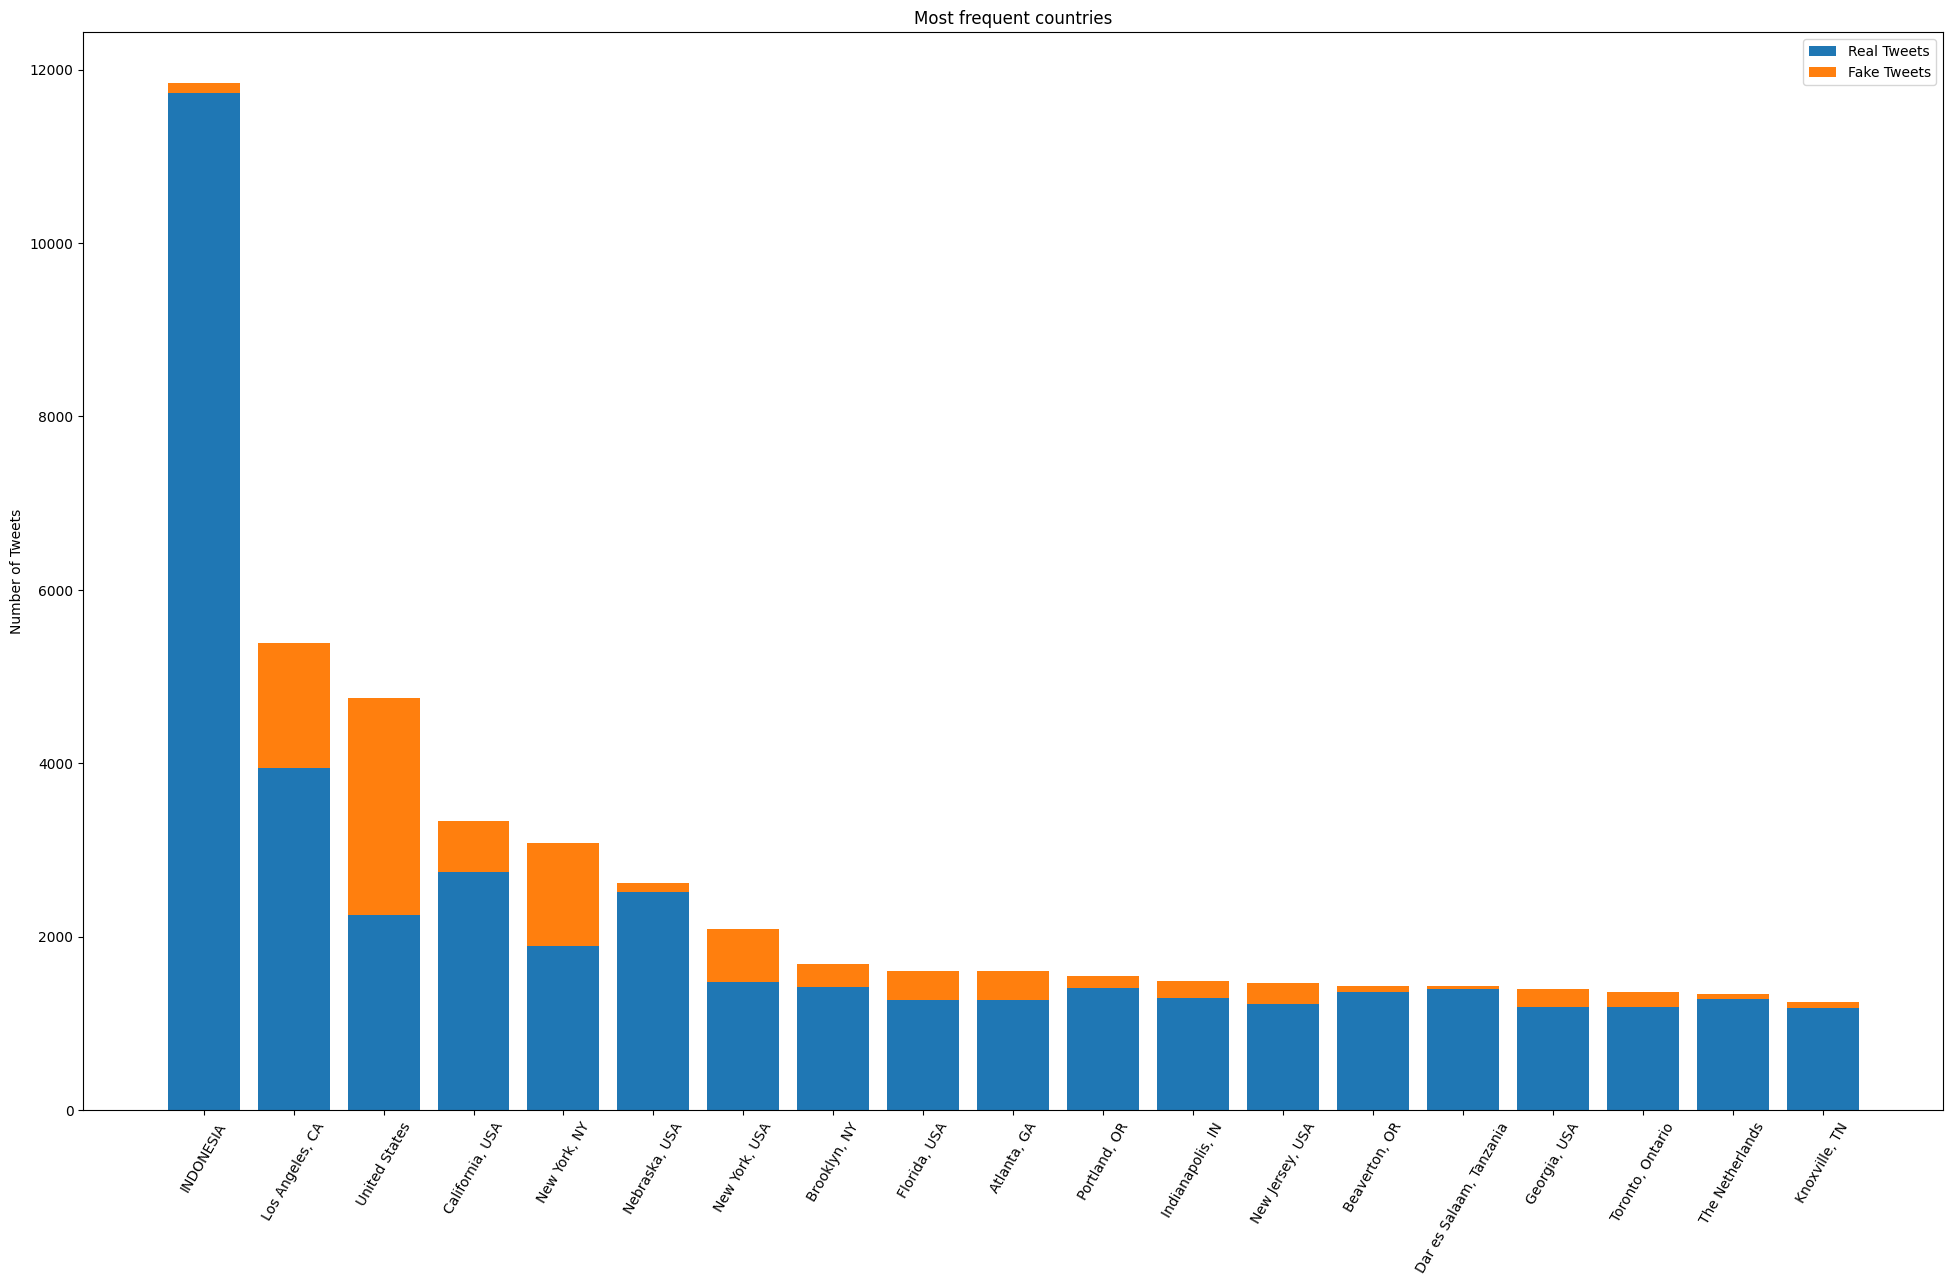

In [ ]:
Top_countries = ["INDONESIA", "Los Angeles, CA", "United States", "California, USA", "New York, NY", "Nebraska, USA", "New York, USA", "Brooklyn, NY", "Florida, USA", "Atlanta, GA", "Portland, OR", "Indianapolis, IN", "New Jersey, USA", "Beaverton, OR", "Dar es Salaam, Tanzania", "Georgia, USA", "Toronto, Ontario", "The Netherlands", "Knoxville, TN"]
fake_count = []
real_count = []
for country in Top_countries:
  real_fake_count = merged_df[merged_df["location"] == country].groupby("label").size()
  fake_count.append(real_fake_count[0])
  real_count.append(real_fake_count[1])

fig, ax = plt.subplots(figsize=(24, 14))
ax.bar(Top_countries, real_count, label='Real Tweets')
ax.bar(Top_countries, fake_count, bottom=real_count, label='Fake Tweets')
ax.set_ylabel('Number of Tweets')
ax.set_title('Most frequent countries')
ax.legend()
plt.xticks(rotation=60)
plt.show()


#### **Ploting the number of real and fake tweets for which location attribute is not_available**

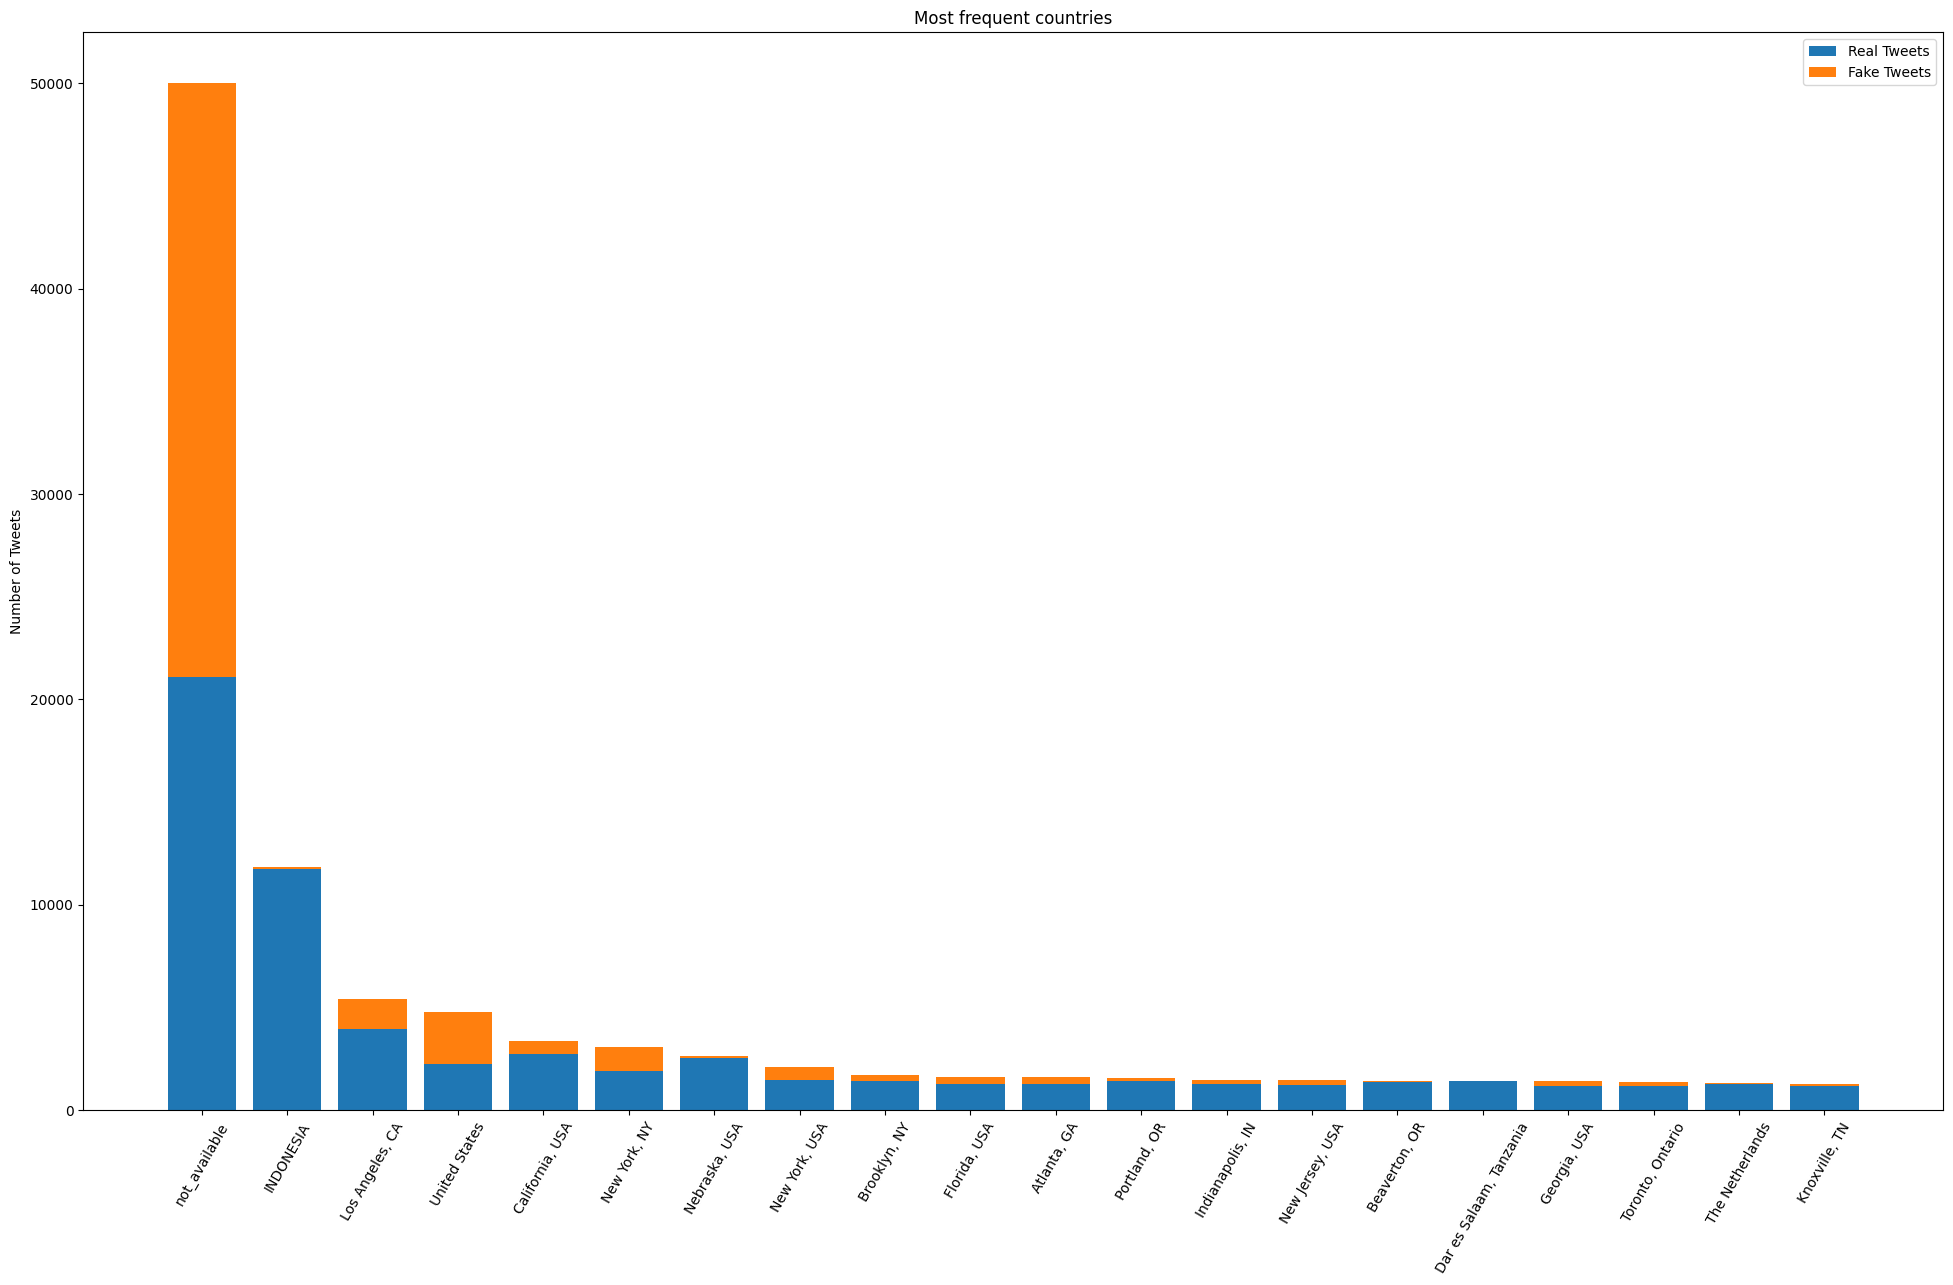

In [ ]:
Top_countries = ["not_available","INDONESIA", "Los Angeles, CA", "United States", "California, USA", "New York, NY", "Nebraska, USA", "New York, USA", "Brooklyn, NY", "Florida, USA", "Atlanta, GA", "Portland, OR", "Indianapolis, IN", "New Jersey, USA", "Beaverton, OR", "Dar es Salaam, Tanzania", "Georgia, USA", "Toronto, Ontario", "The Netherlands", "Knoxville, TN"]
fake_count = []
real_count = []
for country in Top_countries:
  real_fake_count = merged_df[merged_df["location"] == country].groupby("label").size()
  fake_count.append(real_fake_count[0])
  real_count.append(real_fake_count[1])

fig, ax = plt.subplots(figsize=(24, 14))
ax.bar(Top_countries, real_count, label='Real Tweets')
ax.bar(Top_countries, fake_count, bottom=real_count, label='Fake Tweets')
ax.set_ylabel('Number of Tweets')
ax.set_title('Most frequent countries')
ax.legend()
plt.xticks(rotation=60)
plt.show()

#### **Ploting number of Real and Fake tweets based on tweet id**

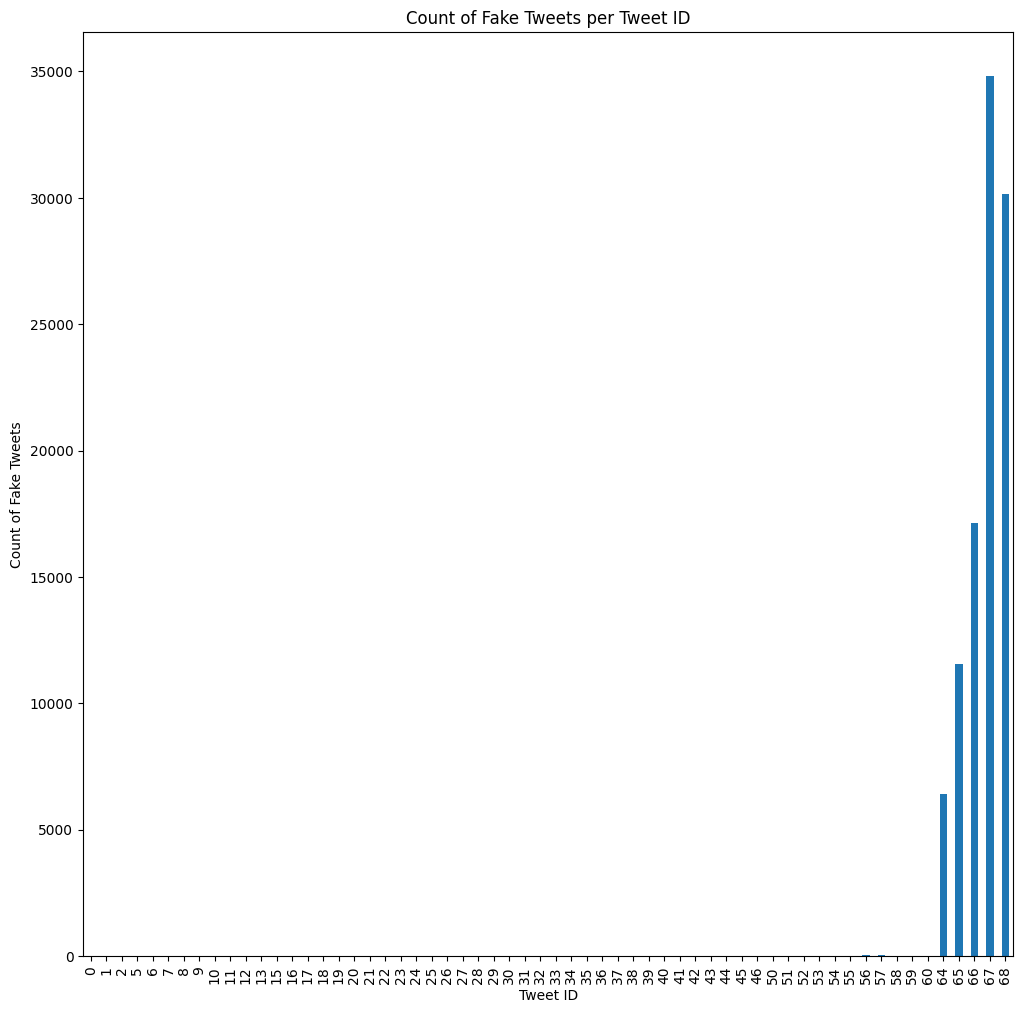

In [ ]:
fake_counts = merged_df[merged_df["label"] == 0].groupby("tweet_id").size()

# plot the results as a bar graph
plt.figure(figsize=(12, 12))
fake_counts.plot(kind="bar")
plt.xlabel("Tweet ID")
plt.ylabel("Count of Fake Tweets")
plt.title("Count of Fake Tweets per Tweet ID")
plt.show()

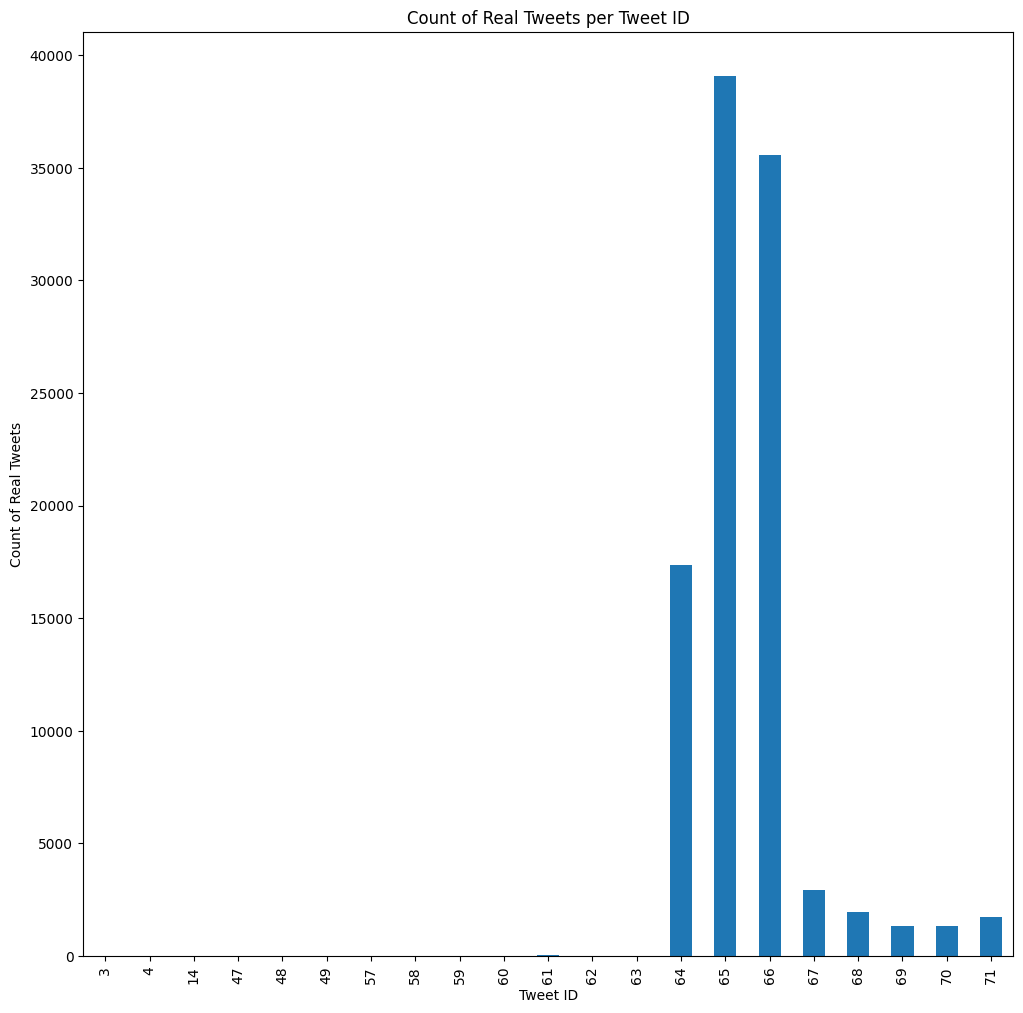

In [ ]:
fake_counts = merged_df[merged_df["label"] == 1].groupby("tweet_id").size()

# plot the results as a bar graph
plt.figure(figsize=(12, 12))
fake_counts.plot(kind="bar")
plt.xlabel("Tweet ID")
plt.ylabel("Count of Real Tweets")
plt.title("Count of Real Tweets per Tweet ID")
plt.show()

In [ ]:
#===========================================> Real Tweet data
x = merged_df[merged_df["label"] == 1]
x

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877,64,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,not_available,0,62467.0,0,0,0.0,1.0
1,57723,64,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0,2155.0,0,0,0.0,1.0
2,47328,64,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
3,47328,64,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0,307765.0,0,1,0.0,1.0
4,47328,64,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0,308597.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101315,38500,71,Veep shows the best female villain I’ve ever s...,144.0,315.0,"Boston, MA",0,3205.0,0,1,4.0,1.0
101316,18545,71,"Now that Doctor Who is done for the season, Ou...",113.0,559.0,"West Lawn, PA",0,22887.0,0,1,0.0,1.0
101317,44531,71,This is a playlist with music from some of the...,78.0,0.0,not_available,0,126627.0,0,1,0.0,1.0
101318,9077,71,@Darker_Horse There are some good P20 Pro deal...,3168.0,1250.0,United Kingdom,0,97101.0,1,1,0.0,1.0


#### **Plot of number of followers against number of  tweets**

[132913, 58396, 3943, 4452, 1404, 409]


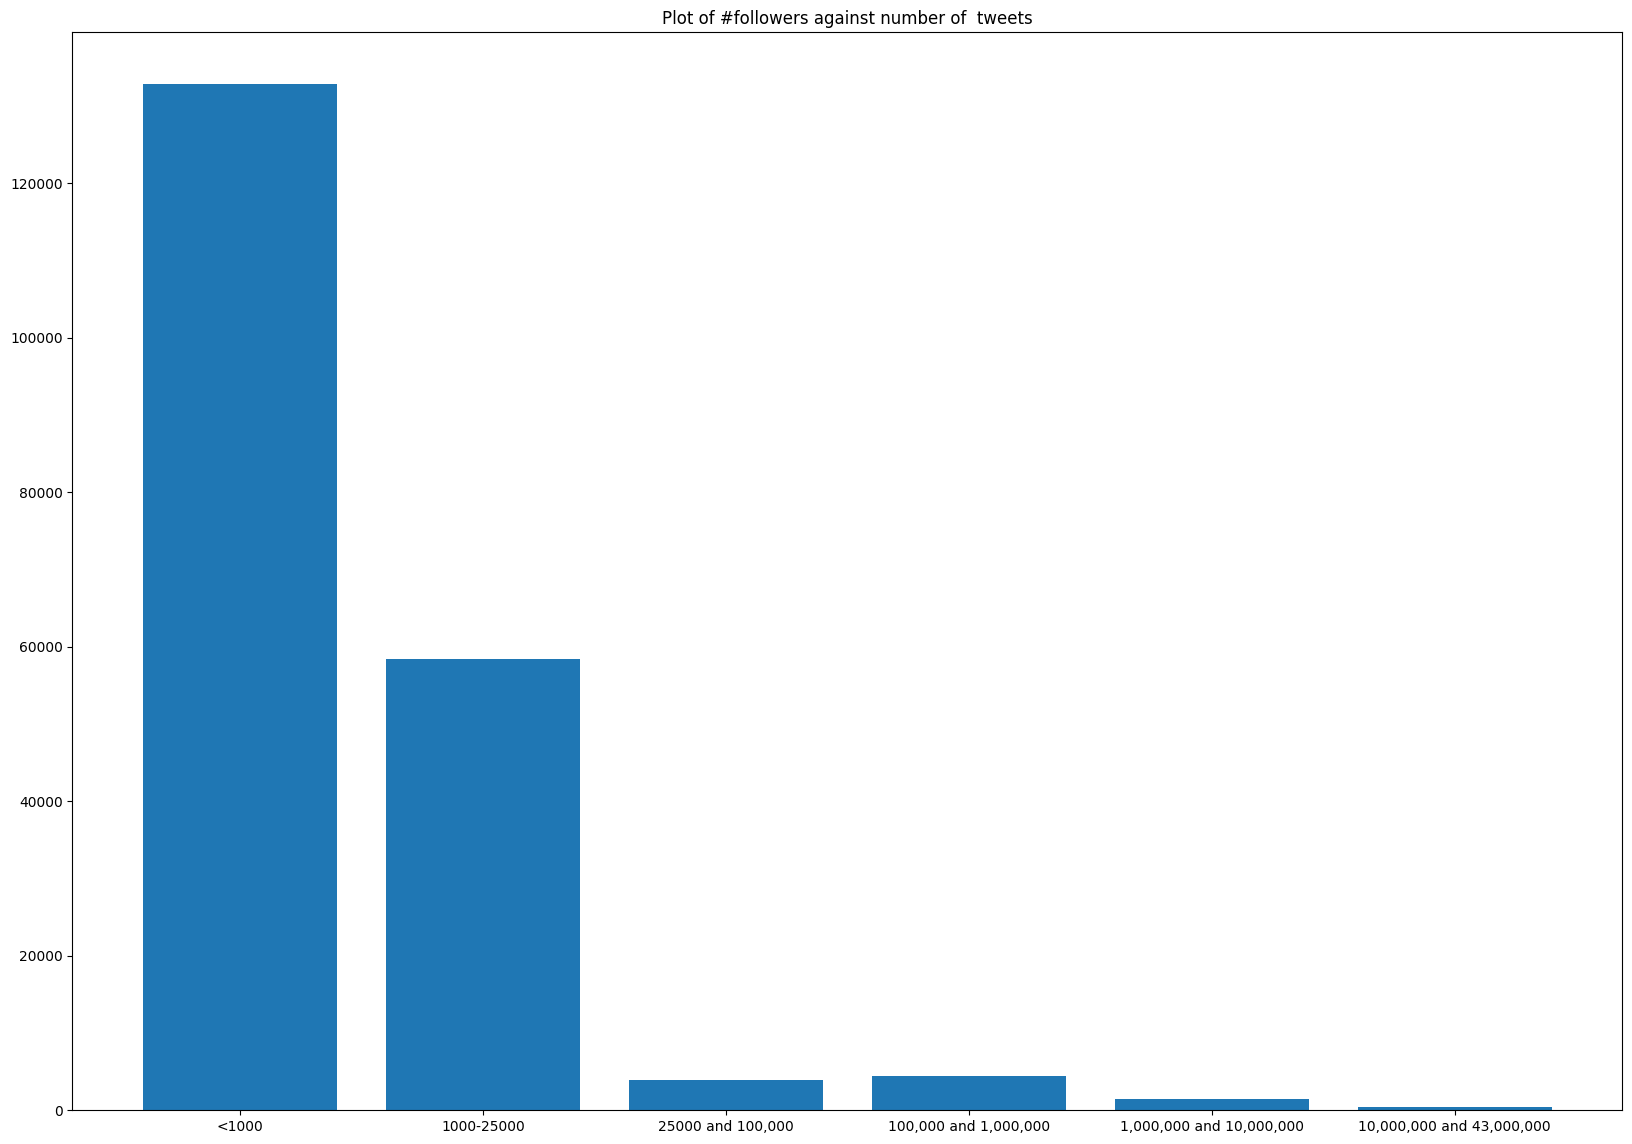

In [ ]:
less_than_1000 = merged_df[merged_df['followers']<=1000]
one_k_and_25000 = merged_df[(merged_df['followers'] <= 25000) & (merged_df['followers'] > 1000)]
twenty_five_k_and_100k = merged_df[(merged_df['followers'] <= 100000) & (merged_df['followers'] > 25000)]
one_hundred_k_and_1mil = merged_df[(merged_df['followers'] <= 1000000) & (merged_df['followers'] > 100000)]
one_mil_and_10mil = merged_df[(merged_df['followers'] <= 10000000) & (merged_df['followers'] > 1000000)]
ten_mil_and_max = merged_df[(merged_df['followers'] <=42547591 ) & (merged_df['followers'] > 10000000)]

counts = []
counts.append(less_than_1000['followers'].count())
counts.append(one_k_and_25000['followers'].count())
counts.append(twenty_five_k_and_100k['followers'].count())
counts.append(one_hundred_k_and_1mil['followers'].count())
counts.append(one_mil_and_10mil['followers'].count())
counts.append(ten_mil_and_max['followers'].count())
print(counts)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of #followers against number of  tweets")
plt.bar(labels, counts)

plt.show()

#### **Plot of number of following against number of  tweets**

[135241, 64011, 1407, 857, 4, 0]


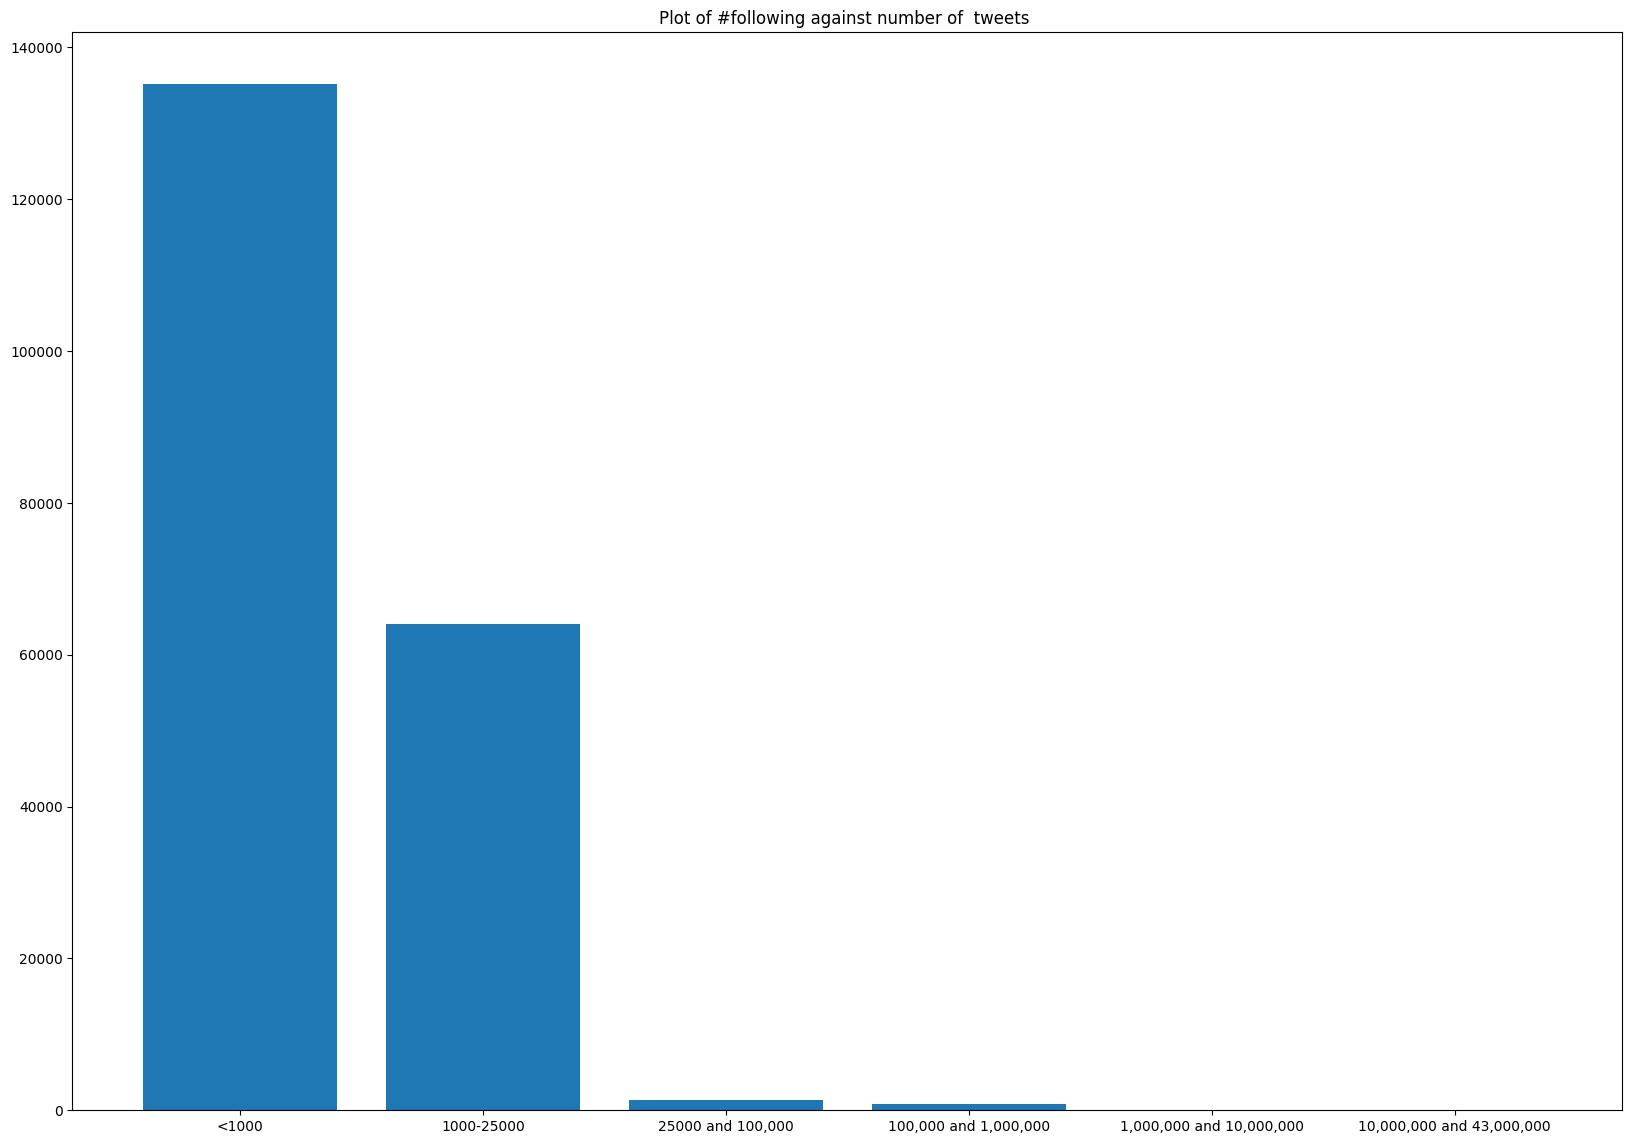

In [ ]:
less_than_1000 = merged_df[merged_df['following']<=1000]
one_k_and_25000 = merged_df[(merged_df['following'] <= 25000) & (merged_df['following'] > 1000)]
twenty_five_k_and_100k = merged_df[(merged_df['following'] <= 100000) & (merged_df['following'] > 25000)]
one_hundred_k_and_1mil = merged_df[(merged_df['following'] <= 1000000) & (merged_df['following'] > 100000)]
one_mil_and_10mil = merged_df[(merged_df['following'] <= 10000000) & (merged_df['following'] > 1000000)]
ten_mil_and_max = merged_df[(merged_df['following'] <=42547591 ) & (merged_df['following'] > 10000000)]

counts = []
counts.append(less_than_1000['following'].count())
counts.append(one_k_and_25000['following'].count())
counts.append(twenty_five_k_and_100k['following'].count())
counts.append(one_hundred_k_and_1mil['following'].count())
counts.append(one_mil_and_10mil['following'].count())
counts.append(ten_mil_and_max['following'].count())
print(counts)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of #following against number of  tweets ")
plt.bar(labels, counts)

plt.show()

#### **Plot of number of followers against number of real tweets**

max followers are:  42547591.0
[68334, 29015, 1430, 1818, 394, 329]


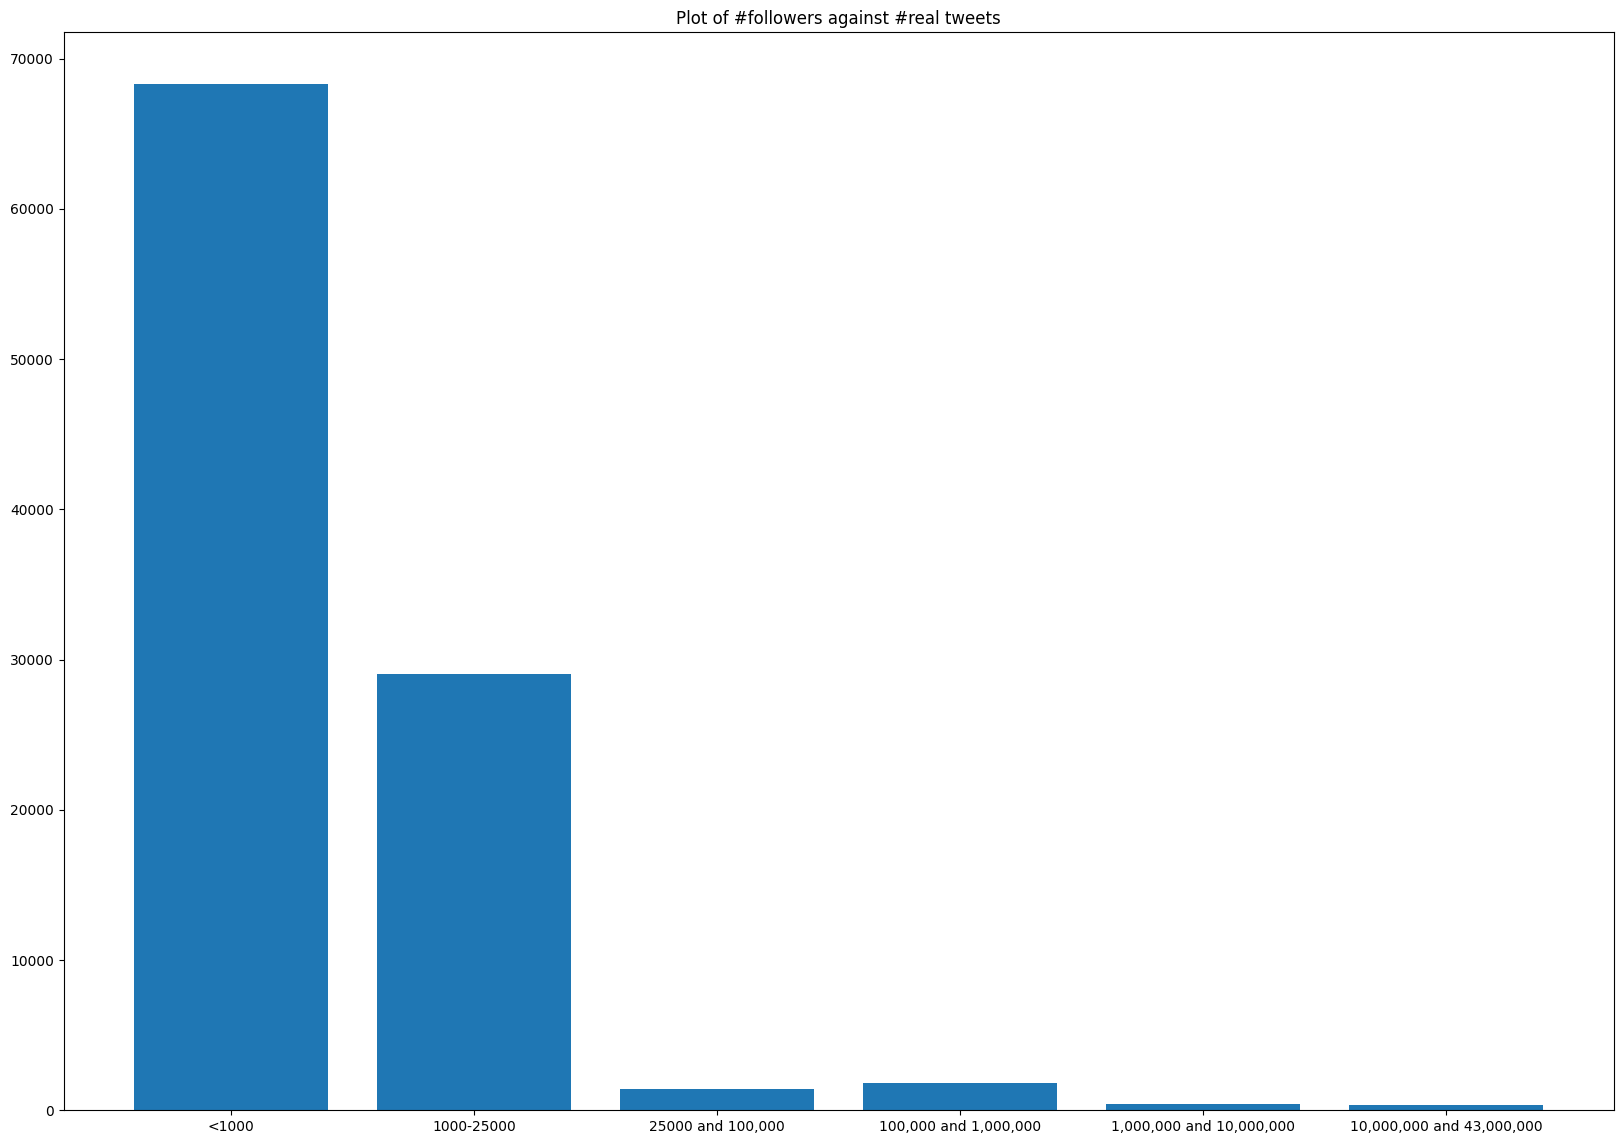

In [ ]:
###### CODE FOR MANUALLY CREATING BINS AND MAKING HISTOGRAMS FOR FOLLOWERS AGAINST REAL TWEETS#####
print("max followers are: ", x['followers'].max())
less_than_1000 = x[x['followers']<=1000]
one_k_and_25000 = x[(x['followers'] <= 25000) & (x['followers'] > 1000)]
twenty_five_k_and_100k = x[(x['followers'] <= 100000) & (x['followers'] > 25000)]
one_hundred_k_and_1mil = x[(x['followers'] <= 1000000) & (x['followers'] > 100000)]
one_mil_and_10mil = x[(x['followers'] <= 10000000) & (x['followers'] > 1000000)]
ten_mil_and_max = x[(x['followers'] <=42547591 ) & (x['followers'] > 10000000)]

counts = []
counts.append(less_than_1000['followers'].count())
counts.append(one_k_and_25000['followers'].count())
counts.append(twenty_five_k_and_100k['followers'].count())
counts.append(one_hundred_k_and_1mil['followers'].count())
counts.append(one_mil_and_10mil['followers'].count())
counts.append(ten_mil_and_max['followers'].count())
print(counts)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of #followers against #real tweets")
plt.bar(labels, counts)

plt.show()

#### **Plot of number of followers against number of fake tweets**

max followers are:  42547591.0
[64579, 29381, 2513, 2634, 1010, 80]


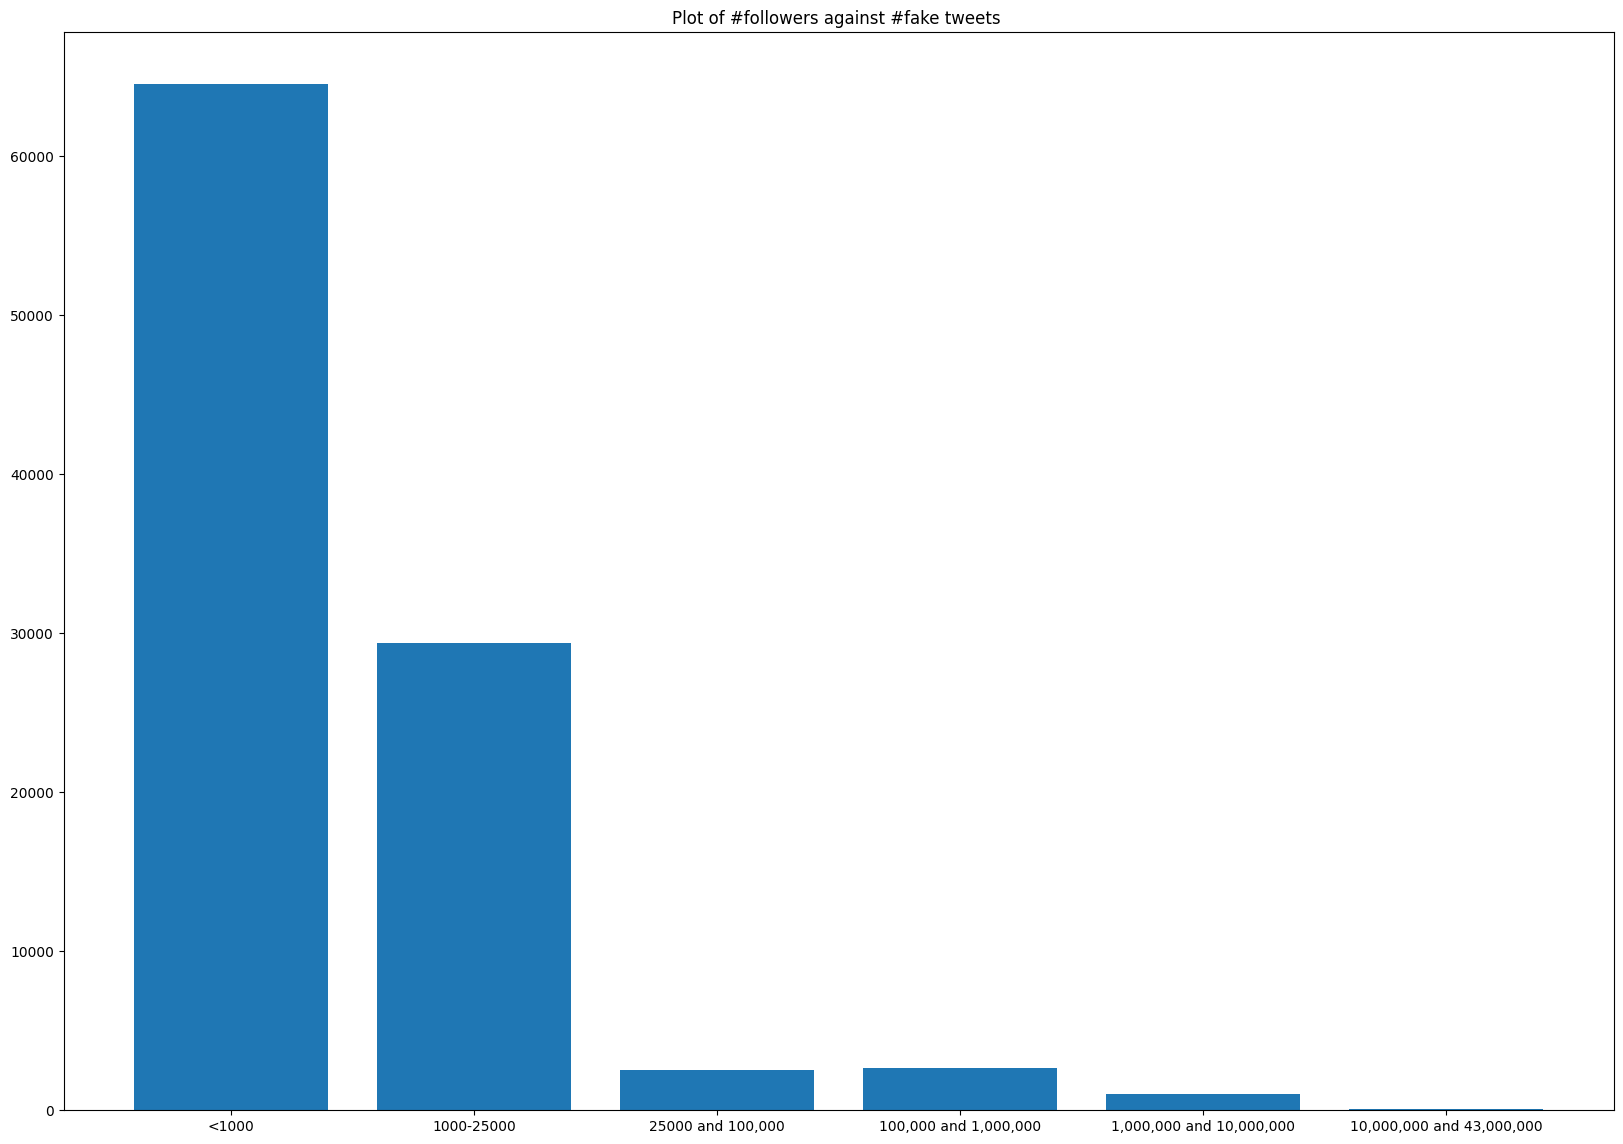

In [ ]:
###### CODE FOR MANUALLY CREATING BINS AND MAKING HISTOGRAMS FOR FOLLOWERS AGAINST FAKE TWEETS#####
fake_tweets = merged_df[merged_df["label"] == 0]
print("max followers are: ", x['followers'].max())
less_than_1000 = fake_tweets[fake_tweets['followers']<=1000]
one_k_and_25000 = fake_tweets[(fake_tweets['followers'] <= 25000) & (fake_tweets['followers'] > 1000)]
twenty_five_k_and_100k = fake_tweets[(fake_tweets['followers'] <= 100000) & (fake_tweets['followers'] > 25000)]
one_hundred_k_and_1mil = fake_tweets[(fake_tweets['followers'] <= 1000000) & (fake_tweets['followers'] > 100000)]
one_mil_and_10mil = fake_tweets[(fake_tweets['followers'] <= 10000000) & (fake_tweets['followers'] > 1000000)]
ten_mil_and_max = fake_tweets[(fake_tweets['followers'] <=42547591 ) & (fake_tweets['followers'] > 10000000)]

counts = []
counts.append(less_than_1000['followers'].count())
counts.append(one_k_and_25000['followers'].count())
counts.append(twenty_five_k_and_100k['followers'].count())
counts.append(one_hundred_k_and_1mil['followers'].count())
counts.append(one_mil_and_10mil['followers'].count())
counts.append(ten_mil_and_max['followers'].count())
print(counts)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of #followers against #fake tweets ")
plt.bar(labels, counts)

plt.show()

#### **Plot of number of following against number of real tweets**

max following are:  1209255.0
[65188, 34937, 664, 528, 3, 0]


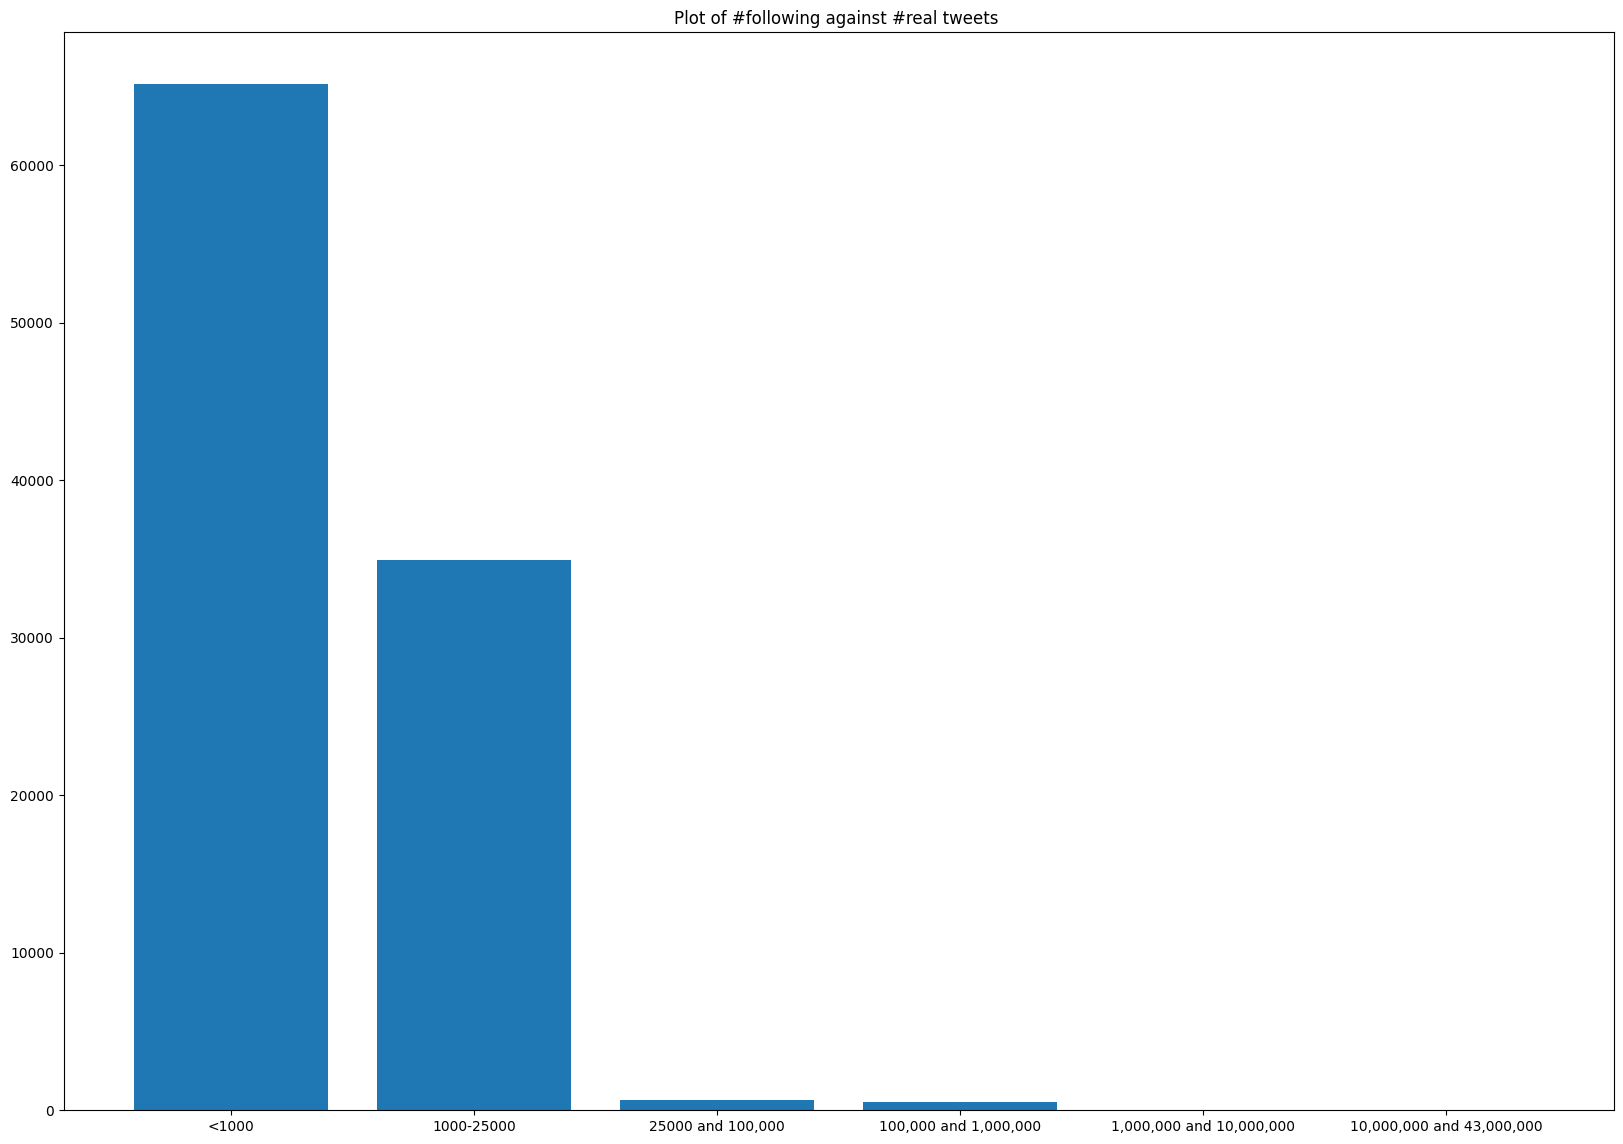

In [ ]:
###### CODE FOR MANUALLY CREATING BINS AND MAKING HISTOGRAMS FOR FOLLOWING AGAINST REAL TWEETS#####

print("max following are: ", x['following'].max())
less_than_1000 = x[x['following']<=1000]
one_k_and_25000 = x[(x['following'] <= 25000) & (x['following'] > 1000)]
twenty_five_k_and_100k = x[(x['following'] <= 100000) & (x['following'] > 25000)]
one_hundred_k_and_1mil = x[(x['following'] <= 1000000) & (x['following'] > 100000)]
one_mil_and_10mil = x[(x['following'] <= 10000000) & (x['following'] > 1000000)]
ten_mil_and_max = x[(x['following'] <=42547591 ) & (x['following'] > 10000000)]

counts = []
counts.append(less_than_1000['following'].count())
counts.append(one_k_and_25000['following'].count())
counts.append(twenty_five_k_and_100k['following'].count())
counts.append(one_hundred_k_and_1mil['following'].count())
counts.append(one_mil_and_10mil['following'].count())
counts.append(ten_mil_and_max['following'].count())
print(counts)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of #following against #real tweets ")
plt.bar(labels, counts)

plt.show()

#### **Plot of number of following against number of fake tweets**

max following are:  1209255.0
[70053, 29074, 743, 329, 1, 0]


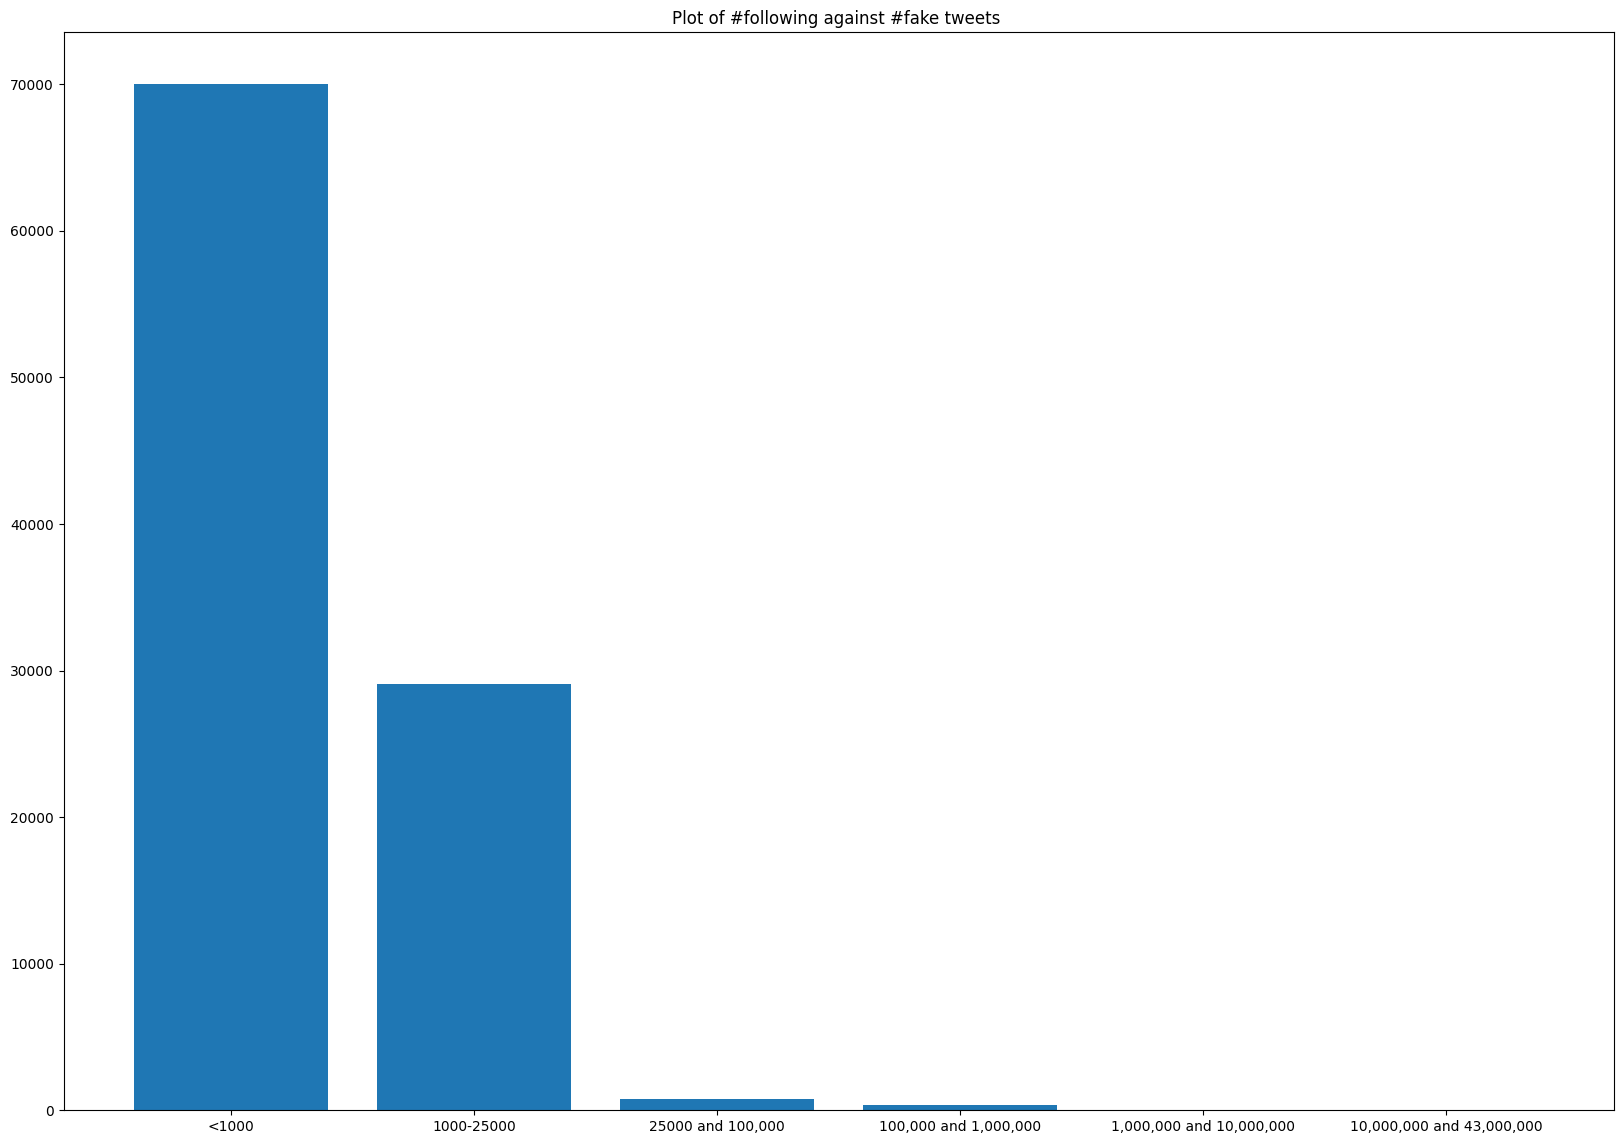

In [ ]:
###### CODE FOR MANUALLY CREATING BINS AND MAKING HISTOGRAMS FOR FOLLOWING AGAINST FAKE TWEETS#####

fake_tweets = merged_df[merged_df["label"] == 0]
print("max following are: ", x['following'].max())
less_than_1000 = fake_tweets[fake_tweets['following']<=1000]
one_k_and_25000 = fake_tweets[(fake_tweets['following'] <= 25000) & (fake_tweets['following'] > 1000)]
twenty_five_k_and_100k = fake_tweets[(fake_tweets['following'] <= 100000) & (fake_tweets['following'] > 25000)]
one_hundred_k_and_1mil = fake_tweets[(fake_tweets['following'] <= 1000000) & (fake_tweets['following'] > 100000)]
one_mil_and_10mil = fake_tweets[(fake_tweets['following'] <= 10000000) & (fake_tweets['following'] > 1000000)]
ten_mil_and_max = fake_tweets[(fake_tweets['following'] <=42547591 ) & (fake_tweets['following'] > 10000000)]

counts = []
counts.append(less_than_1000['following'].count())
counts.append(one_k_and_25000['following'].count())
counts.append(twenty_five_k_and_100k['following'].count())
counts.append(one_hundred_k_and_1mil['following'].count())
counts.append(one_mil_and_10mil['following'].count())
counts.append(ten_mil_and_max['following'].count())
print(counts)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of #following against #fake tweets ")
plt.bar(labels, counts)

plt.show()

#### **Plot of average status count against number of following for fake tweets**

[36307.675174510725, 83004.60614294559, 243953.0255720054, 693630.0547112462, 312903.0, nan]


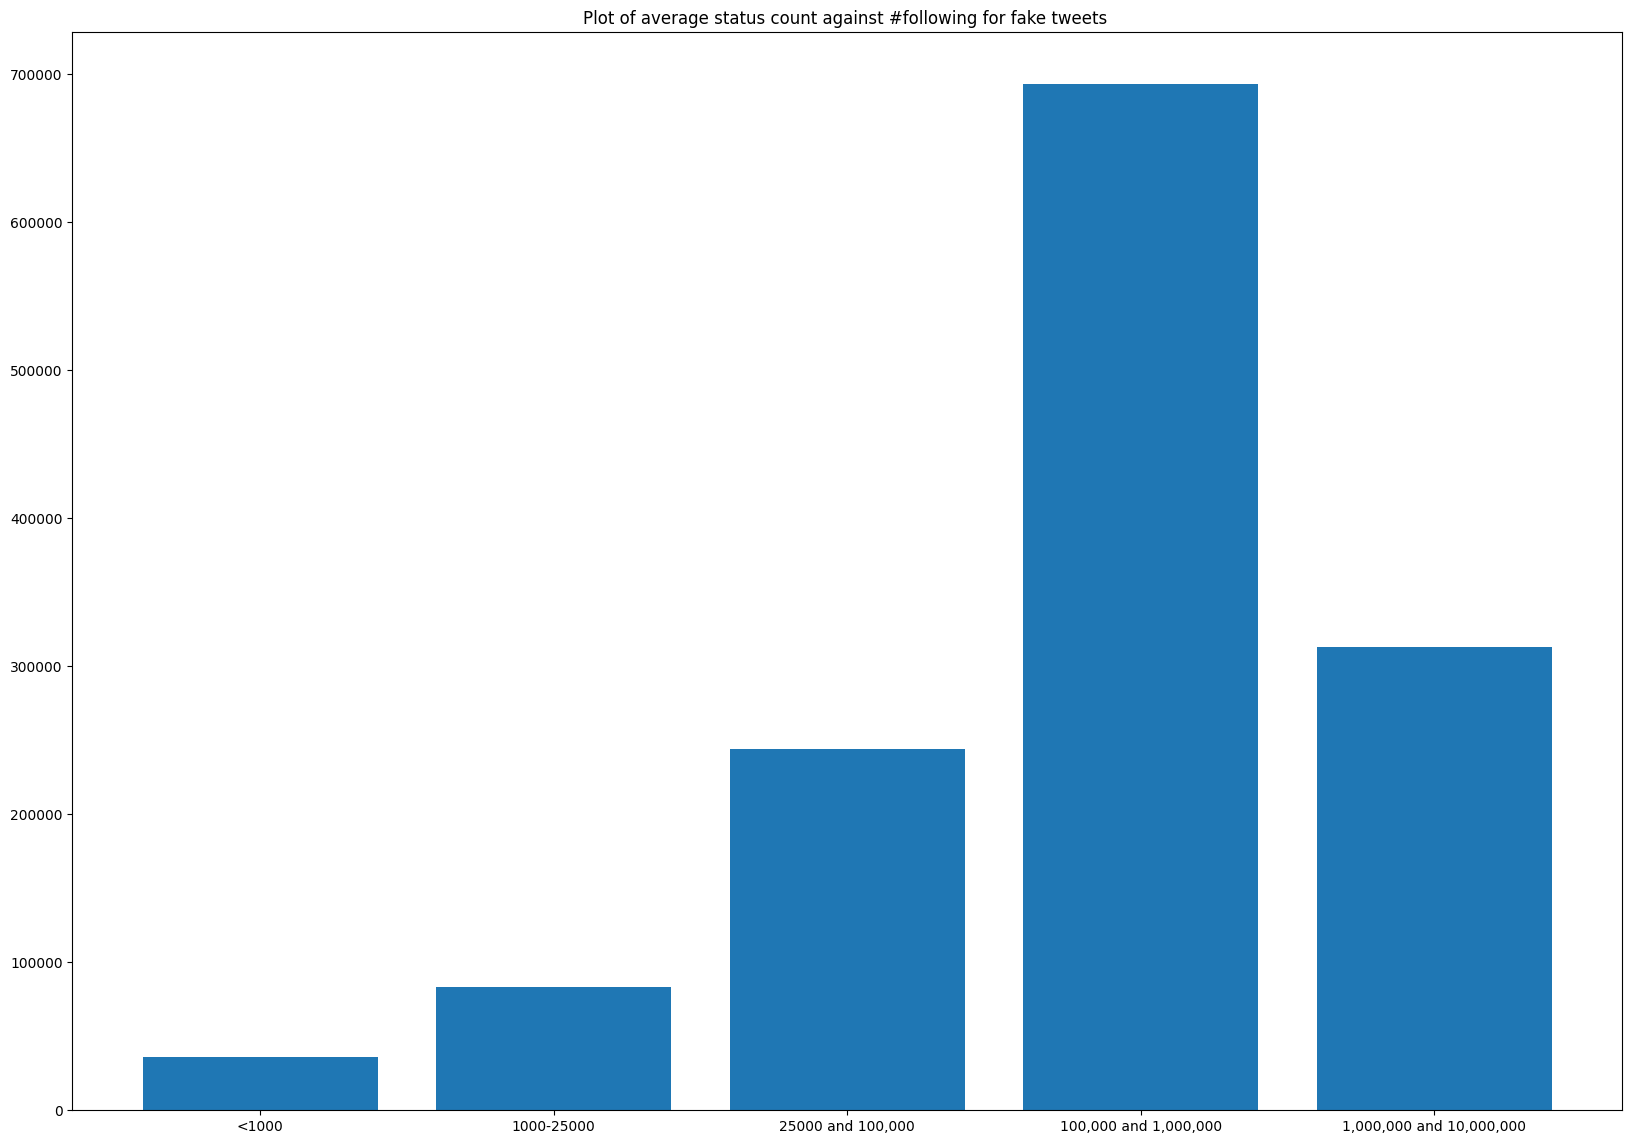

In [ ]:
#make these histograms
#status count against followers for fake tweets
#status count against following for fake tweets
#status count against labels for fake tweets
fake_tweets = merged_df[merged_df["label"] == 0] #fake tweets 
#get the average status count for each of the bind
less_than_1000 = fake_tweets[fake_tweets['following']<=1000]
one_k_and_25000 = fake_tweets[(fake_tweets['following'] <= 25000) & (fake_tweets['following'] > 1000)]
twenty_five_k_and_100k = fake_tweets[(fake_tweets['following'] <= 100000) & (fake_tweets['following'] > 25000)]
one_hundred_k_and_1mil = fake_tweets[(fake_tweets['following'] <= 1000000) & (fake_tweets['following'] > 100000)]
one_mil_and_10mil = fake_tweets[(fake_tweets['following'] <= 10000000) & (fake_tweets['following'] > 1000000)]
ten_mil_and_max = fake_tweets[(fake_tweets['following'] <=42547591 ) & (fake_tweets['following'] > 10000000)]

averages = []
averages.append(less_than_1000['statuses_count'].mean())
averages.append(one_k_and_25000['statuses_count'].mean())
averages.append(twenty_five_k_and_100k['statuses_count'].mean())
averages.append(one_hundred_k_and_1mil['statuses_count'].mean())
averages.append(one_mil_and_10mil['statuses_count'].mean())
averages.append(ten_mil_and_max['statuses_count'].mean())
print(averages)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of average status count against #following for fake tweets ")
plt.bar(labels, averages)
plt.show()



######################
#favourite count against labels
#favourite count against labels
#favourite agains labels



#### **Plot of average status count against number of followers for fake tweets**

[22043.914987844346, 94520.69432626528, 200941.93195384005, 173179.5747911921, 184744.98415841584, 225449.4375]


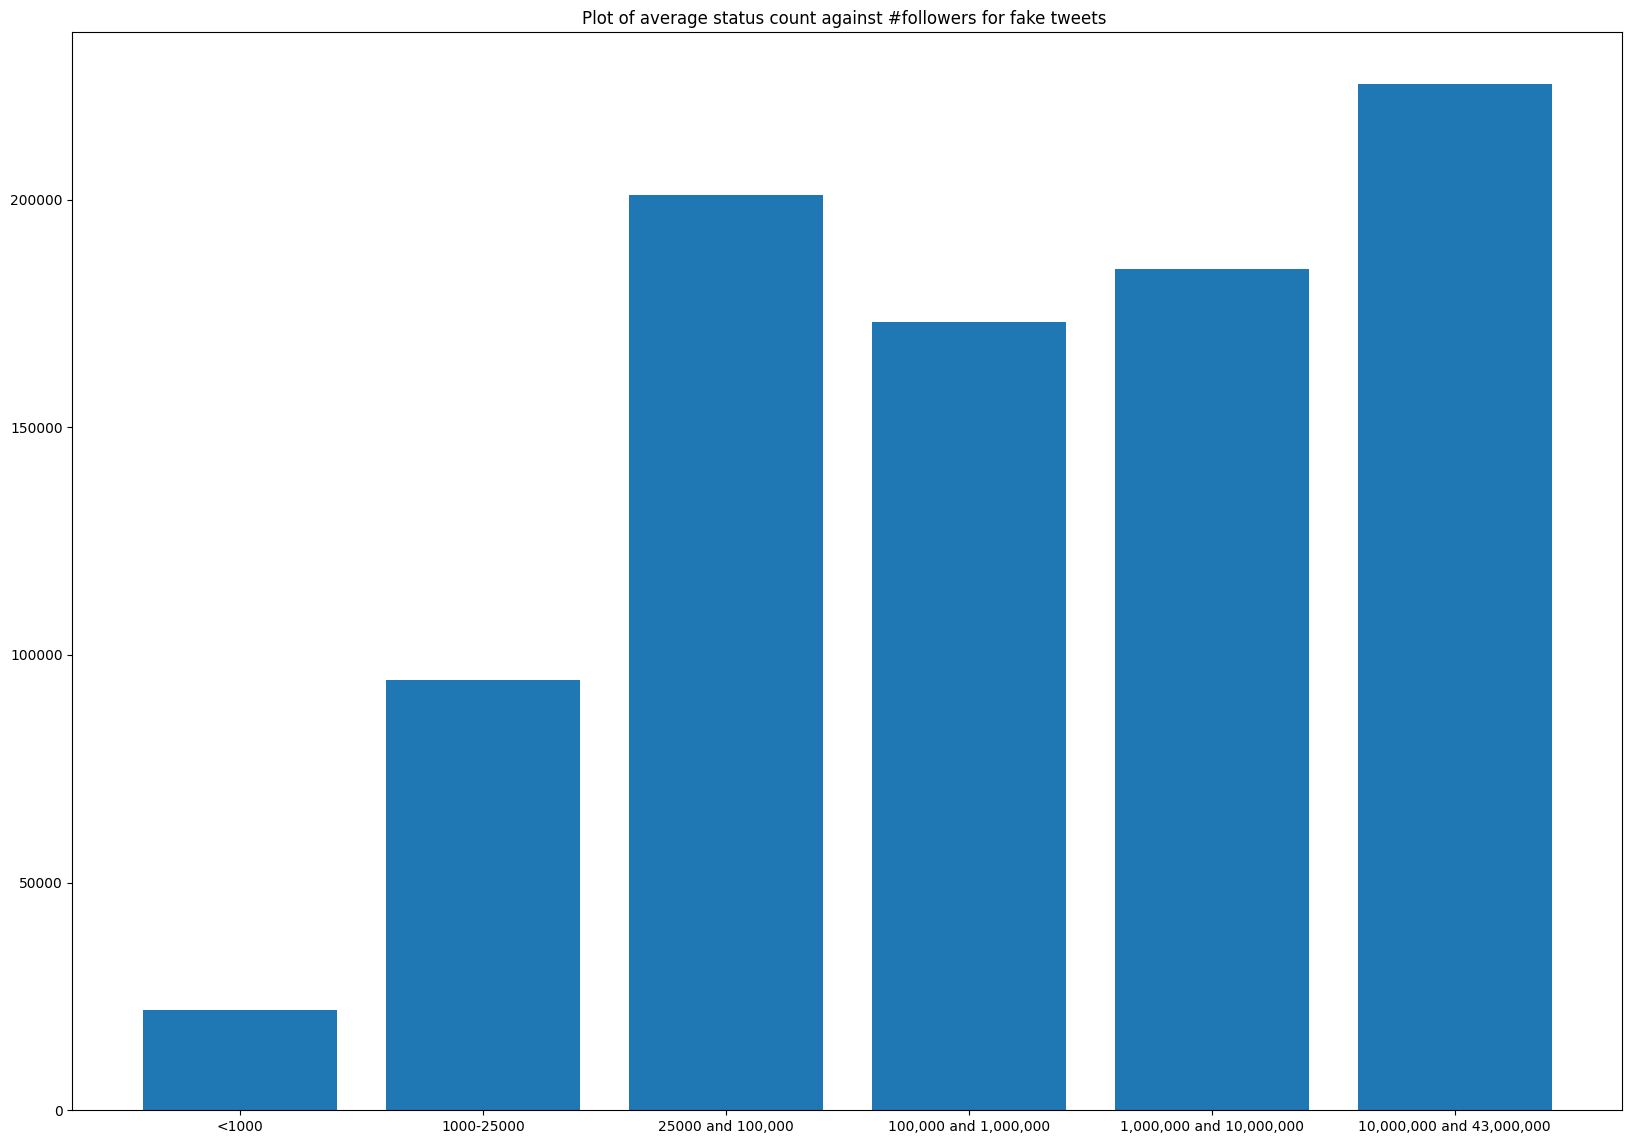

In [ ]:
fake_tweets = merged_df[merged_df["label"] == 0] #fake tweets 
#get the average status count for each of the bind
less_than_1000 = fake_tweets[fake_tweets['followers']<=1000]
one_k_and_25000 = fake_tweets[(fake_tweets['followers'] <= 25000) & (fake_tweets['followers'] > 1000)]
twenty_five_k_and_100k = fake_tweets[(fake_tweets['followers'] <= 100000) & (fake_tweets['followers'] > 25000)]
one_hundred_k_and_1mil = fake_tweets[(fake_tweets['followers'] <= 1000000) & (fake_tweets['followers'] > 100000)]
one_mil_and_10mil = fake_tweets[(fake_tweets['followers'] <= 10000000) & (fake_tweets['followers'] > 1000000)]
ten_mil_and_max = fake_tweets[(fake_tweets['followers'] <=42547591 ) & (fake_tweets['followers'] > 10000000)]

averages = []
averages.append(less_than_1000['statuses_count'].mean())
averages.append(one_k_and_25000['statuses_count'].mean())
averages.append(twenty_five_k_and_100k['statuses_count'].mean())
averages.append(one_hundred_k_and_1mil['statuses_count'].mean())
averages.append(one_mil_and_10mil['statuses_count'].mean())
averages.append(ten_mil_and_max['statuses_count'].mean())
print(averages)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of average status count against #followers for fake tweets ")
plt.bar(labels, averages)
plt.show()


#### **Plot of average status count against number of following for real tweets**

[39997.53508314414, 226800.2043964851, 337183.9578313253, 246868.82575757575, 113188.33333333333, nan]


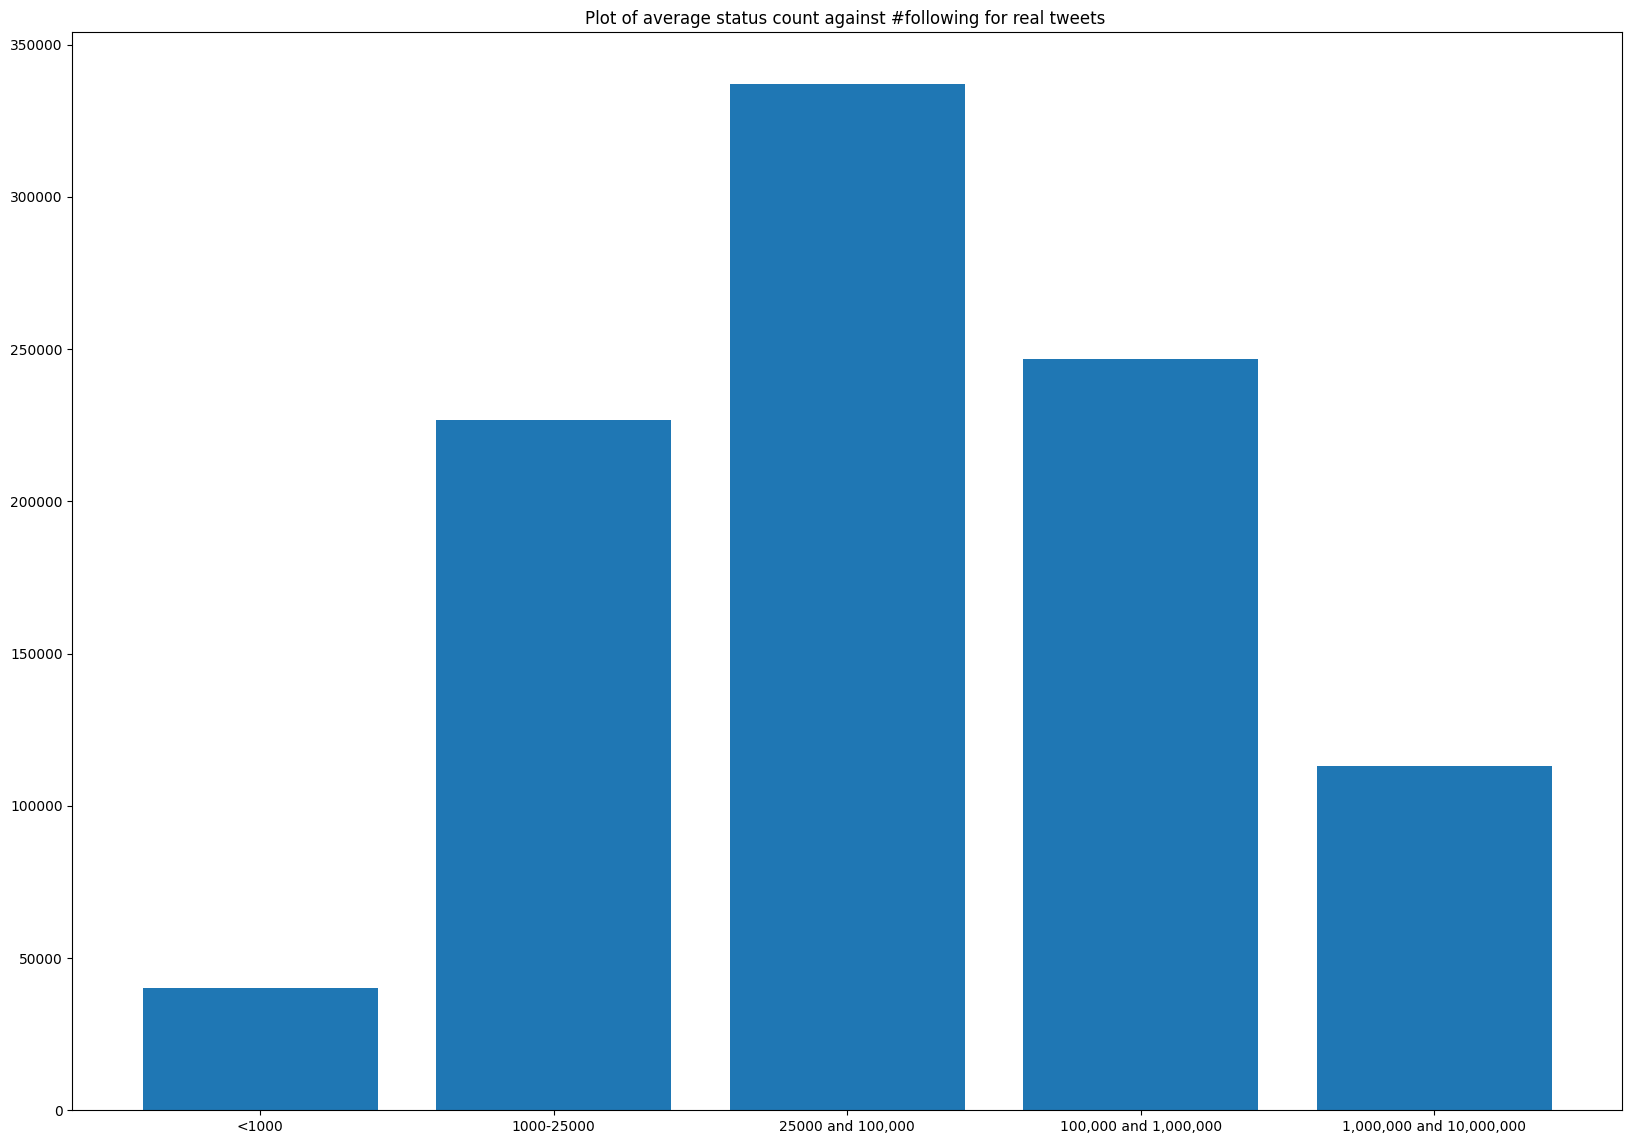

In [ ]:
real_tweets = merged_df[merged_df["label"] == 1] #real tweets 
#get the average status count for each of the bind
less_than_1000 = real_tweets[real_tweets['following']<=1000]
one_k_and_25000 = real_tweets[(real_tweets['following'] <= 25000) & (real_tweets['following'] > 1000)]
twenty_five_k_and_100k = real_tweets[(real_tweets['following'] <= 100000) & (real_tweets['following'] > 25000)]
one_hundred_k_and_1mil = real_tweets[(real_tweets['following'] <= 1000000) & (real_tweets['following'] > 100000)]
one_mil_and_10mil = real_tweets[(real_tweets['following'] <= 10000000) & (real_tweets['following'] > 1000000)]
ten_mil_and_max = real_tweets[(real_tweets['following'] <=42547591 ) & (real_tweets['following'] > 10000000)]

averages = []
averages.append(less_than_1000['statuses_count'].mean())
averages.append(one_k_and_25000['statuses_count'].mean())
averages.append(twenty_five_k_and_100k['statuses_count'].mean())
averages.append(one_hundred_k_and_1mil['statuses_count'].mean())
averages.append(one_mil_and_10mil['statuses_count'].mean())
averages.append(ten_mil_and_max['statuses_count'].mean())
print(averages)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of average status count against #following for real tweets ")
plt.bar(labels, averages)
plt.show()

#### **Plot of average status count against number of followers for real tweets**

[38017.06196037112, 257526.11266586249, 174184.94265734265, 226778.22277227722, 196111.36294416245, 234168.04255319148]


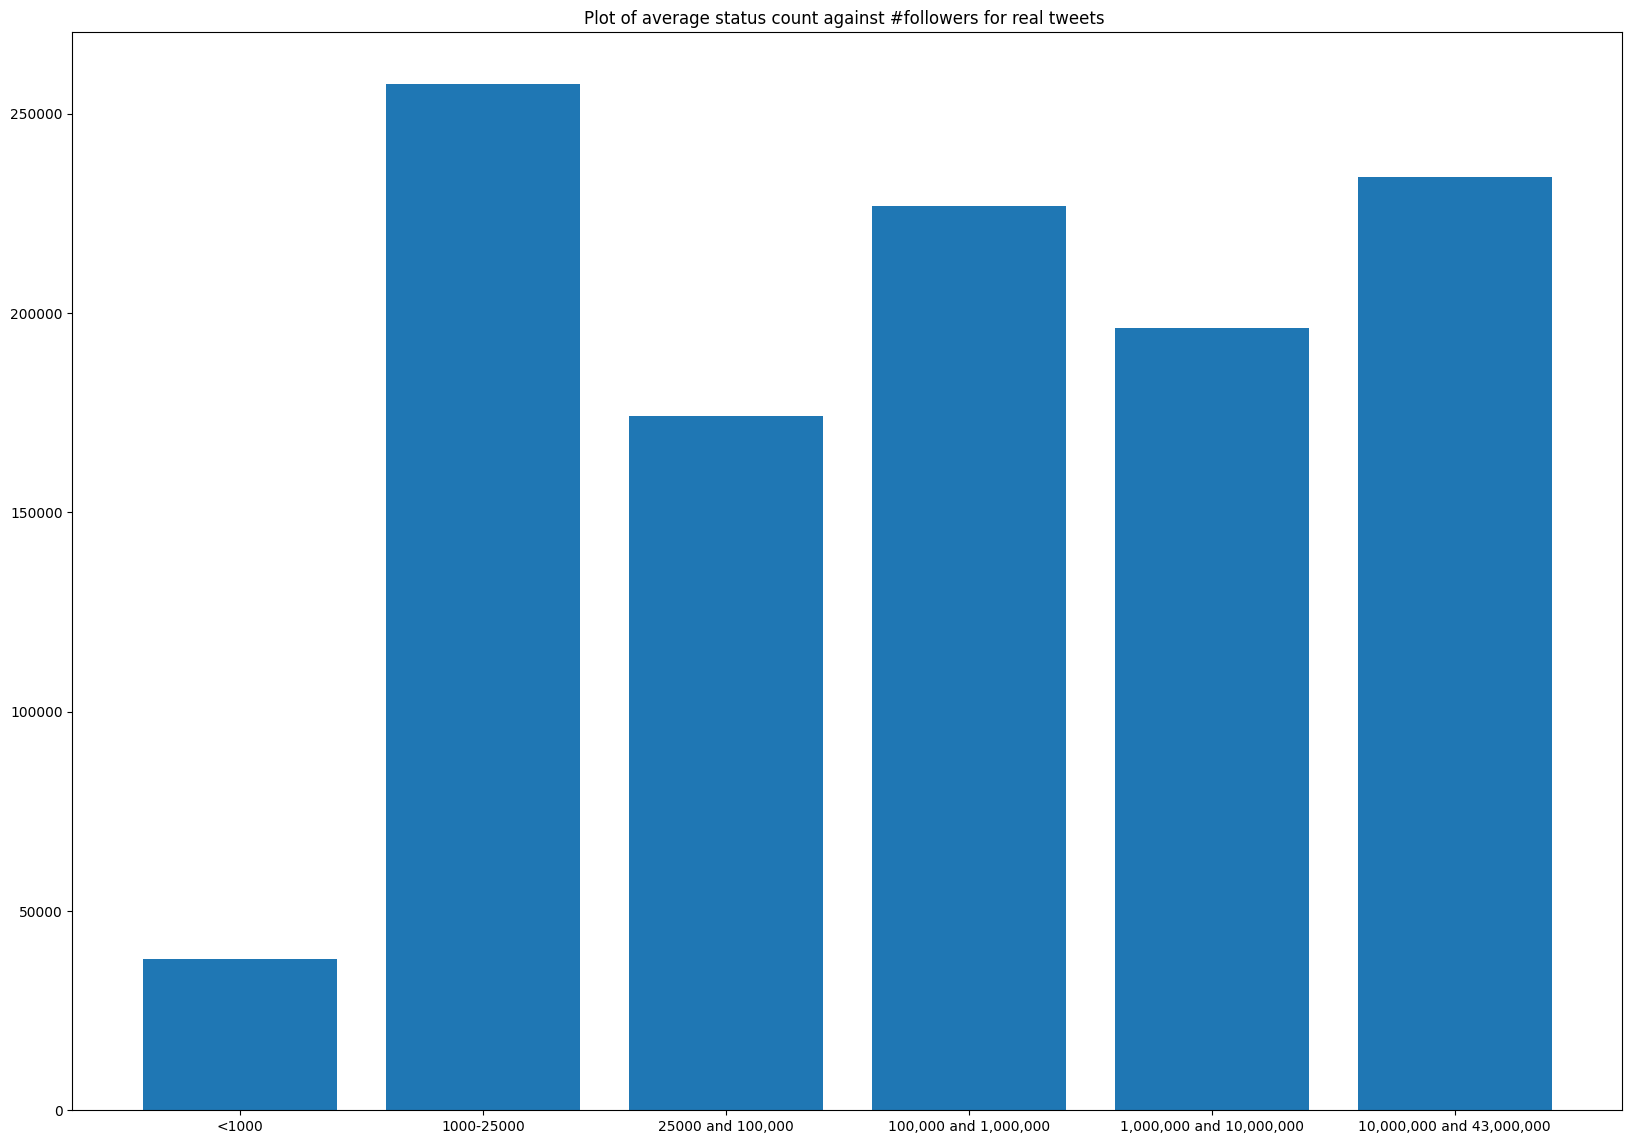

In [ ]:
real_tweets = merged_df[merged_df["label"] == 1] #real tweets 
#get the average status count for each of the bind
less_than_1000 = real_tweets[real_tweets['followers']<=1000]
one_k_and_25000 = real_tweets[(real_tweets['followers'] <= 25000) & (real_tweets['followers'] > 1000)]
twenty_five_k_and_100k = real_tweets[(real_tweets['followers'] <= 100000) & (real_tweets['followers'] > 25000)]
one_hundred_k_and_1mil = real_tweets[(real_tweets['followers'] <= 1000000) & (real_tweets['followers'] > 100000)]
one_mil_and_10mil = real_tweets[(real_tweets['followers'] <= 10000000) & (real_tweets['followers'] > 1000000)]
ten_mil_and_max = real_tweets[(real_tweets['followers'] <=42547591 ) & (real_tweets['followers'] > 10000000)]

averages = []
averages.append(less_than_1000['statuses_count'].mean())
averages.append(one_k_and_25000['statuses_count'].mean())
averages.append(twenty_five_k_and_100k['statuses_count'].mean())
averages.append(one_hundred_k_and_1mil['statuses_count'].mean())
averages.append(one_mil_and_10mil['statuses_count'].mean())
averages.append(ten_mil_and_max['statuses_count'].mean())
print(averages)

labels = ["<1000", "1000-25000", "25000 and 100,000", "100,000 and 1,000,000", "1,000,000 and 10,000,000", "10,000,000 and 43,000,000"]
plt.figure(figsize=(20, 14))
plt.title("Plot of average status count against #followers for real tweets ")
plt.bar(labels, averages)
plt.show()

#### **Computing correlation between numeric attributes**

In [ ]:
print("Summary of dataset")
merged_df.describe()


Summary of dataset


,user_id,tweet_id,followers,following,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
count,201520.000000,201520.00000,2.015200e+05,2.015200e+05,201520.000000,2.015200e+05,201520.00000,201520.000000,201520.000000,201520.000000
mean,41545.213031,66.09143,6.186774e+04,2.266402e+03,0.044184,8.064791e+04,0.15398,0.829253,5.763428,0.502779
std,18888.283189,1.56231,8.147951e+05,1.453970e+04,0.205505,1.757239e+05,0.36093,0.376289,172.766398,0.499994
min,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,26845.000000,65.00000,2.100000e+01,5.100000e+01,0.000000,6.857000e+03,0.00000,1.000000,0.000000,0.000000
50%,47513.500000,66.00000,3.290000e+02,3.430000e+02,0.000000,1.595300e+04,0.00000,1.000000,0.000000,1.000000
75%,57777.000000,67.00000,1.923000e+03,1.665000e+03,0.000000,7.446600e+04,0.00000,1.000000,0.000000,1.000000
max,57944.000000,71.00000,7.703821e+07,1.209255e+06,1.000000,9.482791e+06,1.00000,1.000000,38675.000000,1.000000


#### **Heat Map for correlation matrix**

                statuses_count  followers   user_id  following  favorite_count
statuses_count        1.000000   0.057845 -0.228977   0.147307       -0.000711
followers             0.057845   1.000000 -0.145459   0.215283        0.239842
user_id              -0.228977  -0.145459  1.000000  -0.133865       -0.030373
following             0.147307   0.215283 -0.133865   1.000000        0.031702
favorite_count       -0.000711   0.239842 -0.030373   0.031702        1.000000


<Axes: >

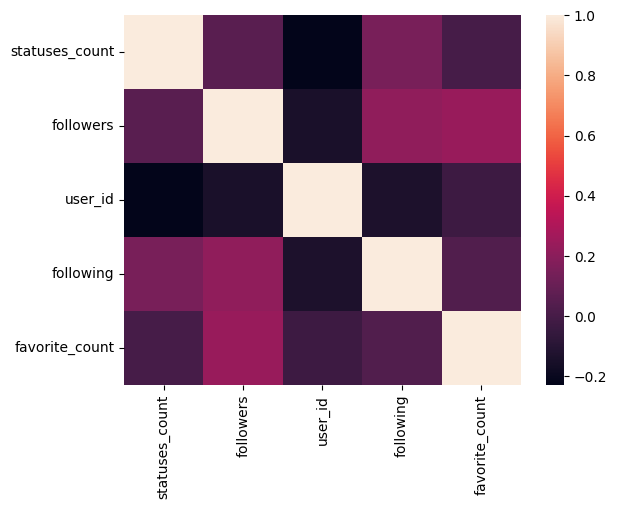

In [ ]:
##############################################
##############################################
#############computing correlation############
##############################################
##############################################
# correaltion is only between the numeric attributes 
'''
corr = backup_df.corr()
corr
sns.heatmap(corr)
'''

extracted_dataframe  = merged_df[['statuses_count','followers','user_id','following','favorite_count']].copy()
corr = extracted_dataframe.corr()
print(corr)
sns.heatmap(corr)

#### **Relation between Verified/Non-verified account and Real/Fake tweets**

[5540, 94660, 97956, 3364]


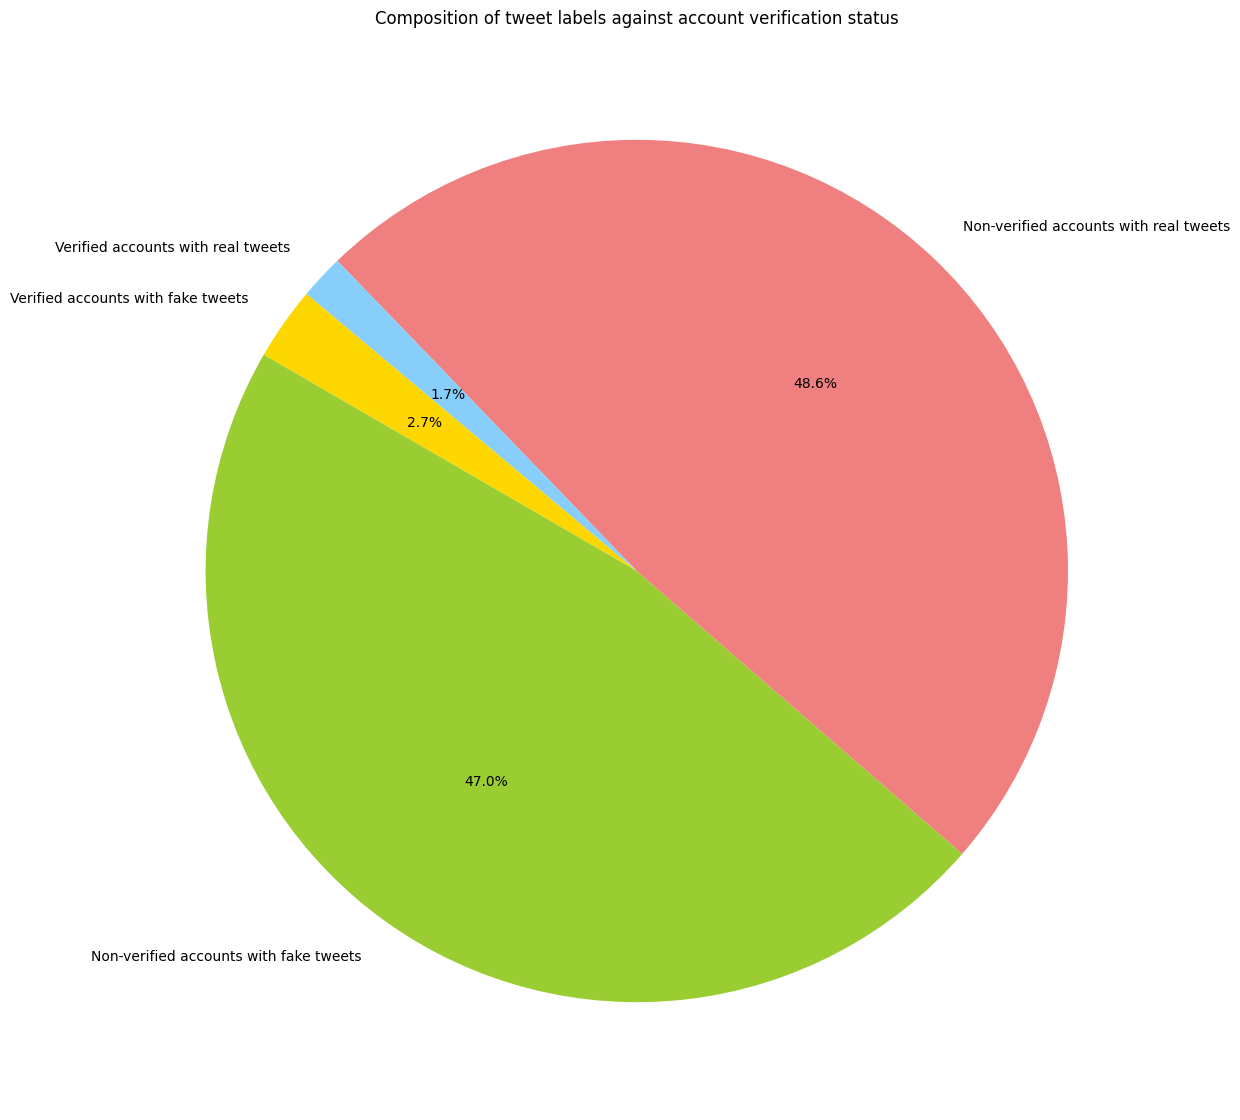

In [ ]:
#get the fake tweets
fake_tweets = merged_df[merged_df["label"] == 0] #fake tweets 
fake_tweets_verified = fake_tweets[fake_tweets['verified']==1] # of the fake tweets get all where account is verified
n_fake_verified = fake_tweets_verified.shape[0]
n_fake_non_verified = fake_tweets.shape[0] - n_fake_verified

# get the real tweets
real_tweets = merged_df[merged_df["label"] == 1] #fake tweets 
real_tweets_verified = real_tweets[real_tweets['verified']==1] # of the real tweets get all where account is verified
n_real_verified = real_tweets_verified.shape[0]
n_real_non_verified = real_tweets.shape[0] - n_real_verified

# draw the pie chart
values = []
values.append(n_fake_verified)
values.append(n_fake_non_verified)
values.append(n_real_non_verified)
values.append(n_real_verified)
print(values)

labels = ['Verified accounts with fake tweets', 'Non-verified accounts with fake tweets', 'Non-verified accounts with real tweets', 'Verified accounts with real tweets']

# Colors for the sections
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(20, 14))

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Composition of tweet labels against account verification status')

# Show the plot
plt.show()

#### **Relation between background_tile/Non-background_tile and Real/Fake tweets**

[20408, 79792, 10622, 90698]


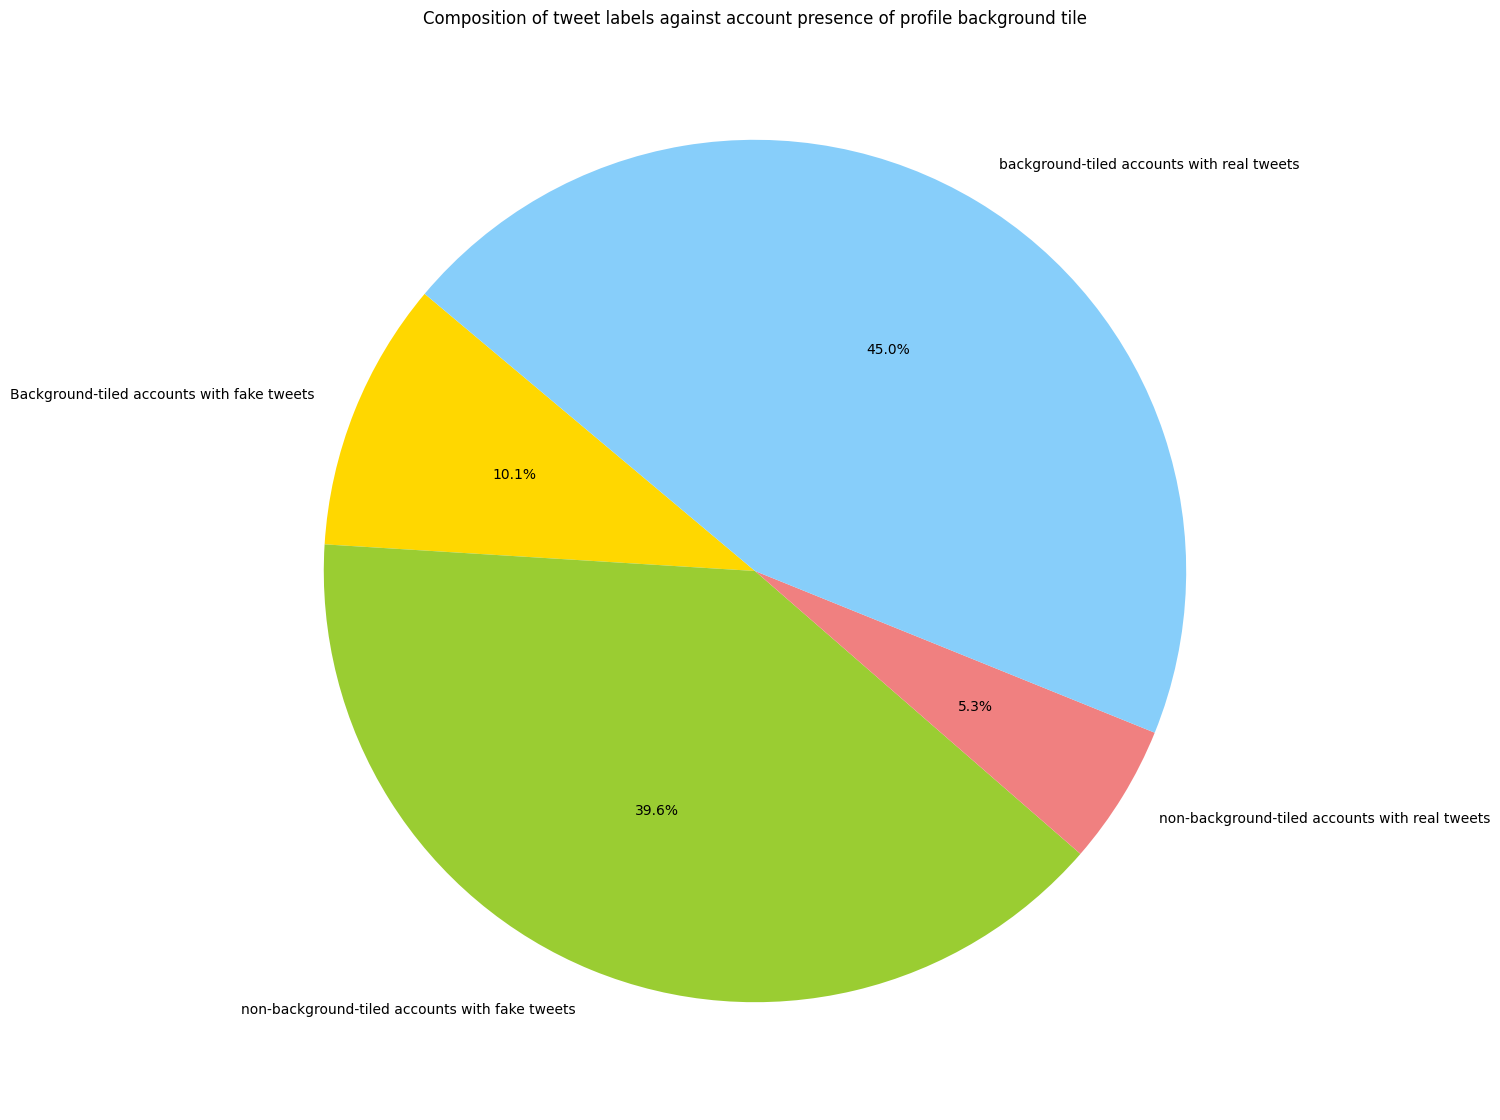

In [ ]:
#get the fake tweets
fake_tweets = merged_df[merged_df["label"] == 0] #fake tweets 
fake_tweets_verified = fake_tweets[fake_tweets['profile_background_tile']==1] # of the fake tweets get all where profile backgrount tile exists
n_fake_verified = fake_tweets_verified.shape[0]
n_fake_non_verified = fake_tweets.shape[0] - n_fake_verified

# get the real tweets
real_tweets = merged_df[merged_df["label"] == 1] #real tweets 
real_tweets_verified = real_tweets[real_tweets['profile_background_tile']==0] # of the real tweets get all where profile background tile does not exist
n_real_verified = real_tweets_verified.shape[0]
n_real_non_verified = real_tweets.shape[0] - n_real_verified

# draw the pie chart
values = []
values.append(n_fake_verified)
values.append(n_fake_non_verified)
values.append(n_real_non_verified)
values.append(n_real_verified)
print(values)

labels = ['Background-tiled accounts with fake tweets', 'non-background-tiled accounts with fake tweets', 'non-background-tiled accounts with real tweets', 'background-tiled accounts with real tweets']

# Colors for the sections
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(20, 14))

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Composition of tweet labels against account presence of profile background tile')

# Show the plot
plt.show()

#### **Relation between background_image/Non-background_image and Real/Fake tweets**

[78598, 21602, 88513, 12807]


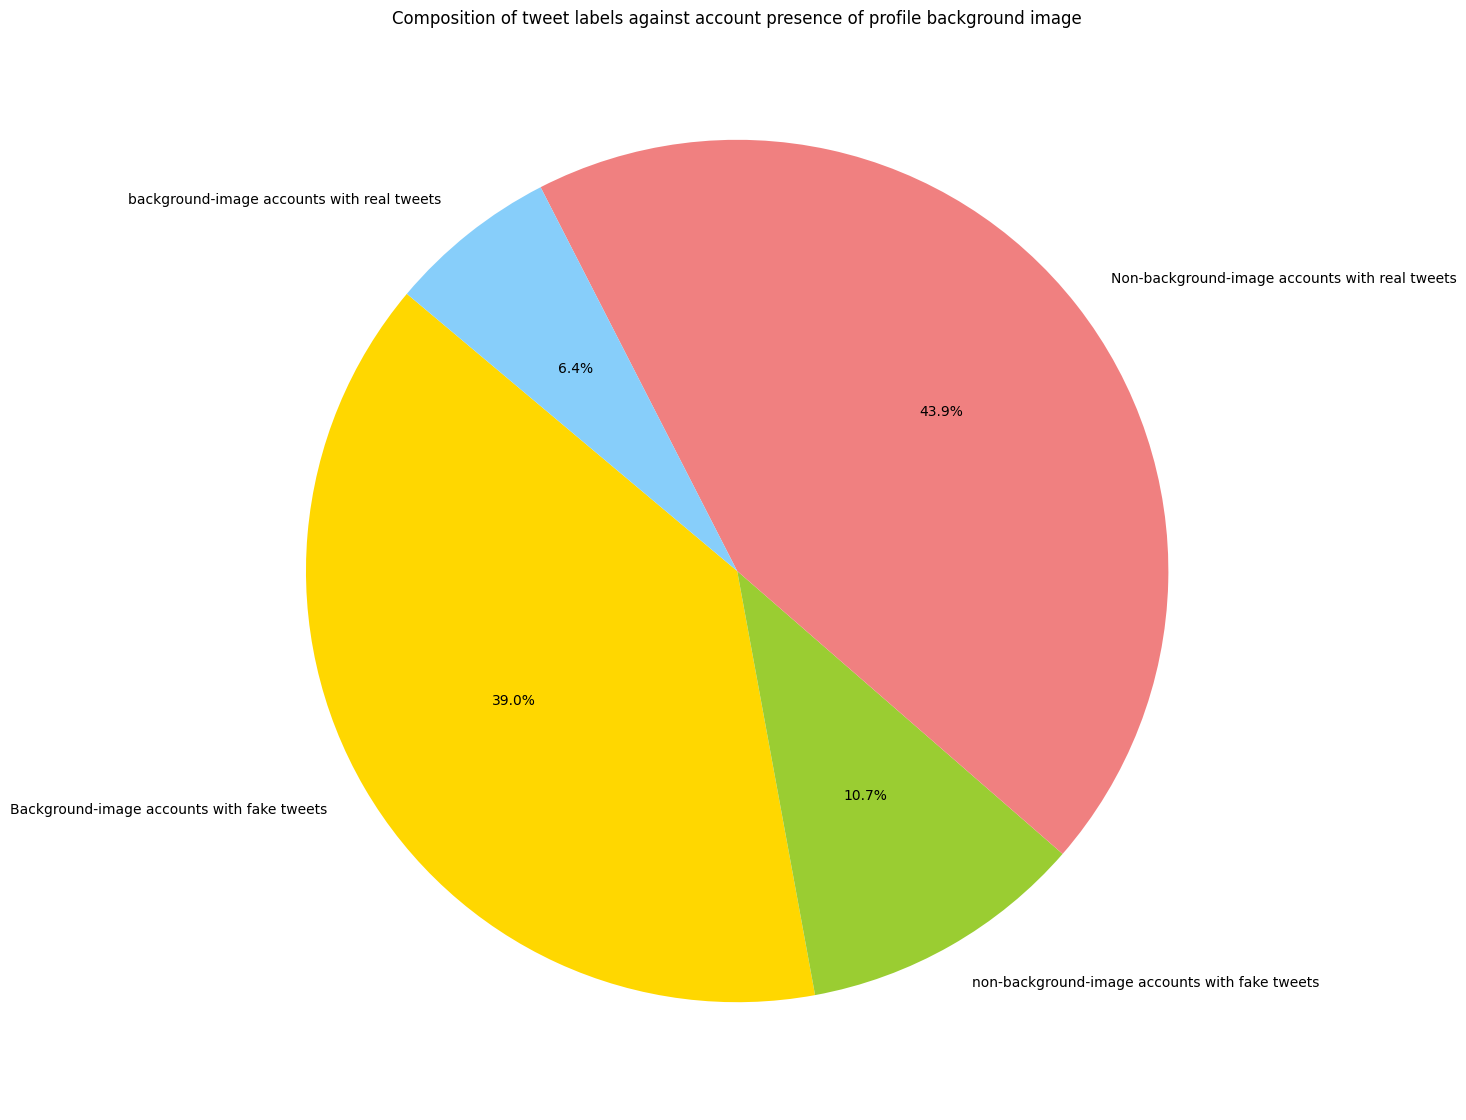

In [ ]:
#get the fake tweets
fake_tweets = merged_df[merged_df["label"] == 0] #fake tweets 
fake_tweets_verified = fake_tweets[fake_tweets['profile_use_background_image']==1] # of the fake tweets get all where account has background image
n_fake_verified = fake_tweets_verified.shape[0]
n_fake_non_verified = fake_tweets.shape[0] - n_fake_verified

# get the real tweets
real_tweets = merged_df[merged_df["label"] == 1] #real tweets 
real_tweets_verified = real_tweets[real_tweets['profile_use_background_image']==0] # of the real tweets get all where accoun has background image
n_real_verified = real_tweets_verified.shape[0]
n_real_non_verified = real_tweets.shape[0] - n_real_verified

# draw the pie chart
values = []
values.append(n_fake_verified)
values.append(n_fake_non_verified)
values.append(n_real_non_verified)
values.append(n_real_verified)
print(values)

labels = ['Background-image accounts with fake tweets', 'non-background-image accounts with fake tweets', 'Non-background-image accounts with real tweets', 'background-image accounts with real tweets']

# Colors for the sections
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(20, 14))

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Composition of tweet labels against account presence of profile background image')

# Show the plot
plt.show()

## **Computing most frequent words used in real and fake tweets and probability of the frequent words to be in real or fake tweet**

In [ ]:
################################# Pre processing of tweets
def pre_pro(df_in):
  tweets_text_list = list(df_in["text"])
  stop = ['i', 'i\'m', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re', 'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'don\'t', 'should', 'should\'ve', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

  #======================================================================================================> Pre-processing
  for indx in range(len(tweets_text_list)): 
    #=======================================================> convert strings to lowercase
    tweets_text_list[indx] = tweets_text_list[indx].casefold()
    #=======================================================> remove usernames and hyperlinks
    tweets_text_list[indx] = re.sub(r'@\w+\b', '', tweets_text_list[indx])
    tweets_text_list[indx] = re.sub(r'\bhttp\S*', '', tweets_text_list[indx])
    #=======================================================> removing digits and next line symbols
    tweets_text_list[indx] = re.sub(r'\d+', '', tweets_text_list[indx])
    tweets_text_list[indx] = re.sub(r'\n', '', tweets_text_list[indx])
    #=======================================================> remove punctuation and symbols
    tweets_text_list[indx] = re.sub(r'[^\w\s]', '', tweets_text_list[indx])
    #=======================================================> remove stop words
    wordlist = tweets_text_list[indx].split()
    for word in stop:
      if word in wordlist:
        tweets_text_list[indx] = tweets_text_list[indx].replace(' ' + word, '')
        tweets_text_list[indx] = tweets_text_list[indx].replace(word + ' ', '')
    #=======================================================> removes any leading/trailing spaces
    tweets_text_list[indx] = tweets_text_list[indx].lstrip()
    tweets_text_list[indx] = tweets_text_list[indx].rstrip()

  return tweets_text_list

In [ ]:
################################# Computing Vocab list (list of all unique words in tweets)
#=======================================================> vocab_list
tweets_text_list = pre_pro(merged_df)

vocab_list = []
for indx in range(len(tweets_text_list)):
  tweet = tweets_text_list[indx]
  words_in_tweet = tweet.split()
  for word in words_in_tweet:
    if word not in vocab_list:
      vocab_list.append(word)

In [ ]:
################################# List of all unique words in tweets
vocab_list_df = pd.DataFrame(vocab_list, columns =['Tweets Vocab'])
vocab_list_df.head(10)

,Tweets Vocab
0,ellen
1,degeneres
2,scares
3,bts
4,little
5,help
6,fangirl
7,new
8,post
9,royal


#### **Computing the count each vocab word in real and fake tweets**

In [ ]:
#=======================================================>
real_tweets = merged_df[merged_df["label"] == 1]
real_tweets_text = pre_pro(real_tweets)

fake_tweets = merged_df[merged_df["label"] == 0]
fake_tweets_text = pre_pro(fake_tweets)

In [ ]:
#=======================================================> word count
word_count = {}
#=======================================================>
for word in vocab_list:
  word_count[word] = [0,0]

#=======================================================>
for index in range(len(real_tweets_text)):
  tweet = real_tweets_text[index]
  words_in_tweet = tweet.split()
  for word in words_in_tweet:
    word_count[word][0] = word_count[word][0] + 1


In [ ]:
#=======================================================>
for index in range(len(fake_tweets_text)):
  tweet = fake_tweets_text[index]
  words_in_tweet = tweet.split()
  for word in words_in_tweet:
    word_count[word][1] = word_count[word][1] + 1

#### **sorting the words to get most frequent words in real and fake tweets**

In [ ]:
sorted_dic_real = dict(sorted(word_count.items(), key=lambda item: item[1][0],reverse=True))
sorted_dic_fake = dict(sorted(word_count.items(), key=lambda item: item[1][1],reverse=True))

print(sorted_dic_real)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(sorted_dic_fake)

Output hidden; open in https://colab.research.google.com to view.

#### **Union of top words used in real and fake tweets**

In [ ]:
top_15_real = {key: sorted_dic_real[key] for key in list(sorted_dic_real.keys())[:15]}
top_15_fake = {key: sorted_dic_fake[key] for key in list(sorted_dic_fake.keys())[:15]}

In [ ]:
result_dict = top_15_real.copy() # make a copy of the first dictionary

for key, value in top_15_fake.items():
    if key in result_dict:
        result_dict[key] = value
    else:
        result_dict[key] = value

print(result_dict)

{'new': [6990, 3947], 'awards': [4492, 89], 'kardashian': [3841, 3828], 'baby': [3797, 898], 'love': [3783, 3391], 'star': [3747, 1321], 'engaged': [3655, 382], 'best': [3349, 1343], 'wedding': [3330, 2037], 'tv': [3187, 692], 'meghan': [3142, 2689], 'first': [3118, 1348], 'stars': [3064, 842], 'nick': [2894, 240], 'via': [2835, 3208], 'de': [1080, 3921], 'jenner': [1596, 3781], 'like': [1430, 3242], 'ryan': [726, 2956], 'amp': [1501, 2953], 'one': [1815, 2951], 'video': [2306, 2880], 'kim': [2128, 2726], 'news': [2052, 2624], 'brad': [448, 2610]}


### **Most frequent words in real and fake tweets**

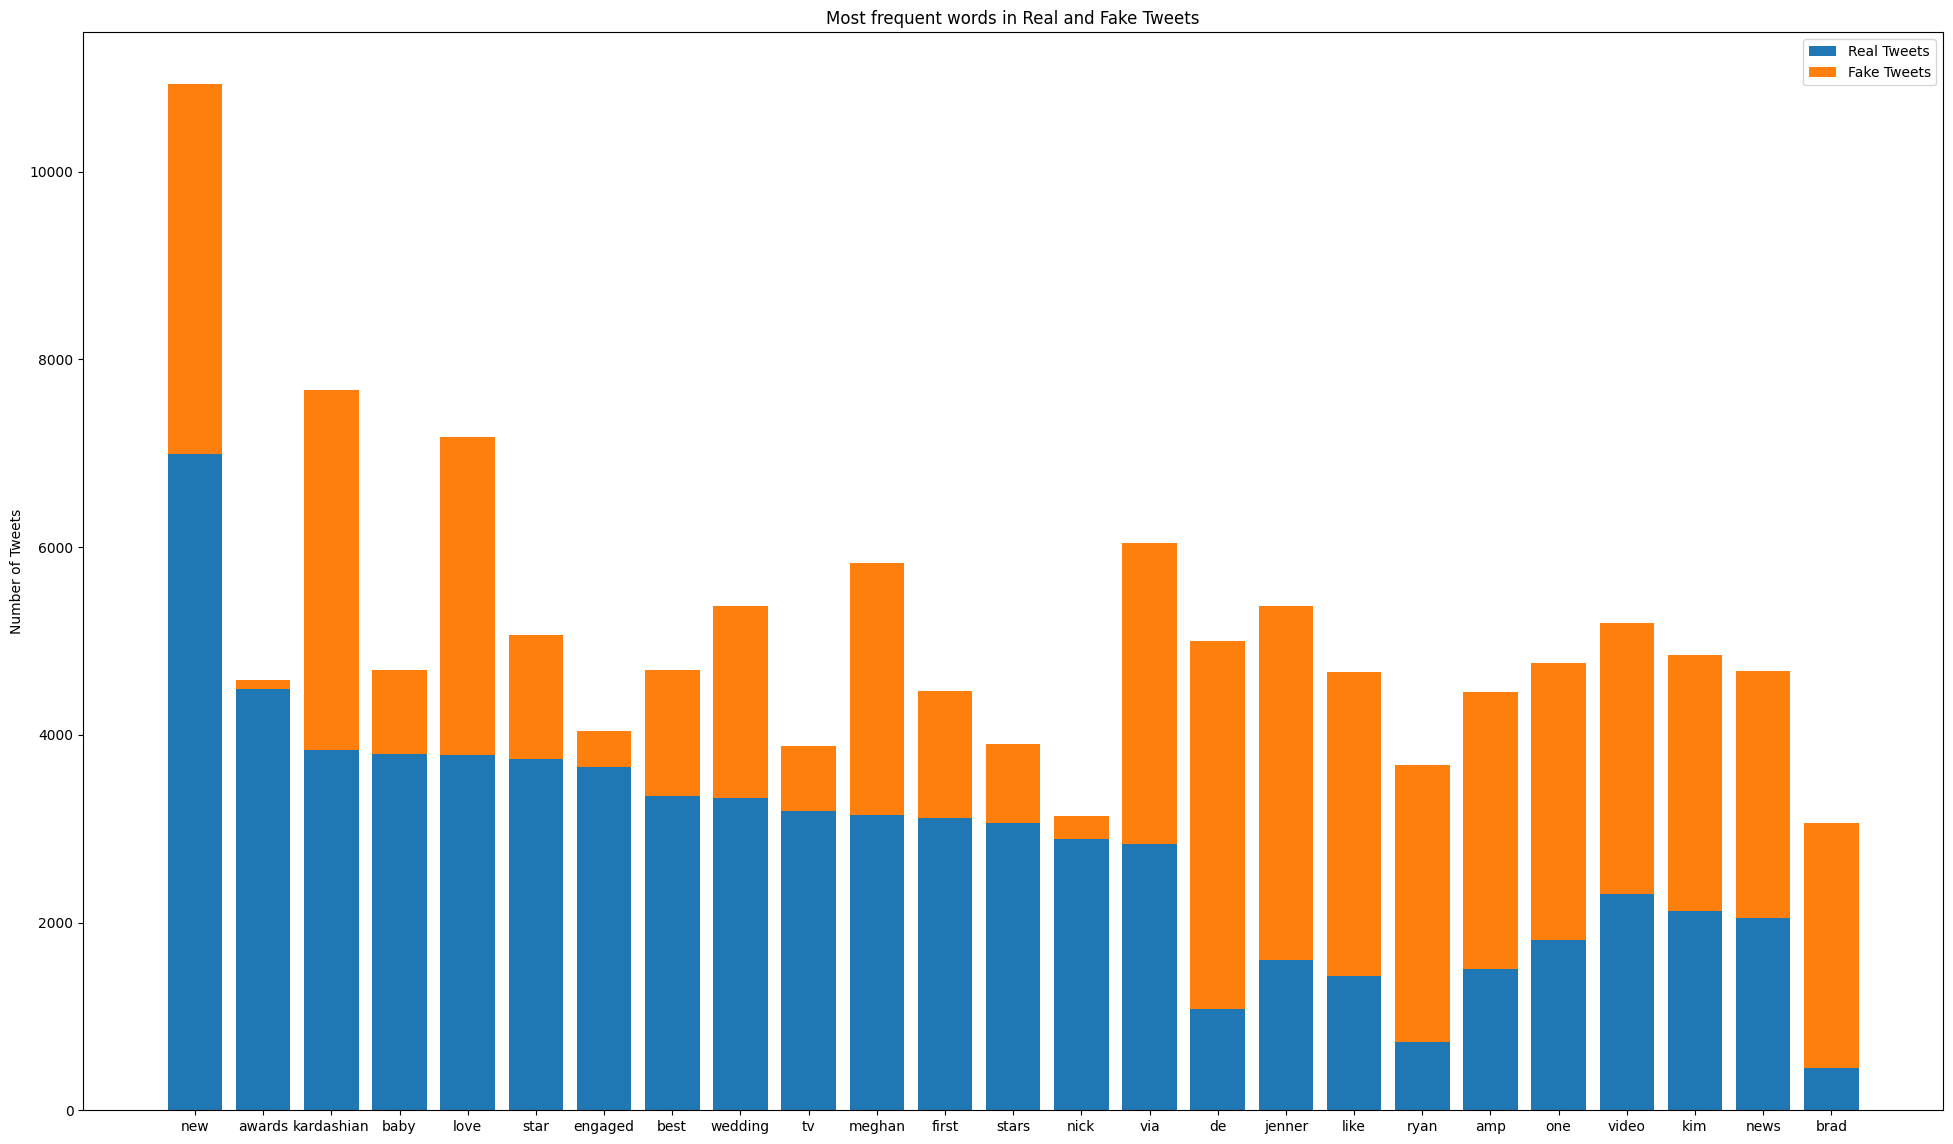

In [ ]:
keys = result_dict.keys()
vals1 = [item[0] for item in result_dict.values()]
vals2 = [item[1] for item in result_dict.values()]

fig, ax = plt.subplots(figsize=(24, 14))
ax.bar(keys, vals1, label='Real Tweets')
ax.bar(keys, vals2, bottom=vals1, label='Fake Tweets')
ax.set_ylabel('Number of Tweets')
ax.set_title('Most frequent words in Real and Fake Tweets')
ax.legend()
plt.show()

### **Probability graph of most frequent words being in real and fake tweets**

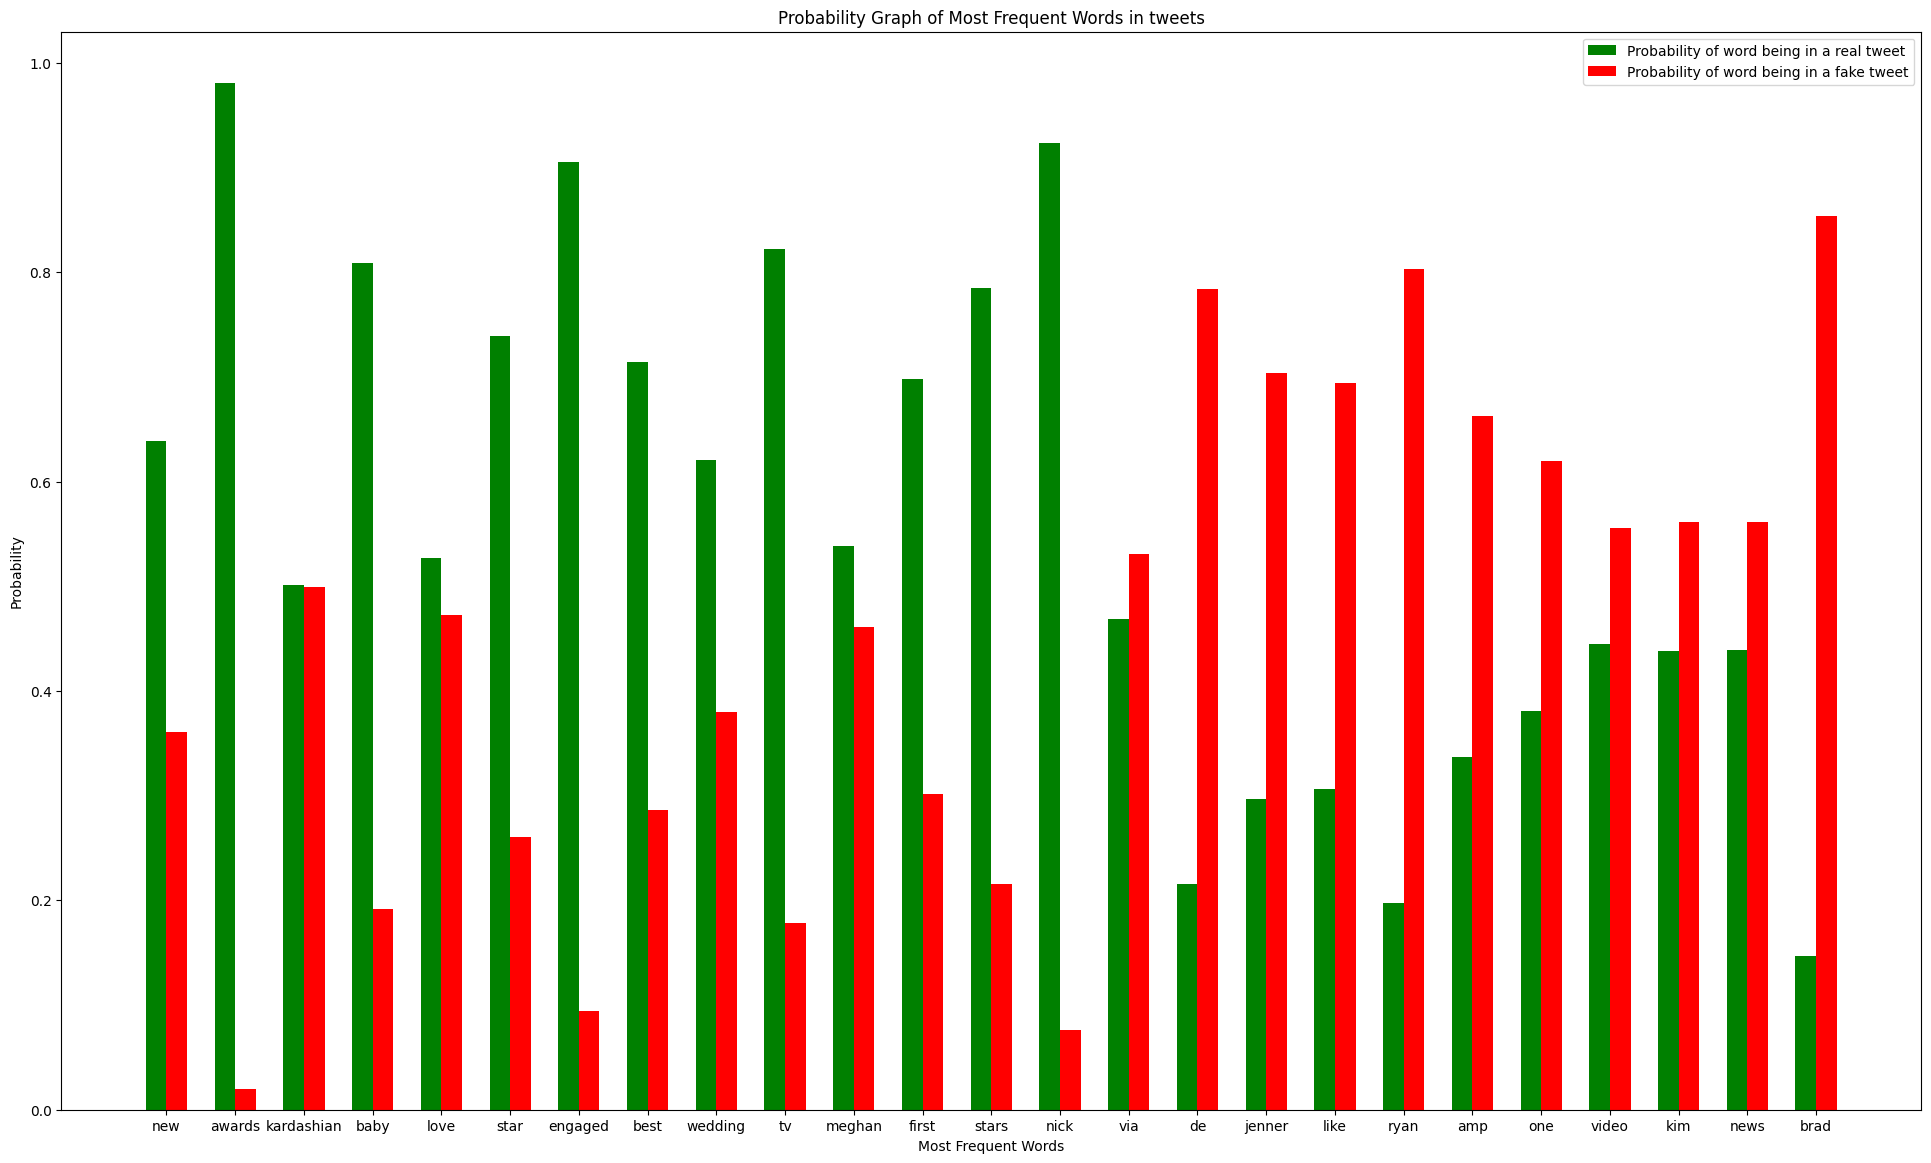

In [ ]:
normalized_dict_val1 = {}
normalized_dict_val2 = {}
for key, values in result_dict.items():
    normalized_val1 = values[0] / sum(values)
    normalized_dict_val1[key] = normalized_val1
    normalized_val2 = values[1] / sum(values)
    normalized_dict_val2[key] = normalized_val2

# Create two sets of bars with normalized values for val1 and val2
keys = list(result_dict.keys())
normalized_values_val1 = [normalized_dict_val1[key] for key in keys]
normalized_values_val2 = [normalized_dict_val2[key] for key in keys]
x_pos = np.arange(len(keys))
bar_width = 0.3

fig, ax = plt.subplots(figsize=(24, 14))
ax.bar(x_pos, normalized_values_val1, width=bar_width, color='g', label='Probability of word being in a real tweet')
ax.bar(x_pos + bar_width, normalized_values_val2, width=bar_width, color='r', label='Probability of word being in a fake tweet')
ax.set_xticks(x_pos + bar_width/2)
ax.set_xticklabels(keys)
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Most Frequent Words')
ax.set_ylabel('Probability')
ax.set_title('Probability Graph of Most Frequent Words in tweets')

# Show the plot
plt.show()

### **Number of verified vs non verified accounts given label**

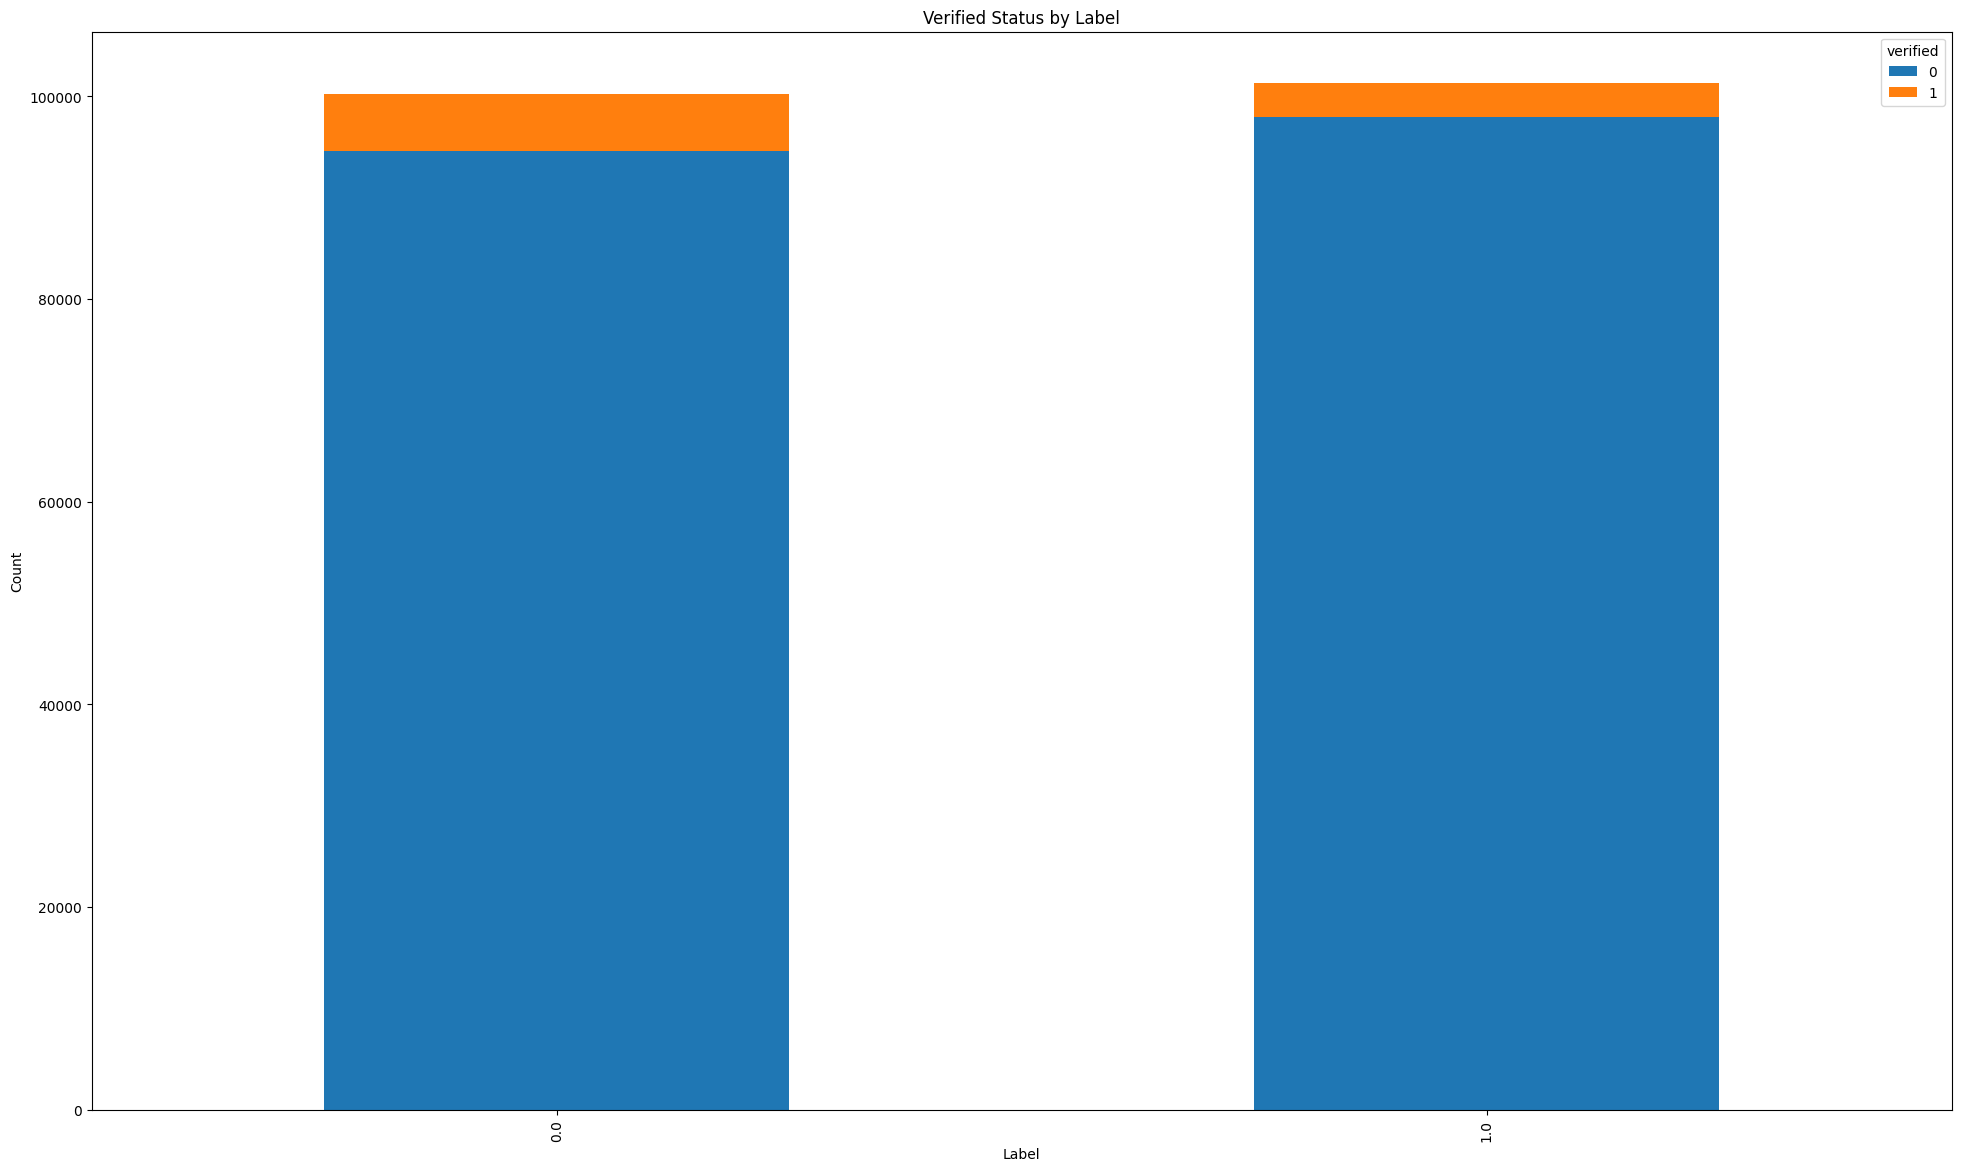

In [ ]:
grouped = merged_df.groupby(["label", "verified"]).count()["user_id"]
grouped_df = grouped.unstack(level=1).reset_index()

ax = grouped_df.plot(kind='bar', x='label', stacked=True,figsize=(24, 14))

# set axis labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Verified Status by Label')

# show the plot
plt.show()

### **Number of real and fake tweets given verified and non verified instances**

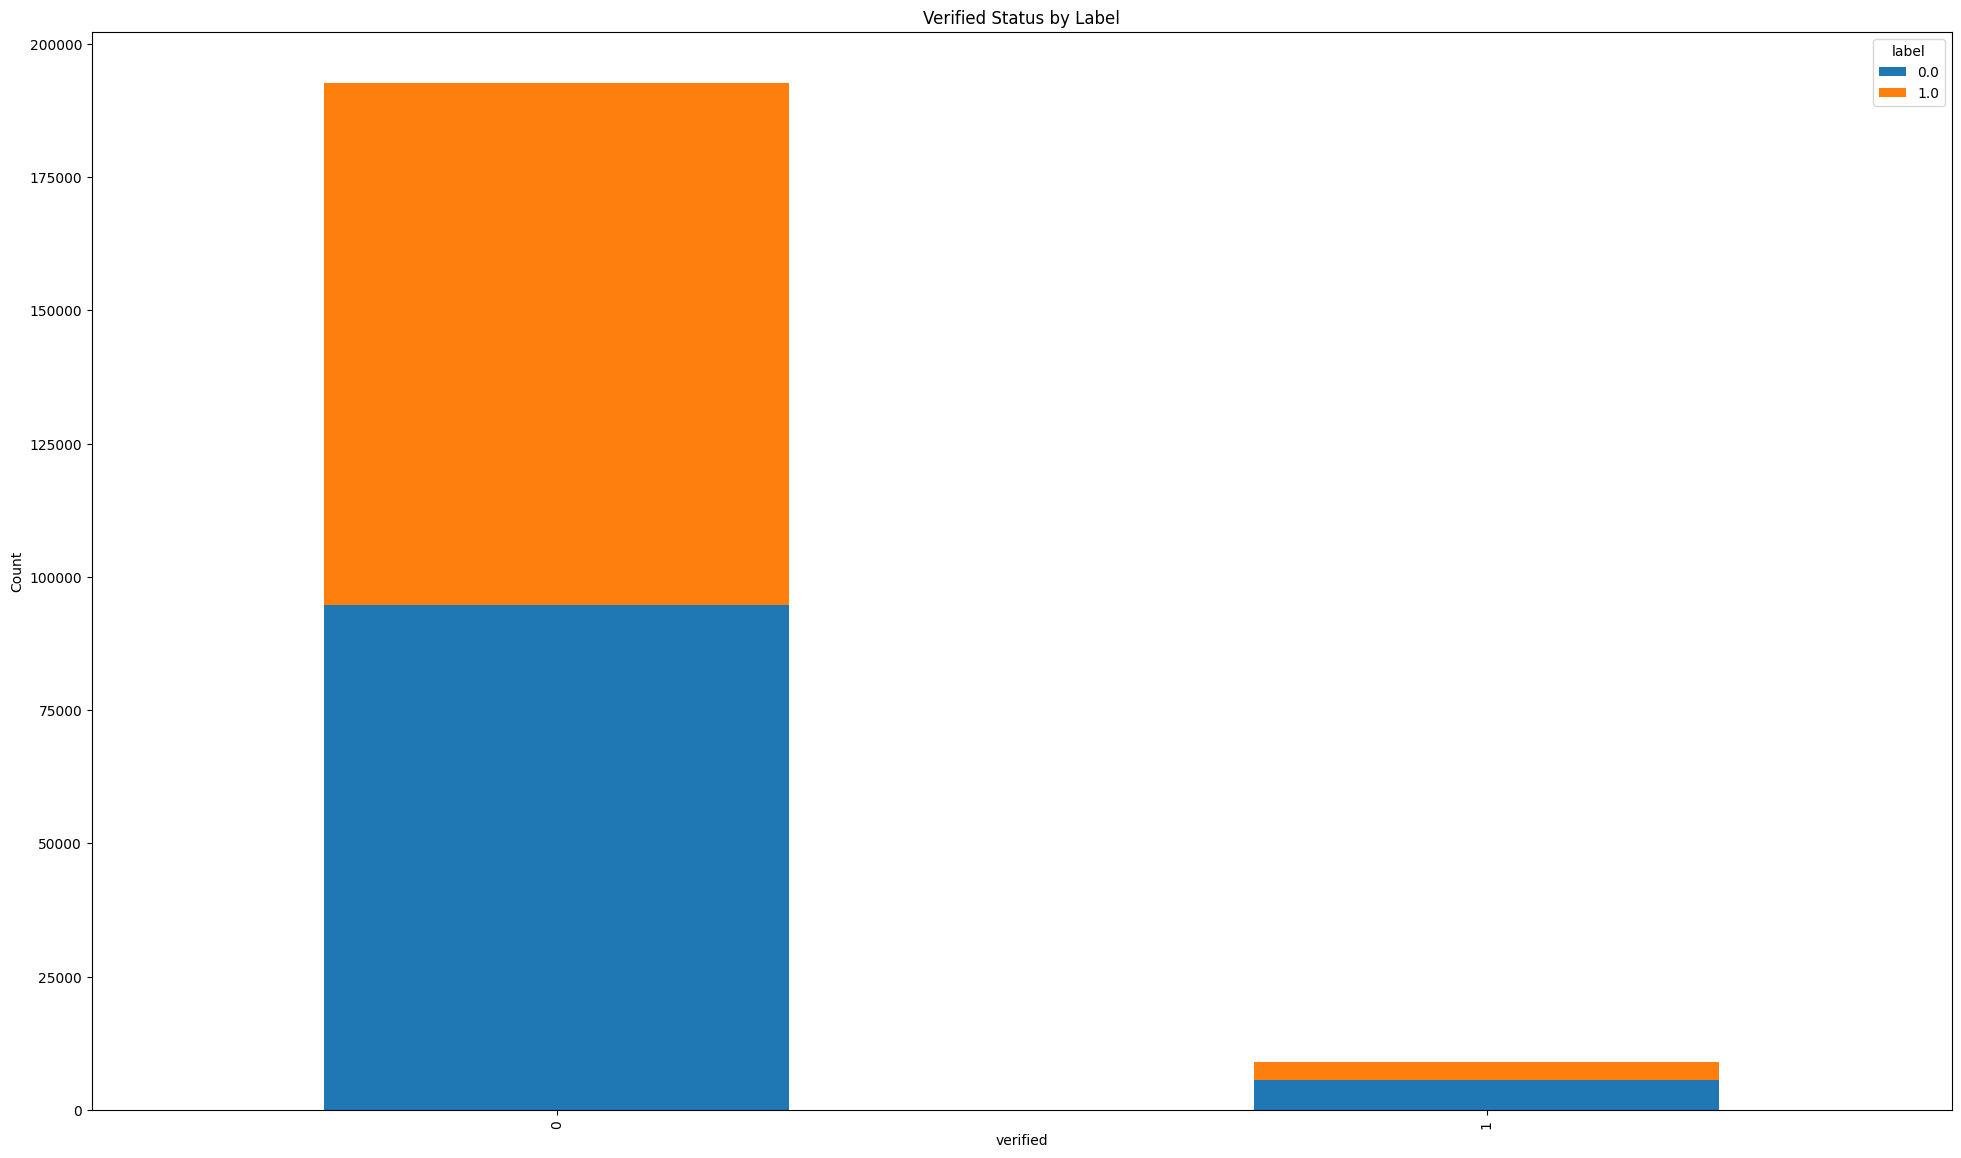

In [ ]:
grouped = merged_df.groupby(["verified", "label"]).count()["user_id"]
grouped_df = grouped.unstack(level=1).reset_index()

# create stacked bar graph
ax = grouped_df.plot(kind='bar', x='verified', stacked=True,figsize=(24, 14))

# set axis labels and title
ax.set_xlabel('verified')
ax.set_ylabel('Count')
ax.set_title('Verified Status by Label')

# show the plot
plt.show()

### **Number of Fake vs Real news by Tweet_ID**

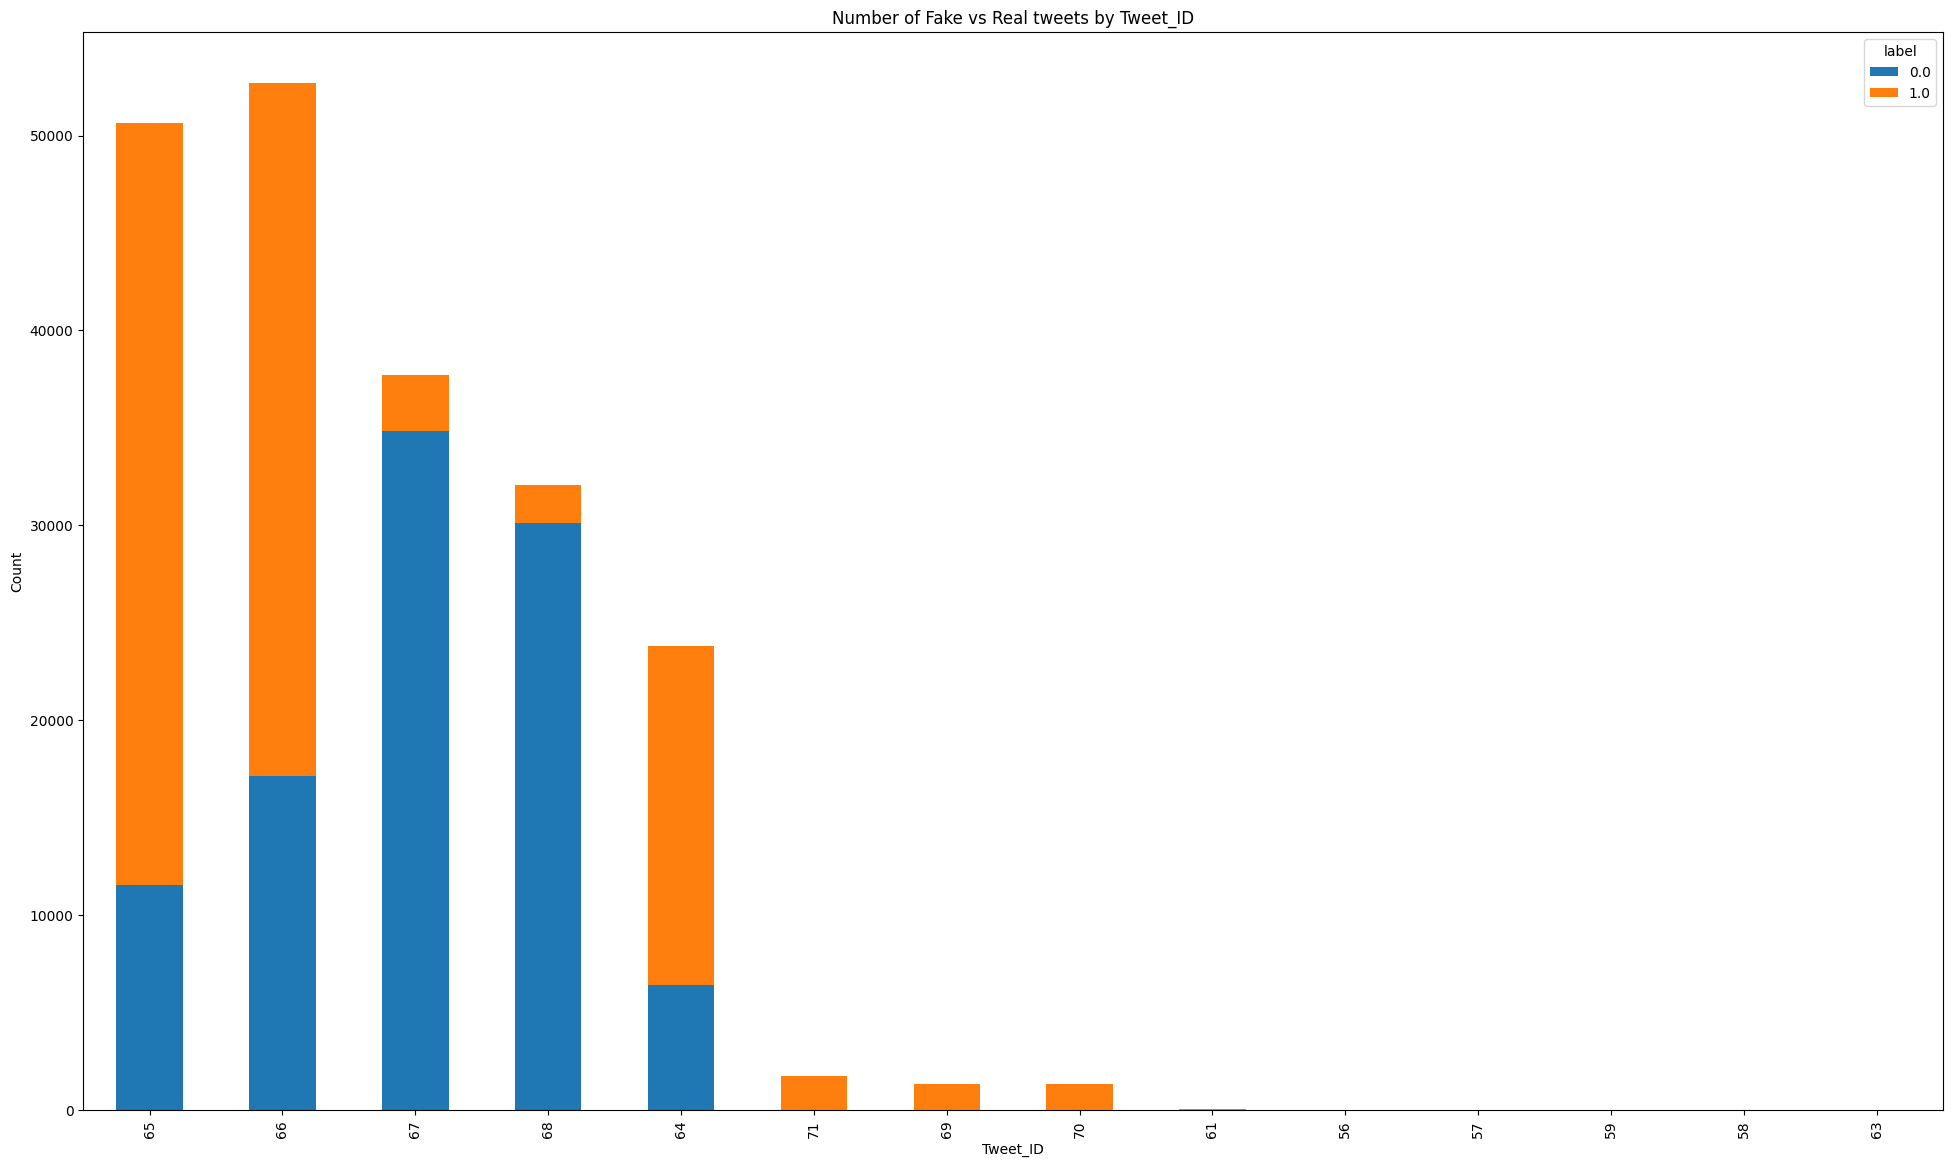

In [10]:
ff= merged_df.groupby(["tweet_id", "label"]).count()["text"].sort_values(ascending =False).head(20)
ff = ff.unstack(level=1).reset_index()

# create stacked bar graph
ax = ff.plot(kind='bar', x='tweet_id', stacked=True,figsize=(24, 14))

# set axis labels and title
ax.set_xlabel('Tweet_ID')
ax.set_ylabel('Count')
ax.set_title('Number of Fake vs Real tweets by Tweet_ID')

# show the plot
plt.show()

### **Followers to Following ratio of users with real tweets**

In [ ]:
tempDf = merged_df.copy(deep=True)
tempDf["TFF"]  = tempDf["followers"] +1  /  tempDf["following"] +1
fakeCountsTempDf = tempDf[tempDf["label"] == 0]
realCountsTempDf = tempDf[tempDf["label"] == 1]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f194cf4fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f194cf66100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f194cf4f8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f194cf66640>],
 'fliers': [],
 'means': []}

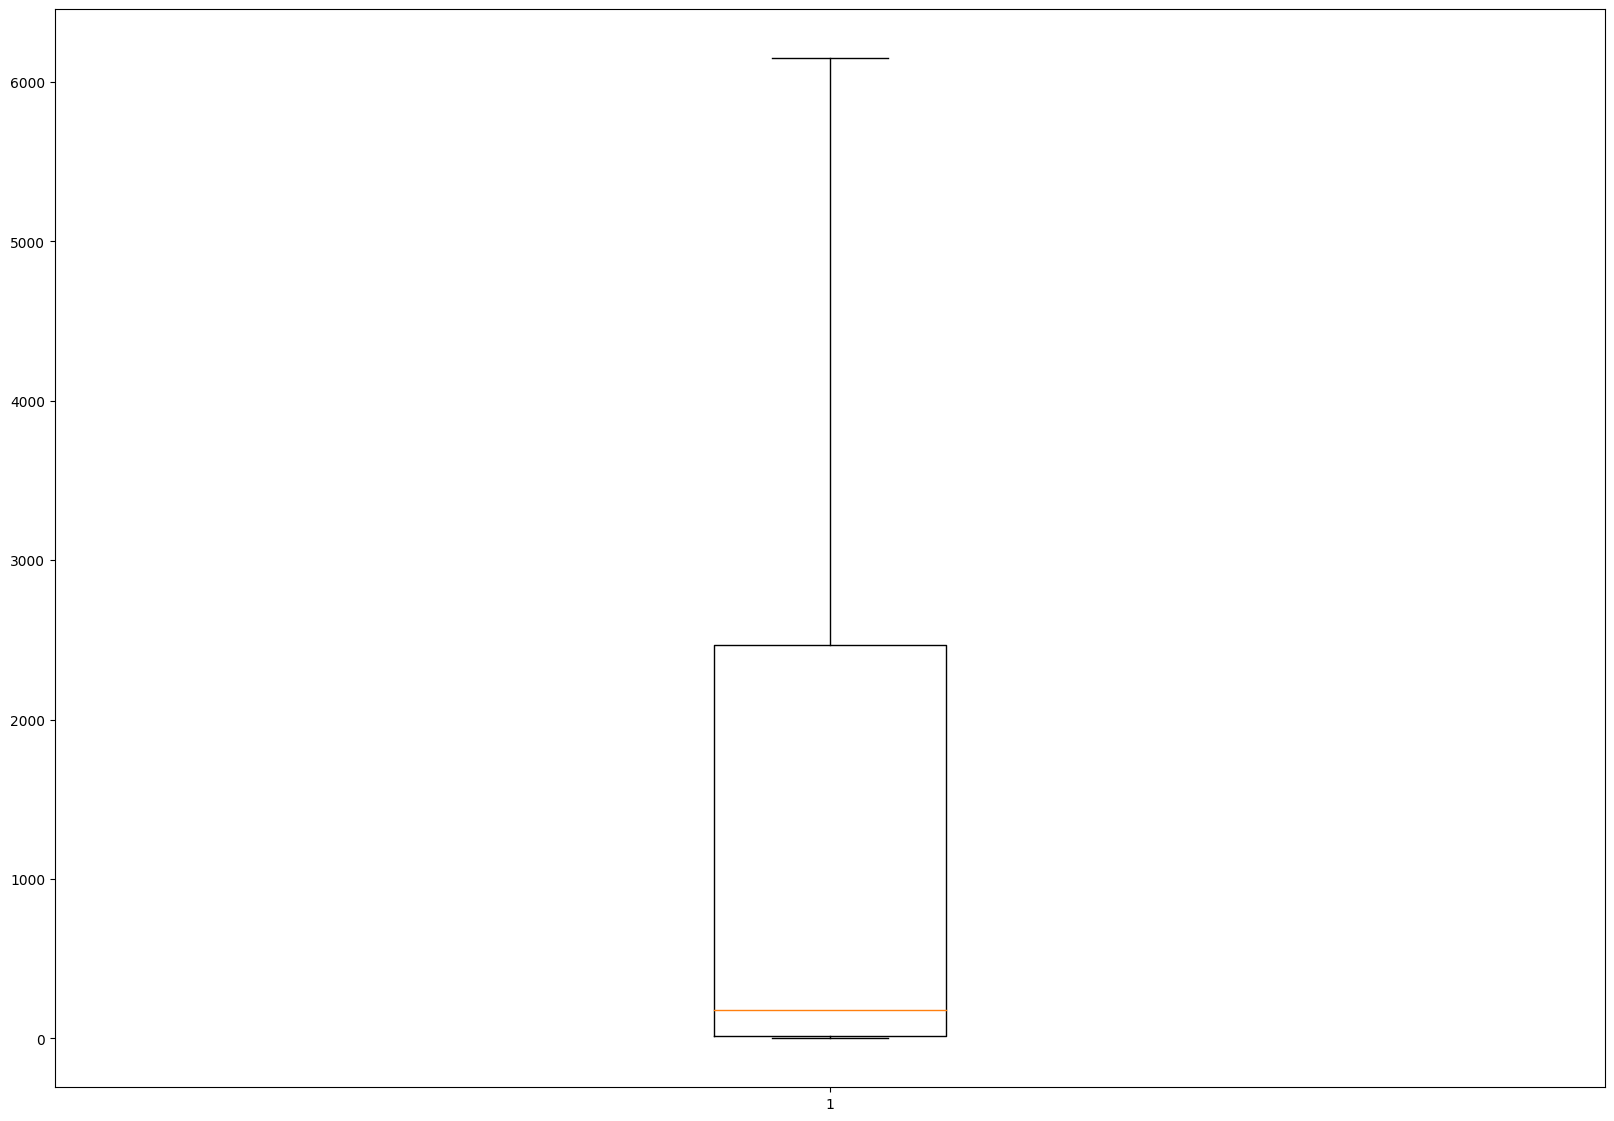

In [ ]:
plt.figure(figsize=(20, 14))
plt.boxplot(realCountsTempDf['TFF'],  showfliers=False)

### **Followers to Following ratio of users with fake tweets**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f194ced3430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f194ced3970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f194ced3190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f194ced3eb0>],
 'fliers': [],
 'means': []}

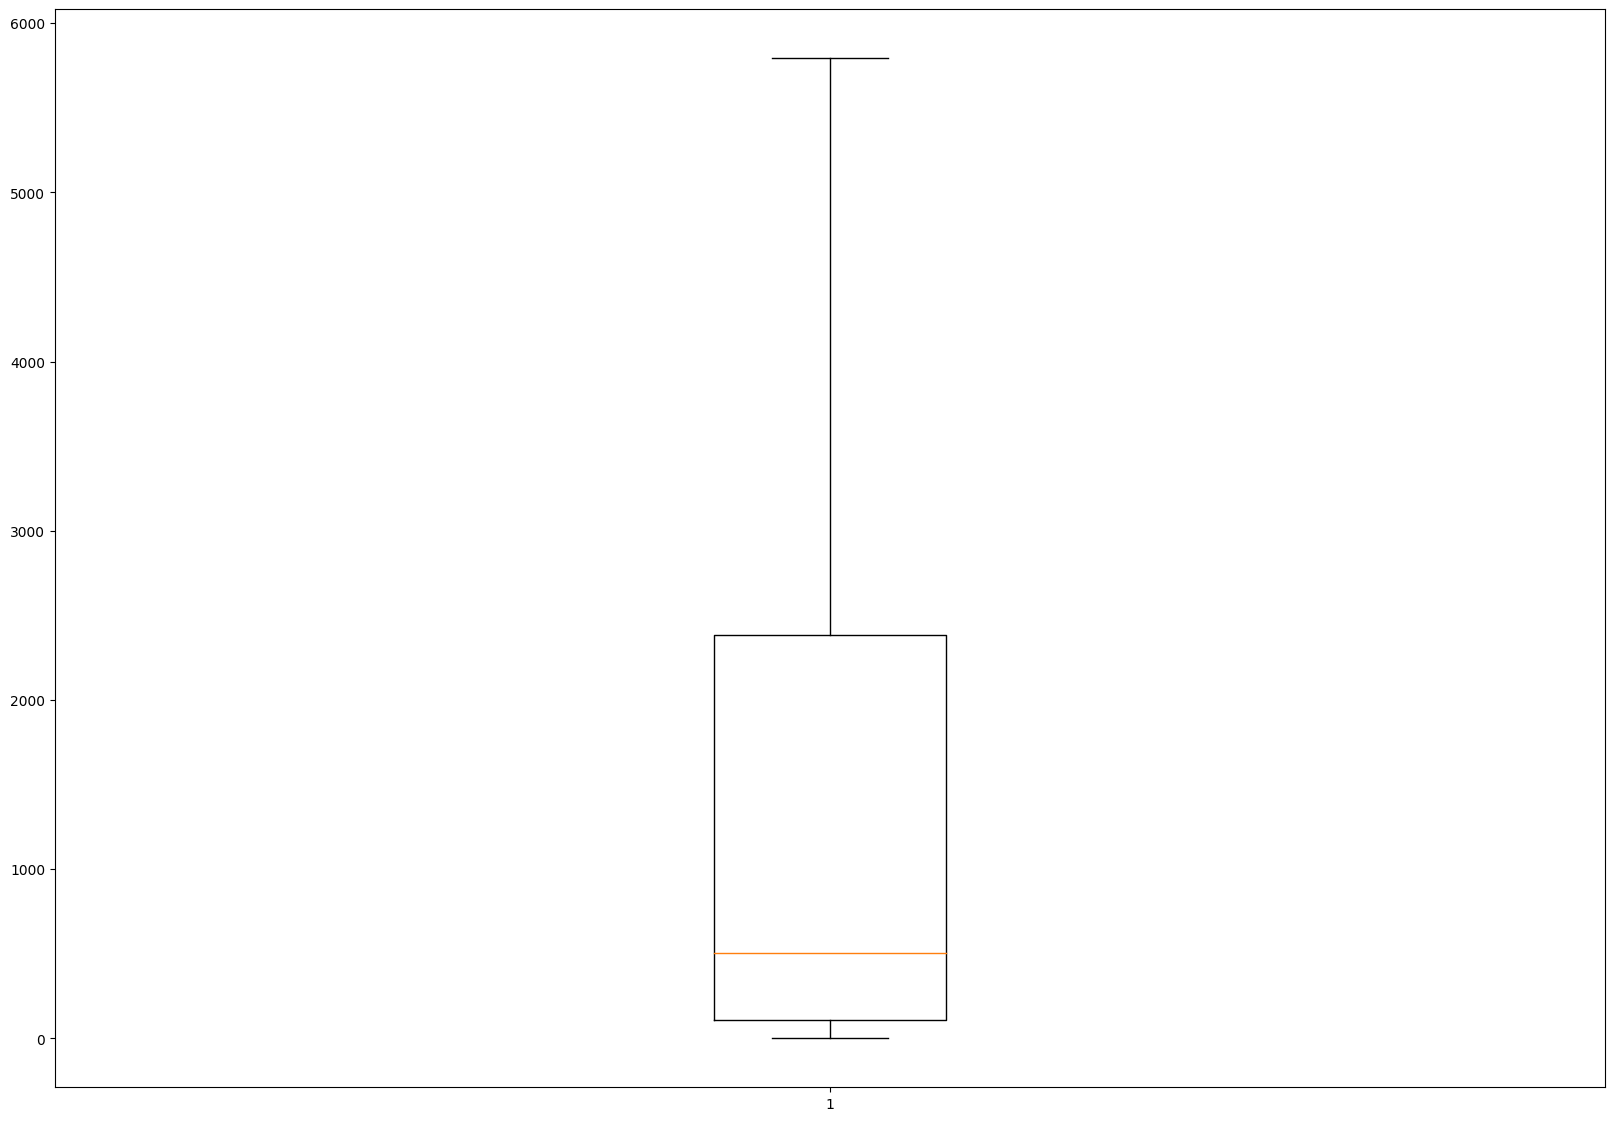

In [ ]:
plt.figure(figsize=(20, 14))
plt.boxplot(fakeCountsTempDf['TFF'],  showfliers=False)

---
---
---
# **====================================================================**
# **=====> Clustering/Classification and Frequent Pattern Mining  <=========**
# **====================================================================**
---
---
---

####You will perform clustering or classification techniques on the provided dataset in this deliverable. Your Report for this deliverable must support your clustering/classification method selection. You are allowed to utilize any python library for these tasks. However, copying code or just renaming the variable names is not permitted. Finally, Find frequent patterns in the dataset for Fake and Real news.

####**Note:** For frequent pattern mining, you are allowed to exclude the text field from the dataset

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###################################################################> Libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
###################################################################> Drive Paths
path_Esha = '/content/drive/MyDrive/Datamining - Project/phase_2_merged_df.csv'

path_Abdullah = '/content/drive/My Drive/Mining Project/Deliverable_01/phase_2_merged_df.csv'

path_Ahmer = '/content/drive/My Drive/Mining/phase_2_merged_df.csv'

In [ ]:
phase2_df = pd.read_csv(path_Abdullah)
print("Shape = ",phase2_df.shape)
phase2_df.head(5)

Shape =  (201531, 12)


,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,not_available,0.0,62467.0,0.0,0.0,0.0,1.0
1,57723.0,64,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0.0,2155.0,0.0,0.0,0.0,1.0
2,47328.0,64,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0.0,308597.0,0.0,1.0,0.0,1.0
3,47328.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0.0,307765.0,0.0,1.0,0.0,1.0
4,47328.0,64,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0.0,308597.0,0.0,1.0,0.0,1.0


In [ ]:
nan_counts = phase2_df.isna().sum()
print("===> Number of NaN values in each columns\n")
print(nan_counts)

===> Number of NaN values in each columns

user_id                         11
tweet_id                         0
text                             0
followers                        0
following                        0
location                         0
verified                        11
statuses_count                  22
profile_background_tile         22
profile_use_background_image    22
favorite_count                  22
label                           22
dtype: int64


In [ ]:
phase2_df = phase2_df.dropna()

---
---
---
#**====================================================================**
#**========> Scikit Implementation of Naive Bayes (for text classification) <=========**
#**====================================================================**
---
---
---

###**===> Text Pre-processing Function**

In [ ]:
################################# Pre processing of tweets
def pre_pro_new(text_list):
  tweets_text_list = text_list
  stop = ['i', 'i\'m', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re', 'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'don\'t', 'should', 'should\'ve', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

  #======================================================================================================> Pre-processing
  for indx in range(len(tweets_text_list)): 
    #=======================================================> convert strings to lowercase
    tweets_text_list[indx] = tweets_text_list[indx].casefold()
    #=======================================================> remove usernames and hyperlinks
    tweets_text_list[indx] = re.sub(r'@\w+\b', '', tweets_text_list[indx])
    tweets_text_list[indx] = re.sub(r'\bhttp\S*', '', tweets_text_list[indx])
    #=======================================================> removing digits and next line symbols
    tweets_text_list[indx] = re.sub(r'\d+', '', tweets_text_list[indx])
    tweets_text_list[indx] = re.sub(r'\n', '', tweets_text_list[indx])
    #=======================================================> remove punctuation and symbols
    tweets_text_list[indx] = re.sub(r'[^\w\s]', '', tweets_text_list[indx])
    #=======================================================> remove stop words
    wordlist = tweets_text_list[indx].split()
    for word in stop:
      if word in wordlist:
        tweets_text_list[indx] = tweets_text_list[indx].replace(' ' + word, '')
        tweets_text_list[indx] = tweets_text_list[indx].replace(word + ' ', '')
    #=======================================================> removes any leading/trailing spaces
    tweets_text_list[indx] = tweets_text_list[indx].lstrip()
    tweets_text_list[indx] = tweets_text_list[indx].rstrip()

  return tweets_text_list

###**===> Loading True Labels**

In [ ]:
labels = phase2_df['label'].tolist()

###**===> Pre-processing Tweets (data)**

In [ ]:
text_data = phase2_df['text'].tolist()
text_data_processed = pre_pro_new(text_data)

In [ ]:
print("Texts count = ",len(text_data_processed))

Texts count =  201509


###**===> Train-Test-Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_data_processed, labels, test_size=0.3, random_state=42)

In [ ]:
print("X_train len = ",len(X_train))
print("X_test len = ",len(X_test))

X_train len =  141056
X_test len =  60453


In [ ]:
X_train

['justin bieber hailey baldwin wear diamond watches engagement hailey baldwin sporting',
 'saturday savings gigi hadids musthave black jeans\xa0sale',
 'thingbout flip flops dont thinkd ever spend much house without walkn closet',
 'kourtney kardashian wears sheer shirt girls night post breakup younes\xa0bendjim',
 'khloé kardashiandmits thinksbout getting nose job every\xa0day',
 'spoiler returning dynasty season  deep breaths cristal carrington fans nathalie kelley exclusively',
 'lady gaga speaks mental health secrets keep sick people struggle seek help mental',
 'glasgow sonicback popup programme sensorysurprises summer hitting highnotes',
 'night  coolest shots patty jenkins tnt series starring chrpine nights n',
 'kate spade brdonate  million suicide prevention mental health causes kate spade lo',
 'beyoncé knowlescarter',
 'diane von furstenberg says viagra worst thing happen women  years',
 'shawn mendes brings harry potter magic carpool karaoke better hitch ride james corden c

###**===> Train and Testing Data into Vectors of Word Counts**



In [ ]:
vectorizer = CountVectorizer()

#Fit the vectorizer to the training data
vectorizer.fit(X_train)

#Transform the training and testing data into vectors of word counts
matrix_train = vectorizer.transform(X_train)
matrix_test = vectorizer.transform(X_test)

In [ ]:
print("matrix_train shape = ", matrix_train.shape)
print("matrix_test shape = ", matrix_test.shape)

matrix_train shape =  (141056, 90580)
matrix_test shape =  (60453, 90580)


###**===> Training Model**

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(matrix_train, y_train)

MultinomialNB()

###**===> Evaluating the Model**

In [ ]:
y_pred = nb_classifier.predict(matrix_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.9262071361222768
F1 score: 0.9261458113820649
Confusion matrix:
 [[27125  2952]
 [ 1509 28867]]


---
###**===> A sample test point**

In [ ]:
test_point = np.array(['ellen is expert'])
matrix_test_tweet = vectorizer.transform(test_point)
tweet_is = nb_classifier.predict(matrix_test_tweet)
print("Tweet is: ",tweet_is[0])

Tweet is:  1.0


---
---
---
#**====================================================================**
#**==============> Pre-processing for Classification Model Training <=============**
#**====================================================================**
---
---
---

In [ ]:
phase2_df_copy = phase2_df.copy()
phase2_df_copy.head(5)

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,not_available,0.0,62467.0,0.0,0.0,0.0,1.0
1,57723.0,64,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0.0,2155.0,0.0,0.0,0.0,1.0
2,47328.0,64,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0.0,308597.0,0.0,1.0,0.0,1.0
3,47328.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0.0,307765.0,0.0,1.0,0.0,1.0
4,47328.0,64,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0.0,308597.0,0.0,1.0,0.0,1.0


###**===> Converting Location column to Numeric Attribute**

In [ ]:
le = LabelEncoder()
phase2_df_copy['location'] = le.fit_transform(phase2_df_copy['location'])
phase2_df_copy.head(5)

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,23987,0.0,62467.0,0.0,0.0,0.0,1.0
1,57723.0,64,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,13550,0.0,2155.0,0.0,0.0,0.0,1.0
2,47328.0,64,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,8783,0.0,308597.0,0.0,1.0,0.0,1.0
3,47328.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,8783,0.0,307765.0,0.0,1.0,0.0,1.0
4,47328.0,64,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,8783,0.0,308597.0,0.0,1.0,0.0,1.0


###**===> Displaying Number of Uniques Values in Each Column**

In [ ]:
print("===> Number of unique entries in each column of dataframe phase2_df_copy\n")
column_names = phase2_df_copy.columns.tolist()
for name in column_names:
    print("===> Number of unique entries in", f"{name : <35}{len(phase2_df_copy[name].unique())}")

===> Number of unique entries in each column of dataframe phase2_df_copy

===> Number of unique entries in user_id                            57938
===> Number of unique entries in tweet_id                           72
===> Number of unique entries in text                               198704
===> Number of unique entries in followers                          17365
===> Number of unique entries in following                          9113
===> Number of unique entries in location                           26494
===> Number of unique entries in verified                           2
===> Number of unique entries in statuses_count                     51444
===> Number of unique entries in profile_background_tile            2
===> Number of unique entries in profile_use_background_image       2
===> Number of unique entries in favorite_count                     711
===> Number of unique entries in label                              2


###**===> Correlation and Correlation Matrix**

In [ ]:
# calculate the correlation between column 'A' and all other columns
correlation = phase2_df_copy.corrwith(phase2_df_copy['label'])
print("===> Correlation of label with all attributes\n")
print(correlation)

===> Correlation of label with all attributes

user_id                         0.199687
tweet_id                       -0.374488
followers                       0.002004
following                      -0.003666
location                       -0.162360
verified                       -0.053753
statuses_count                  0.153306
profile_background_tile        -0.136921
profile_use_background_image    0.118525
favorite_count                 -0.017509
label                           1.000000
dtype: float64


<Axes: >

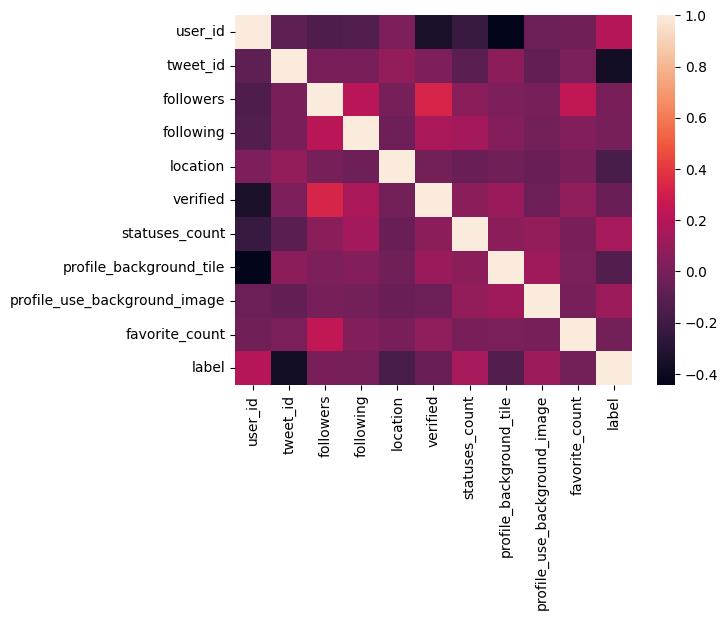

In [ ]:
corr = phase2_df_copy.corr()
sns.heatmap(corr)

##**===> (Set-1) All columns, (Except Text)**

In [ ]:
set_1 = phase2_df_copy.iloc[:, [0,1,3,4,5,6,7,8,9,10]]

###**===> (Set-2) Feature Selection (Filter method): Variance threshold feature selection: This method removes features with low variance, as they are less informative.**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select columns by index using iloc
x_temp = phase2_df_copy.iloc[:, [0,1,3,4,5,6,7,8,9,10]]

# Instantiate the VarianceThreshold class with a threshold of 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit the selector on the dataset
selector.fit(x_temp)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Create a new dataframe with only the selected features
new_data_filter = x_temp.iloc[:, selected_features]
new_data_filter

,user_id,tweet_id,followers,following,location,statuses_count,profile_background_tile,profile_use_background_image,favorite_count
0,57877.0,64,72.0,59.0,23987,62467.0,0.0,0.0,0.0
1,57723.0,64,572.0,2454.0,13550,2155.0,0.0,0.0,0.0
2,47328.0,64,7831.0,2963.0,8783,308597.0,0.0,1.0,0.0
3,47328.0,64,10021.0,2968.0,8783,307765.0,0.0,1.0,0.0
4,47328.0,64,7831.0,2963.0,8783,308597.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
201526,6352.0,68,54.0,312.0,23987,875.0,1.0,1.0,0.0
201527,57865.0,68,3049.0,2484.0,13269,23371.0,0.0,1.0,0.0
201528,39949.0,68,102.0,300.0,18357,672.0,0.0,1.0,0.0
201529,52263.0,68,829.0,836.0,23987,156493.0,0.0,1.0,0.0


###**===> (set-3) Feature selection using Wrapper selection and Decision tree classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

x_data = phase2_df_copy.iloc[:, [0,1,3,4,5,6,7,8,9,10]]
y = phase2_df_copy.iloc[:,-1]

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
# fit the model
rfe.fit(x_data, y)
# transform the data

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

In [ ]:
X_selected = x_data.iloc[:, rfe.support_]
# clf.fit(X_selected, y)

In [ ]:
X_selected.columns

Index(['user_id', 'tweet_id', 'followers', 'following', 'location',
       'statuses_count', 'favorite_count'],
      dtype='object')

In [ ]:
new_data_wrapper = x_data.iloc[:, [0,1,2,3,4,6,9]]
new_data_wrapper

,user_id,tweet_id,followers,following,location,statuses_count,favorite_count
0,57877.0,64,72.0,59.0,23987,62467.0,0.0
1,57723.0,64,572.0,2454.0,13550,2155.0,0.0
2,47328.0,64,7831.0,2963.0,8783,308597.0,0.0
3,47328.0,64,10021.0,2968.0,8783,307765.0,0.0
4,47328.0,64,7831.0,2963.0,8783,308597.0,0.0
...,...,...,...,...,...,...,...
201526,6352.0,68,54.0,312.0,23987,875.0,0.0
201527,57865.0,68,3049.0,2484.0,13269,23371.0,0.0
201528,39949.0,68,102.0,300.0,18357,672.0,0.0
201529,52263.0,68,829.0,836.0,23987,156493.0,0.0


###**===> (Set-4) Feature selection using Wrapper selection and Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE

x_data = phase2_df_copy.iloc[:, [0,1,3,4,5,6,7,8,9,10]]
y = phase2_df_copy.iloc[:,-1]


model = GradientBoostingRegressor(
    n_estimators=5,
    random_state=10,
)

RFE_model = RFE(
    estimator = model, # the ML model
    n_features_to_select=7,
)
RFE_model.fit(x_data, y)

RFE(estimator=GradientBoostingRegressor(n_estimators=5, random_state=10),
    n_features_to_select=7)

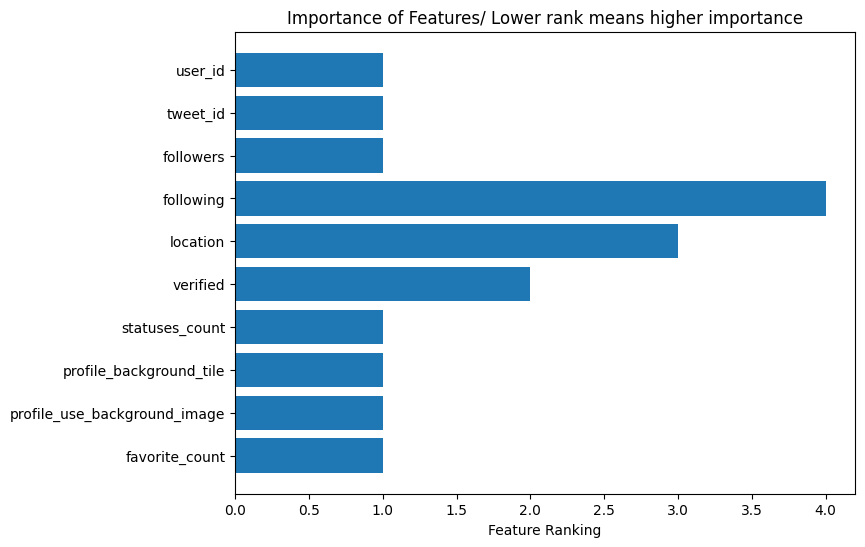

In [ ]:
feature_ranking = RFE_model.ranking_

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8,6))
y_pos = range(len(feature_ranking))
ax.barh(y_pos, feature_ranking, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_data.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Ranking')
ax.set_title('Importance of Features/ Lower rank means higher importance')
plt.show()

In [ ]:
new_data_wrapper2 = x_data.iloc[:, RFE_model.support_]
new_data_wrapper2

,user_id,tweet_id,followers,statuses_count,profile_background_tile,profile_use_background_image,favorite_count
0,57877.0,64,72.0,62467.0,0.0,0.0,0.0
1,57723.0,64,572.0,2155.0,0.0,0.0,0.0
2,47328.0,64,7831.0,308597.0,0.0,1.0,0.0
3,47328.0,64,10021.0,307765.0,0.0,1.0,0.0
4,47328.0,64,7831.0,308597.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
201526,6352.0,68,54.0,875.0,1.0,1.0,0.0
201527,57865.0,68,3049.0,23371.0,0.0,1.0,0.0
201528,39949.0,68,102.0,672.0,0.0,1.0,0.0
201529,52263.0,68,829.0,156493.0,0.0,1.0,0.0


###**===> One-Hot Encoding for text column**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# Sample list of texts
text_data_df = phase2_df_copy['text'].tolist()
text_data_processed_df = pre_pro_new(text_data_df)

# Create a tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(text_data_processed_df)

# Perform one-hot encoding on the texts
one_hot_texts = tokenizer.texts_to_matrix(text_data_processed_df, mode='binary')

In [ ]:
text_df_one_hot = pd.DataFrame(one_hot_texts)
text_df_one_hot

,0,1,2,3,4,5,6,7,8,9,...,118140,118141,118142,118143,118144,118145,118146,118147,118148,118149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201506,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**===> Dimensionality Reduction of One-Hot Encoded text df**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10000)
text_df_one_hot_reduced = pca.fit_transform(text_df_one_hot)

###**===> Extracting Columns for Training and True Labels (using set-3)**

In [ ]:
#0-user_id	1-tweet_id	2-text	3-followers	4-following	5-location	6-verified	7-statuses_count	8-profile_background_tile	9-profile_use_background_image	10-favorite_count	label

In [ ]:
# select columns by index using iloc
# Index(['user_id', 'tweet_id', 'followers', 'following', 'location','statuses_count', 'favorite_count'], dtype='object')
data = phase2_df_copy.iloc[:, [0,1,3,4,5,7,10]]
data

,user_id,tweet_id,followers,following,location,statuses_count,favorite_count
0,57877.0,64,72.0,59.0,23987,62467.0,0.0
1,57723.0,64,572.0,2454.0,13550,2155.0,0.0
2,47328.0,64,7831.0,2963.0,8783,308597.0,0.0
3,47328.0,64,10021.0,2968.0,8783,307765.0,0.0
4,47328.0,64,7831.0,2963.0,8783,308597.0,0.0
...,...,...,...,...,...,...,...
201526,6352.0,68,54.0,312.0,23987,875.0,0.0
201527,57865.0,68,3049.0,2484.0,13269,23371.0,0.0
201528,39949.0,68,102.0,300.0,18357,672.0,0.0
201529,52263.0,68,829.0,836.0,23987,156493.0,0.0


In [ ]:
data_with_text = pd.concat([data, text_df_one_hot])
data_with_text

###**===> Normalize the Data**

In [ ]:
scaler = MinMaxScaler()
## choose which data to fit the scalar on and use in the next steps
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
data

,user_id,tweet_id,followers,following,location,statuses_count,favorite_count
0,0.998844,0.901408,9.346012e-07,0.000049,0.905409,0.006587,0.0
1,0.996186,0.901408,7.424887e-06,0.002029,0.511456,0.000227,0.0
2,0.816789,0.901408,1.016509e-04,0.002450,0.331522,0.032543,0.0
3,0.816789,0.901408,1.300783e-04,0.002454,0.331522,0.032455,0.0
4,0.816789,0.901408,1.016509e-04,0.002450,0.331522,0.032543,0.0
...,...,...,...,...,...,...,...
201504,0.109623,0.957746,7.009509e-07,0.000258,0.905409,0.000092,0.0
201505,0.998637,0.957746,3.957776e-05,0.002054,0.500849,0.002464,0.0
201506,0.689442,0.957746,1.324018e-06,0.000248,0.692900,0.000071,0.0
201507,0.901957,0.957746,1.076089e-05,0.000691,0.905409,0.016503,0.0


In [ ]:
data_labels = phase2_df_copy.iloc[:,-1]
data_labels

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
201526    0.0
201527    0.0
201528    0.0
201529    0.0
201530    0.0
Name: label, Length: 201509, dtype: float64

###**===> Train-Test-Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2, random_state=42)

---
---
---
#**====================================================================**
#**========================> Classification Models <========================**
#**====================================================================**
---
---
---

#**=====> Scikit Implementation of Logistic Regression**

###**===> Training the Logistic Regression Model**

In [ ]:
lr = LogisticRegression() # define the classifier
lr.fit(X_train, y_train)

LogisticRegression()

###**===> Evaluation of Model**

In [ ]:
lr_pred = lr.predict(X_test) # predict the test data

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='macro')
lr_confusion = confusion_matrix(y_test, lr_pred)

In [ ]:
print("Accuracy:", lr_accuracy)
print("F1 score:", lr_f1)
print("Confusion matrix:\n", lr_confusion)

Accuracy: 0.76564438489405
F1 score: 0.7655734614832068
Confusion matrix:
 [[15078  4966]
 [ 4479 15779]]


#**=====> Scikit Implementation of Neural Network**

###**===> Training the NN Model**

In [ ]:
# 5-7 Mins on GPU
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

###**===> Evaluation of Model**

In [ ]:
nn_preds = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_f1 = f1_score(y_test, nn_preds, average='macro')
nn_confusion = confusion_matrix(y_test, nn_preds)

In [ ]:
# This cell is being replicated multiple times for the various combinations tried. 
# combination 1 : all columns except Text retained for analysis 
print("Accuracy:", nn_accuracy)
print("F1 score:", nn_f1)
print("Confusion matrix:\n", nn_confusion)

Accuracy: 0.8135656294972954
F1 score: 0.8135656247839871
Confusion matrix:
 [[15832 4212]
 [ 3308 16950]]


In [ ]:
# This cell is being replicated multiple times for the various combinations tried. 
# combination 2 : feature selection using filter method with threshold 0.1
print("Accuracy:", nn_accuracy)
print("F1 score:", nn_f1)
print("Confusion matrix:\n", nn_confusion)

Accuracy: 0.8045653529495724
F1 score: 0.8045667835221877
Confusion matrix:
 [[18078  1966]
 [ 5933 14325]]


In [ ]:
# This cell is being replicated multiple times for the various combinations tried. 
# combination 3 : feature selection using wrapper method on decision tree classifier 
print("Accuracy:", nn_accuracy)
print("F1 score:", nn_f1)
print("Confusion matrix:\n", nn_confusion)

Accuracy: 0.8237308322167635
F1 score: 0.8233398454355149
Confusion matrix:
 [[15651  4393]
 [ 2711 17547]]


In [ ]:
# This cell is being replicated multiple times for the various combinations tried. 
# combination 4 : feature selection using wrapper method and gradient boosted regression to find features 
print("Accuracy:", nn_accuracy)
print("F1 score:", nn_f1)
print("Confusion matrix:\n", nn_confusion)

Accuracy: 0.8164656345394924
F1 score: 0.8164656353453567
Confusion matrix:
 [[16276  3768]
 [ 3633 16625]]


#**=====> Scikit Implementation of Support Vector Machine**

###**===> Training the SVM Model**

In [ ]:
#17-19 mins on GPU
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

###**===> Evaluation of Model**

In [ ]:
# 3-4 mins on GPU
svm_preds = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds, average='macro')
svm_confusion = confusion_matrix(y_test, svm_preds)

In [ ]:
print("Accuracy:", svm_accuracy)
print("F1 score:", svm_f1)
print("Confusion matrix:\n", svm_confusion)

Accuracy: 0.7694407225447869
F1 score: 0.7692992549785148
Confusion matrix:
 [[16004  4040]
 [ 5252 15006]]


#**=====> Scikit Implementation of Perceptron Classifier**

###**===> Training the Preceptron Model**

In [ ]:
from sklearn.linear_model import Perceptron
ps = Perceptron(random_state=42)
ps.fit(X_train, y_train)

Perceptron(random_state=42)

###**===> Evaluation of Model**

In [ ]:
ps_pred = ps.predict(X_test)
ps_accuracy = accuracy_score(y_test, ps_pred)
ps_f1 = f1_score(y_test, ps_pred, average='macro')
ps_confusion = confusion_matrix(y_test, ps_pred)

In [ ]:
print("Accuracy:", ps_accuracy)
print("F1 score:", ps_f1)
print("Confusion matrix:\n", ps_confusion)

Accuracy: 0.49741948290407423
F1 score: 0.33501080145035006
Confusion matrix:
 [[19982    62]
 [20193    65]]


#**===> Accuracy and F1-Scores of all Classification Models**

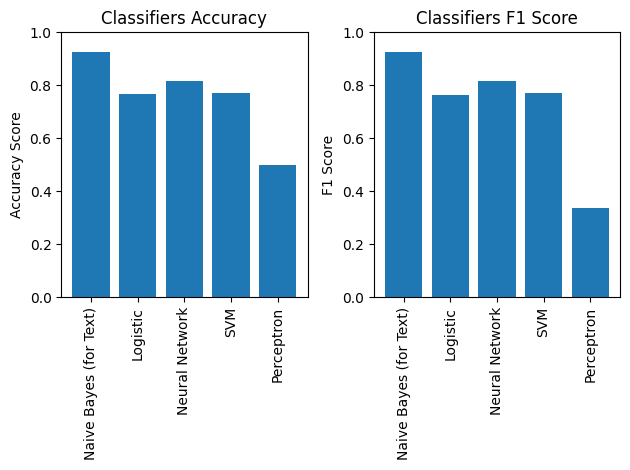

In [ ]:
# =======================================================> Create bar plots to visualize the results
acc_scores = [accuracy, lr_accuracy, nn_accuracy, svm_accuracy, ps_accuracy]
f1_scores = [f1, lr_f1, nn_f1, svm_f1, ps_f1]

plt.subplot(1, 2, 1)
plt.bar(['Naive Bayes (for Text)','Logistic', 'Neural Network', 'SVM', 'Perceptron'], acc_scores)
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Classifiers Accuracy')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(['Naive Bayes (for Text)','Logistic', 'Neural Network', 'SVM', 'Perceptron'], f1_scores)
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('Classifiers F1 Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

---
---
---
#**====================================================================**
#**====================> Frequent Patterns in the Dataset <===================**
#**====================================================================**
---
---
---

In [ ]:
phase2_df_copy2 = phase2_df.copy()
phase2_df_copy2.head(5)

,user_id,tweet_id,text,followers,following,location,verified,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,72.0,59.0,not_available,0.0,62467.0,0.0,0.0,0.0,1.0
1,57723.0,64,New post (17 Royal Rules Meghan Markle Has to ...,572.0,2454.0,Nigeria,0.0,2155.0,0.0,0.0,0.0,1.0
2,47328.0,64,Shailene Woodley Is Aluminum Foil-Chic and Mor...,7831.0,2963.0,INDONESIA,0.0,308597.0,0.0,1.0,0.0,1.0
3,47328.0,64,Ellen DeGeneres Scares BTS With a Little Help ...,10021.0,2968.0,INDONESIA,0.0,307765.0,0.0,1.0,0.0,1.0
4,47328.0,64,They Didn't Mean It Like That: Actors Defendin...,7831.0,2963.0,INDONESIA,0.0,308597.0,0.0,1.0,0.0,1.0


In [ ]:
unique_counts = phase2_df_copy2.nunique()

# Print the unique counts for each column
print(unique_counts)

user_id                          57938
tweet_id                            72
text                            198704
followers                        17365
following                         9113
location                         26494
verified                             2
statuses_count                   51444
profile_background_tile              2
profile_use_background_image         2
favorite_count                     711
label                                2
dtype: int64


In [ ]:
phase2_df_copy2 = phase2_df_copy2.drop('text', axis=1)
phase2_df_copy2 = phase2_df_copy2.drop('location', axis=1)
phase2_df_copy2 = phase2_df_copy2.drop('user_id', axis=1)
phase2_df_copy2 = phase2_df_copy2.drop('statuses_count', axis=1)
phase2_df_copy2 = phase2_df_copy2.drop('followers', axis=1)
phase2_df_copy2 = phase2_df_copy2.drop('following', axis=1)
phase2_df_copy2.head(5)

,tweet_id,verified,profile_background_tile,profile_use_background_image,favorite_count,label
0,64,0.0,0.0,0.0,0.0,1.0
1,64,0.0,0.0,0.0,0.0,1.0
2,64,0.0,0.0,1.0,0.0,1.0
3,64,0.0,0.0,1.0,0.0,1.0
4,64,0.0,0.0,1.0,0.0,1.0


In [ ]:
unique_counts = phase2_df_copy2.nunique()
# Print the unique counts for each column
print(unique_counts)

tweet_id                         72
verified                          2
profile_background_tile           2
profile_use_background_image      2
favorite_count                  711
label                             2
dtype: int64


In [ ]:
for z in phase2_df_copy2.columns:
  print(z)
  phase2_df_copy2[z] = phase2_df_copy2[z].astype(str).apply(lambda x: x + '_'+z)



tweet_id
verified
profile_background_tile
profile_use_background_image
favorite_count
label


In [ ]:
phase2_df_copy2

,tweet_id,verified,profile_background_tile,profile_use_background_image,favorite_count,label
0,64_tweet_id,0.0_verified,0.0_profile_background_tile,0.0_profile_use_background_image,0.0_favorite_count,1.0_label
1,64_tweet_id,0.0_verified,0.0_profile_background_tile,0.0_profile_use_background_image,0.0_favorite_count,1.0_label
2,64_tweet_id,0.0_verified,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,1.0_label
3,64_tweet_id,0.0_verified,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,1.0_label
4,64_tweet_id,0.0_verified,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,1.0_label
...,...,...,...,...,...,...
201526,68_tweet_id,0.0_verified,1.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label
201527,68_tweet_id,0.0_verified,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label
201528,68_tweet_id,0.0_verified,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label
201529,68_tweet_id,0.0_verified,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label


In [ ]:
dataset_array = phase2_df_copy2.values
dataset_array_list = []

for txn in dataset_array:
    txn = np.array([x for x in txn if (isinstance(x, str) or not np.isnan(x))])
    txn = [string.strip() for string in txn]
    dataset_array_list.append(txn)

dataset_array_list = np.array(dataset_array_list)

In [ ]:
dataset_array_list[0]

array(['64_tweet_id', '0.0_verified', '0.0_profile_background_tile',
       '0.0_profile_use_background_image', '0.0_favorite_count',
       '1.0_label'], dtype='<U32')

In [ ]:
# apriori() function evaluates support value for each product
transaction_matrix = TransactionEncoder()
transaction_matrix_array = transaction_matrix.fit(dataset_array_list).transform(dataset_array_list)
transaction_matrix_df = pd.DataFrame(transaction_matrix_array, columns=transaction_matrix.columns_)
transaction_matrix_df

,0.0_favorite_count,0.0_label,0.0_profile_background_tile,0.0_profile_use_background_image,0.0_verified,0_tweet_id,1.0_favorite_count,1.0_label,1.0_profile_background_tile,1.0_profile_use_background_image,...,9708.0_favorite_count,971.0_favorite_count,979.0_favorite_count,98.0_favorite_count,984.0_favorite_count,989.0_favorite_count,99.0_favorite_count,992.0_favorite_count,998.0_favorite_count,9_tweet_id
0,True,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201504,True,True,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
201505,True,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
201506,True,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
201507,True,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets1 = apriori(transaction_matrix_df, min_support=0.3, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.766715,(0.0_favorite_count)
1,0.497194,(0.0_label)
2,0.846022,(0.0_profile_background_tile)
3,0.955813,(0.0_verified)
4,0.502806,(1.0_label)
5,0.829248,(1.0_profile_use_background_image)
6,0.313113,"(0.0_label, 0.0_favorite_count)"
7,0.668342,"(0.0_profile_background_tile, 0.0_favorite_count)"
8,0.758363,"(0.0_verified, 0.0_favorite_count)"
9,0.453603,"(1.0_label, 0.0_favorite_count)"


In [ ]:
frequent_itemsets1 = frequent_itemsets1.sort_values('support', ascending=False)
frequent_itemsets1

,support,itemsets
3,0.955813,(0.0_verified)
2,0.846022,(0.0_profile_background_tile)
5,0.829248,(1.0_profile_use_background_image)
14,0.816822,"(0.0_verified, 0.0_profile_background_tile)"
18,0.795463,"(0.0_verified, 1.0_profile_use_background_image)"
0,0.766715,(0.0_favorite_count)
8,0.758363,"(0.0_verified, 0.0_favorite_count)"
16,0.684381,"(1.0_profile_use_background_image, 0.0_profile..."
7,0.668342,"(0.0_profile_background_tile, 0.0_favorite_count)"
30,0.663896,"(0.0_verified, 1.0_profile_use_background_imag..."


In [ ]:
df_filtered = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: '1.0_label' in x or '0.0_label' in x)]
df_filtered

,support,itemsets
4,0.502806,(1.0_label)
1,0.497194,(0.0_label)
17,0.486112,"(1.0_label, 0.0_verified)"
12,0.469701,"(0.0_verified, 0.0_label)"
9,0.453603,"(1.0_label, 0.0_favorite_count)"
24,0.450541,"(1.0_label, 0.0_verified, 0.0_favorite_count)"
15,0.450094,"(1.0_label, 0.0_profile_background_tile)"
19,0.439251,"(1.0_label, 1.0_profile_use_background_image)"
29,0.437608,"(1.0_label, 0.0_verified, 0.0_profile_backgrou..."
32,0.426854,"(1.0_label, 0.0_verified, 1.0_profile_use_back..."


###**===> Using Apriori on our selected features using Wrapper method**

In [ ]:
phase2_df_copy3 = phase2_df.iloc[:, [0,1,4,7,8,9,10,11]]
phase2_df_copy3.head(5)

,user_id,tweet_id,following,statuses_count,profile_background_tile,profile_use_background_image,favorite_count,label
0,57877.0,64,59.0,62467.0,0.0,0.0,0.0,1.0
1,57723.0,64,2454.0,2155.0,0.0,0.0,0.0,1.0
2,47328.0,64,2963.0,308597.0,0.0,1.0,0.0,1.0
3,47328.0,64,2968.0,307765.0,0.0,1.0,0.0,1.0
4,47328.0,64,2963.0,308597.0,0.0,1.0,0.0,1.0


In [ ]:
unique_counts = phase2_df_copy3.nunique()

# Print the unique counts for each column
print(unique_counts)

user_id                         57938
tweet_id                           72
following                        9113
statuses_count                  51444
profile_background_tile             2
profile_use_background_image        2
favorite_count                    711
label                               2
dtype: int64


In [ ]:
phase2_df_copy3 = phase2_df_copy3.drop('user_id', axis=1)
phase2_df_copy3 = phase2_df_copy3.drop('statuses_count', axis=1)

In [ ]:
for z in phase2_df_copy3.columns:
  #print(z)
  phase2_df_copy3[z] = phase2_df_copy3[z].astype(str).apply(lambda x: x + '_'+z)
phase2_df_copy3

,tweet_id,following,profile_background_tile,profile_use_background_image,favorite_count,label
0,64_tweet_id,59.0_following,0.0_profile_background_tile,0.0_profile_use_background_image,0.0_favorite_count,1.0_label
1,64_tweet_id,2454.0_following,0.0_profile_background_tile,0.0_profile_use_background_image,0.0_favorite_count,1.0_label
2,64_tweet_id,2963.0_following,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,1.0_label
3,64_tweet_id,2968.0_following,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,1.0_label
4,64_tweet_id,2963.0_following,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,1.0_label
...,...,...,...,...,...,...
201526,68_tweet_id,312.0_following,1.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label
201527,68_tweet_id,2484.0_following,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label
201528,68_tweet_id,300.0_following,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label
201529,68_tweet_id,836.0_following,0.0_profile_background_tile,1.0_profile_use_background_image,0.0_favorite_count,0.0_label


In [ ]:
dataset_array = phase2_df_copy3.values
dataset_array_list = []

for txn in dataset_array:
    txn = np.array([x for x in txn if (isinstance(x, str) or not np.isnan(x))])
    txn = [string.strip() for string in txn]
    dataset_array_list.append(txn)

dataset_array_list = np.array(dataset_array_list)

In [ ]:
# apriori() function evaluates support value for each product
transaction_matrix = TransactionEncoder()
transaction_matrix_array = transaction_matrix.fit(dataset_array_list).transform(dataset_array_list)
transaction_matrix_df = pd.DataFrame(transaction_matrix_array, columns=transaction_matrix.columns_)


In [ ]:
frequent_itemsets1 = apriori(transaction_matrix_df, min_support=0.3, use_colnames=True)
frequent_itemsets1 = frequent_itemsets1.sort_values('support', ascending=False)
frequent_itemsets1

,support,itemsets
2,0.846022,(0.0_profile_background_tile)
4,0.829248,(1.0_profile_use_background_image)
0,0.766715,(0.0_favorite_count)
12,0.684381,"(1.0_profile_use_background_image, 0.0_profile..."
6,0.668342,"(0.0_profile_background_tile, 0.0_favorite_count)"
8,0.650646,"(1.0_profile_use_background_image, 0.0_favorit..."
15,0.557117,"(1.0_profile_use_background_image, 0.0_profile..."
3,0.502806,(1.0_label)
1,0.497194,(0.0_label)
7,0.453603,"(1.0_label, 0.0_favorite_count)"


In [ ]:
df_filtered = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: '1.0_label' in x or '0.0_label' in x)]
df_filtered

,support,itemsets
3,0.502806,(1.0_label)
1,0.497194,(0.0_label)
7,0.453603,"(1.0_label, 0.0_favorite_count)"
11,0.450094,"(0.0_profile_background_tile, 1.0_label)"
13,0.439251,"(1.0_profile_use_background_image, 1.0_label)"
14,0.411535,"(0.0_profile_background_tile, 1.0_label, 0.0_f..."
16,0.401451,"(1.0_profile_use_background_image, 1.0_label, ..."
9,0.395928,"(0.0_profile_background_tile, 0.0_label)"
10,0.389997,"(1.0_profile_use_background_image, 0.0_label)"
17,0.389898,"(1.0_profile_use_background_image, 0.0_profile..."


###**===> FP Growth for Frequent Pattern Mining**

In [ ]:
# pip install pandas pyfim==6.28

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfim: filename=pyfim-6.28-cp39-cp39-linux_x86_64.whl size=636848 sha256=b85a8e8043bb2a0e974099ce87e68bf6a13c661581b651c64da060e263989957
  Stored in directory: /root/.cache/pip/wheels/20/90/7c/609467c3ca39c26e59422493e7f08b02a6f96f0f48e2f79eac
Successfully built pyfim


In [ ]:
from fim import arules, fpgrowth

df = phase2_df.copy()

for z in df.columns:
  df[z] = df[z].astype(str).apply(lambda x: x + '_'+z)

transactions = df.values.tolist()

In [ ]:
# Set the minimum support threshold and run the FP-growth algorithm
patterns = fpgrowth(transactions, supp=0.3)

# Print the patterns
for pattern, support in patterns:
    print(f"Pattern: {pattern}, Support: {support}")

Streaming output truncated to the last 5000 lines.
Pattern: ('80.0_followers', '0.0_favorite_count', '1.0_profile_use_background_image', '0.0_profile_background_tile'), Support: 697
Pattern: ('80.0_followers', '0.0_favorite_count', '1.0_profile_use_background_image', '0.0_verified'), Support: 705
Pattern: ('80.0_followers', '0.0_favorite_count', '1.0_profile_use_background_image'), Support: 705
Pattern: ('80.0_followers', '0.0_favorite_count', '0.0_verified'), Support: 734
Pattern: ('80.0_followers', '0.0_favorite_count'), Support: 734
Pattern: ('80.0_followers', '1.0_label', '0.0_profile_background_tile', '0.0_verified'), Support: 654
Pattern: ('80.0_followers', '1.0_label', '0.0_profile_background_tile'), Support: 654
Pattern: ('80.0_followers', '1.0_label', '1.0_profile_use_background_image', '0.0_profile_background_tile', '0.0_verified'), Support: 646
Pattern: ('80.0_followers', '1.0_label', '1.0_profile_use_background_image', '0.0_profile_background_tile'), Support: 646
Pattern: (

In [ ]:
for pattern, support in patterns:
    if "1.0_label" in pattern or "0.0_label" in pattern:
        print(f"Pattern: {pattern}, Support: {support}")

Streaming output truncated to the last 5000 lines.
Pattern: ('48410.0_user_id', '1.0_label', '0.0_favorite_count', '14.0_followers', '1.0_profile_use_background_image'), Support: 1020
Pattern: ('48410.0_user_id', '1.0_label', '0.0_favorite_count', '14.0_followers', '0.0_verified'), Support: 1020
Pattern: ('48410.0_user_id', '1.0_label', '0.0_favorite_count', '14.0_followers'), Support: 1020
Pattern: ('48410.0_user_id', '1.0_label', '0.0_favorite_count', '114.0_following', 'Yogyakarta, Indonesia_location', '1.0_profile_background_tile', '1.0_profile_use_background_image', '0.0_verified'), Support: 1020
Pattern: ('48410.0_user_id', '1.0_label', '0.0_favorite_count', '114.0_following', 'Yogyakarta, Indonesia_location', '1.0_profile_background_tile', '1.0_profile_use_background_image'), Support: 1020
Pattern: ('48410.0_user_id', '1.0_label', '0.0_favorite_count', '114.0_following', 'Yogyakarta, Indonesia_location', '1.0_profile_background_tile', '0.0_verified'), Support: 1020
Pattern: ('48

In [ ]:
patterns = fpgrowth(transactions, supp=0.9)

In [ ]:
# frequent Patterns amoung Label 1
for pattern, support in patterns:
    if "1.0_label" in pattern :
        print(f"Pattern: {pattern}, Support: {support}")

Pattern: ('1.0_label', '0.0_verified'), Support: 97956
Pattern: ('1.0_label', '0.0_profile_background_tile', '0.0_verified'), Support: 88182
Pattern: ('1.0_label', '0.0_profile_background_tile'), Support: 90698
Pattern: ('1.0_label', '1.0_profile_use_background_image', '0.0_verified'), Support: 86015
Pattern: ('1.0_label', '1.0_profile_use_background_image', '0.0_profile_background_tile', '0.0_verified'), Support: 76793
Pattern: ('1.0_label', '1.0_profile_use_background_image', '0.0_profile_background_tile'), Support: 78568
Pattern: ('1.0_label', '1.0_profile_use_background_image'), Support: 88513
Pattern: ('1.0_label', '0.0_favorite_count', '0.0_verified'), Support: 90788
Pattern: ('1.0_label', '0.0_favorite_count', '0.0_profile_background_tile', '0.0_verified'), Support: 82476
Pattern: ('1.0_label', '0.0_favorite_count', '0.0_profile_background_tile'), Support: 82928
Pattern: ('1.0_label', '0.0_favorite_count', '1.0_profile_use_background_image', '0.0_verified'), Support: 80463
Patte

In [ ]:
# frequent Patterns amoung Label 0
for pattern, support in patterns:
    if "0.0_label" in pattern :
        print(f"Pattern: {pattern}, Support: {support}")

Pattern: ('0.0_label', '0.0_verified'), Support: 94649
Pattern: ('0.0_label', '0.0_profile_background_tile', '0.0_verified'), Support: 76415
Pattern: ('0.0_label', '0.0_profile_background_tile'), Support: 79783
Pattern: ('0.0_label', '1.0_profile_use_background_image', '0.0_verified'), Support: 74278
Pattern: ('0.0_label', '1.0_profile_use_background_image', '0.0_profile_background_tile', '0.0_verified'), Support: 56988
Pattern: ('0.0_label', '1.0_profile_use_background_image', '0.0_profile_background_tile'), Support: 59341
Pattern: ('0.0_label', '1.0_profile_use_background_image'), Support: 78588
Pattern: ('0.0_label', '0.0_favorite_count', '0.0_verified'), Support: 62029
Pattern: ('0.0_label', '0.0_favorite_count', '0.0_profile_background_tile', '0.0_verified'), Support: 51128
Pattern: ('0.0_label', '0.0_favorite_count', '0.0_profile_background_tile'), Support: 51749
Pattern: ('0.0_label', '0.0_favorite_count', '1.0_profile_use_background_image', '0.0_verified'), Support: 49377
Patte